# Introduction

## Sources, Credits and References

At the begining of this IPYNB itself, I want to credit the people and their work from which this IPYNB is inpired. <br>
Original Paper: https://arxiv.org/pdf/1808.06241.pdf <br>
Code: https://github.com/Ravisutha/CrimePrediction <br>
Authors: Saroj Kumar Dash, Ilya Safro, Ravisutha Sakrepatna Srinivasamurthy <br>

Other references: 
- https://qxf2.com/blog/drawing-weighted-graphs-with-networkx/
- https://networkx.github.io/documentation/networkx-1.9/overview.html


## Business Requirement

It is quite evident that majority of the population lives in urban area today than in any time of the human history. This trend seems to increase in coming years. A study says that nearly <b> 80.7% of total population in USA stays in urban areas. </b> By 2030 nearly 60% of the population in the world will live in or move to cities. With the increase in urban population, it is important to keep an eye on criminal activities. By doing so, governments can enforce intelligent policing systems.

We analyze Chicago city crime data fused using network analytic techniques to predict criminal activity for the next year. We observe that as we add more layers of data which represent different aspects of the society, the quality of prediction is improved. 

We not only predict the total number of crimes for the whole Chicago city, rather we also predict the crime numbers for different communities in Chicago (<b>the city of Chicago is divided into 77 different Communities</b>)

Predicting crime numbers for different communities can help the police department in effective resource allocation of police personnel.

<b> Note: </b> <br>
Why did we use communities to divide Chicago city and predict crime for each community? Chicago city can also be divided in districts and we could've predict crime numbers for each district.

<b>Ans: </b> <br>
We found that among all the datasets that we mentioned in the below section the coordinates or the spatial location of the crime was always available in all the different datasets. Thus we took community or the location of crime reported as a unifying attribute to build the network by connecting all the datasets through there location. This was simply a design choice.

## Objective

Our objective is <b> to predict crime levels for different communities and a given year based on previous years criminal activity </b> and other social aspects. We observe that augmenting the crime data with other social aspects such as education, and economic conditions give few insights for predicting the crime and improve the quality of prediction. Also, social aspects of other similar communities give out critical information for predicting the crime pattern for next year.

A critical component of the method is to fuse various types of social and historical information in a network which helps to find relationships between different communities within the city. The extracted relationships are incorporated in our prediction model.

## Datasets used

- Dataset source: <b> http://data.cityofchicago.org/ </b>
- Crime dataset from Chicago from 2001 to present.
- Police station data: Gives us an information about the location of 25 police stations for 25 districts in Chicago city.
- Police districts boundaries: The areas for which a police station is responsible for. Used to connect communities, crimes and police stations.
- Dataset of all 311 service (non-emergency municipal services) requests. This includes the all-lights service requests, transit ride requests, pot holes requests, sanitation community requests and vacant house information.
- Chicago public school progress information: This data is available from 2011 to 2017. This dataset contains locations and related data of 188 schools in the Chicago area.
- Chicago school average ACT (American College Testing) scores: The average ACT scores were collected for all the 188 schools.

<b> Note: </b>
- The crime data is available from year 2001 till now. However, most of the other data can be traced back to 2011 only, so for the training of our models, we used all available data from 2011 to 2014. The test sets were created using the 2015 data.
- We analyzed and cleaned the crime data in our EDA.ipynb earlier. But most of the other data was available in raw format. It was cleaned and made in usable format by: <b> https://github.com/Ravisutha/CrimePrediction </b>. We've used their cleaned for our purposes

## Method

- We built a network of 77 communities along with other social/economic aspects
- After this, computed the similarity matrix between the communities which was used to extract <b>two most similar communities for each reference community </b>.
- Once we get most similar communities for each reference community, we extract certian features using all the information.
- Once we get features to predict criminal activity for the given year, we use different models to make the prediction.
- When we say we will predict the criminal activity for the given year we mean:
    - <b> For each individual community, we'll predict crime numbers for each month of the given year (like we did in Time-Series analysis IPYNBs) </b>

### Building the network
- We define a multi-layered network N with an underlying edge-weighted undirected graph G = (V,E) in which we fuse different information sources. The set of nodes is defined as a union of several layers 

$$V = C \cup T \cup S \cup P \cup R$$

- These sets are as follows:
    - C is the set of 77 communities
    - T is the set of crime primary types defined by the Police Department (represented by Illinois Uniform Crime Reporting (IUCR). Examples of the primary types include theft, narcotics and robbery
    - S is the set of 188 schools
    - P is the set of 25 police stations
    - R is the set of 8 types of 311 service requests namely sanity, pot holes, lights one, light all out, lights alley, trees, and vacant
    
- Edges are formed as follows:
    - A community c is connected to a crime typet t if that t was registered in c and number of such crimes determines the edge weight.
    - A community c1 is connected to a community c2 if c1 and c2 share border
    - A school s is connected to community c if s is located in c. Edge weights between schools and communities are determined by the schools average ACT scores. The higher the ACT scores, the higher the standard of education.
    - Police stations can belong to more than one community. A police station p is connected to all communities in C that it belongs to according to.
    - The police station node p is connected to crime type t based on where the crime has happened. The pt edge weight equals the number of times crime type t has been reported to police station p
    - Every service type request to 311, r is connected to its community c in which request was registered. The edge weight is the number of requests of type r in c. A big number of requests indicates that community is active in fixing their issues.
    
- Weights of all the edges in G will be normalized and the values will be brought down to lie in between [0,1]. This will help us in visualizing graphs better and help our models avoid numerical problems.
- For our analysis, we will build one network for each month from 2011-2015. <b> In total we'll have 60 networks </b>

Final Network representation: <img src="network.jpeg">

### Node Similarity Measures

- After building the desired network, we'll use different node-node similarity measures to find top N similar communities for each community C.
- We'll use this similar communities information to extract different features for our regression models.
- Similarity measures that we explored are:
    - Jaccard Similarity
    - Adamic/Adar Similarity index
    - SimRank
    - ASCOS Similarity measure
    - Pseudo inverse of the laplacian matrix as similarity matrix
    
### Extracting features

- Given a community C and and it's two most similar commmunities N1 and N2, features are defined as follows:
    - Feature 1:
        - number of police stations linked to C, number of police stations linked to N1, number of police stations linked to N2 as a vector
        - size of this feature = 3
    - Feature 2:
        - number of schools linked to C, number of schools linked to N1, number of schools linked to N2 as a vector
        - size of this feature = 3
    - Feature 3:
        - total service requests recorded in C, total service requests recorded in N1, total service requests recorded in N2 as a vector
        - size of this feature = 3
    - Feature 4:
        - average ACT score recorded in C, average ACT score recorded in N1, average ACT score recorded in N2 as a vector
        - size of this feature = 3
- Total Features = 3 + 3 + 3 + 3 = 12

### Method revisited

- We have data from 2011-2015. We'll use data from 2011-2014 to predict crime numbers for year 2015
- We have a total of 77 communities. We'll predict numbers for each community individually (like we did in Time-Series analysis IPYNBs)
- For the year 2015, we'll predict crime numbers for each month ( January(1) - December(12) )
- Let's say we are predicting January 2015 crime numbers, to predict this we'll use January numbers from previous years: 2011-2014. This means we have <b> 4 data points to use as training data </b> to predict a month's prediction for year 2015
- Each data point is like this: January 2011, January 2012, January 2013, January 2014
- For each "data point", we have a network
- Using appropriate network and the community in question, we can extract our features. The size of this feature set for each data point is 9.
- Summing up, when we are prediciting January 2015 crime numbers for a community C ( C lies b/w 1 and 77 ) the size of our <b> train set will be 4x9 </b>

### Models

We'll explore the following models:
- Linear Regresion
- Support Vector Regression (SVR)
- Random Forest Regressor
- XGBoost Regressor

### Error

We'll use <b>Root Mean Square Error (RMSE)</b> as our error measure to compare models.

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import math
import itertools
import copy
import pickle
import os
from prettytable import PrettyTable

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

from tqdm import tqdm_notebook

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"), protocol=4)

def openfromfile(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

# Building the network

## Helper Functions

In [3]:
#we've arranged our data in hierarchical directories
#given year, month and type of data we want
#this function returns the appropriate path

def return_path(year, month, typeD):
    
    base = 'data/' + str(year) + '/' + str(month) + '/'
    
    if typeD == 'crime':
        return base + 'crime_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'school':
        return base + 'map_average_act_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'pot_holes':
        return base + 'pot_holes_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'sanity':
        return base + 'sanity_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'vehicles':
        return base + 'vehicles_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'lights_one':
        return base + 'lights_one_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'lights_all':
        return base + 'lights_all_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'lights_alley':
        return base + 'lights_alley_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'trees':
        return base + 'trees_' + str(year) + '_' + str(month) + '.csv'
    
    if typeD == 'vacant':
        return base + 'vacant_' + str(year) + '_' + str(month) + '.csv'  

In [4]:
#these two functions helps us normalizing our data

#this function returns the max value, min value, and size of our list of weights
def get_minmax(commDict):
    
    allweights = []
    
    for targets in commDict:
        for target in (commDict[targets]):
            try:
                allweights.append(float(commDict[targets][target]))
            except ValueError:
                #bad value
                allweights.append(0)
                
    size_commDict = len(allweights)
    maxi = max(allweights)
    mini = min(allweights)
    
    return mini,maxi,size_commDict

#normalizes the value for one dict
#one dict represnts the weights of one type of connctions. 
#For example: community-crime connections and there weights will be represened in one dict
def maxMinNormalize(commDict, idelta=0.0):
    
    commDictCopy = copy.deepcopy(commDict)
    imin,imax,isize = get_minmax(commDictCopy)
    
    if(idelta == 0.0):
        idelta = 1/isize
    
    for targets in commDictCopy:
        for target in (commDictCopy[targets]):
            currVal = commDictCopy[targets][target]
            if (imax == imin):
                commDictCopy[targets][target] = idelta
            else:
                commDictCopy[targets][target] = ((currVal - imin)/(imax-imin)) + idelta
    
    return commDictCopy

In [5]:
#we will assign a specific number to each type of node
#and use this function to assign a particular color for each type of node
#helps in visualizing
def colorMap(graph):
    color_map = []
    for n in graph:
        n = int(n)
        if n <= 77:
            color_map.append('green') 
        elif n >= 10000 and n < 20000:
            color_map.append('red')
        elif n >= 20000 and n < 30000:
            color_map.append('orange')
        elif n >= 30000 and n < 40000:
            color_map.append('pink')
        elif n >= 40000:
            color_map.append('brown')
            
    return color_map

In [6]:
#given a connection dictionary
#this functio adds appropriate nodes and edges to an existing graph
def add_nodes(graph, dictC):
    for source in dictC:
        for target in dictC[source]:
            if (target not in graph.nodes and target != None):
                graph.add_node(target)
            
            try:
                graph.add_edge(source, target, weight=float(dictC[source][target]))
            except ValueError:
                print('hi')
                graph.add_edge(source, target, weight=0.0)

## Community - Crime graph

- A community c is connected to a crime typet t if that t was registered in c and number of such crimes determines the edge weight.
- this graph is created from static IUCR codes and crime data per month

In [7]:
#loading all IUCR codes
crimes_codes = pd.read_csv('data/IUCR.csv')
crimes_codes.head()

IUCR  PRIMARY DESCRIPTION     SECONDARY DESCRIPTION INDEX CODE
0  110             HOMICIDE       FIRST DEGREE MURDER          I
1  130             HOMICIDE      SECOND DEGREE MURDER          I
2  141             HOMICIDE  INVOLUNTARY MANSLAUGHTER          N
3  142             HOMICIDE         RECKLESS HOMICIDE          N
4  261  CRIM SEXUAL ASSAULT       AGGRAVATED: HANDGUN          I

In [8]:
crimes_codes['IUCR'].unique()

array(['110', '130', '141', '142', '261', '262', '263', '264', '265',
       '266', '271', '272', '273', '274', '275', '281', '291', '312',
       '313', '031A', '031B', '320', '325', '326', '330', '331', '334',
       '337', '033A', '033B', '340', '041A', '041B', '420', '430', '440',
       '450', '451', '452', '453', '454', '460', '461', '462', '470',
       '475', '479', '480', '481', '482', '483', '484', '485', '486',
       '487', '488', '489', '490', '491', '492', '493', '494', '495',
       '496', '497', '498', '510', '051A', '051B', '520', '530', '545',
       '550', '551', '552', '553', '554', '555', '556', '557', '558',
       '560', '580', '581', '583', '584', '610', '620', '630', '650',
       '810', '820', '850', '860', '865', '870', '880', '890', '895',
       '910', '915', '917', '918', '920', '925', '927', '928', '930',
       '935', '937', '938', '1010', '1020', '1025', '1030', '1035',
       '1050', '1055', '1090', '1110', '1120', '1121', '1122', '1130',
       '1135'

In [9]:
#let's peek into any one crime data
crime_data = pd.read_csv(return_path(2015, 1, 'crime'))
crime_data.head()

Unnamed: 0       ID Case Number                    Date  \
0       74531  9940796    HY129371  01/26/2015 01:41:00 PM   
1       74532  9941897    HY130248  01/26/2015 08:00:00 PM   
2       74533  9943998    HY105781  01/06/2015 06:00:00 AM   
3       74534  9946265    HY134267  01/30/2015 03:40:00 PM   
4       74535  9950581    HY102056  01/02/2015 06:41:00 PM   

                 Block  IUCR                Primary Type  \
0      042XX W 26TH ST  1752  OFFENSE INVOLVING CHILDREN   
1  132XX S INDIANA AVE  0820                       THEFT   
2  033XX W FILLMORE ST  1812                   NARCOTICS   
3   042XX N PAULINA ST  0820                       THEFT   
4   003XX S ALBANY AVE  2024                   NARCOTICS   

                      Description             Location Description  Arrest  \
0   AGG CRIM SEX ABUSE FAM MEMBER                        APARTMENT   False   
1                  $500 AND UNDER   PARKING LOT/GARAGE(NON.RESID.)   False   
2  POSS: CANNABIS MORE THAN 30GMS  POLICE FACILITY/VEH PARKING LOT    True   
3                  $500 AND UNDER                           STREET   False   
4             POSS: HEROIN(WHITE)                        APARTMENT    True   

   ...  Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
0  ...            30.0        20     1148402.0     1886379.0  2015   
1  ...            54.0        06     1179940.0     1817390.0  2015   
2  ...            29.0        18     1154228.0     1895173.0  2015   
3  ...             6.0        06           NaN           NaN  2015   
4  ...            27.0        18     1155764.0     1898339.0  2015   

               Updated On   Latitude  Longitude  \
0  04/15/2016 03:49:27 PM  41.844163 -87.730886   
1  04/15/2016 03:49:27 PM  41.654184 -87.617255   
2  04/15/2016 03:49:27 PM  41.868181 -87.709271   
3  04/15/2016 11:16:05 AM        NaN        NaN   
4  04/15/2016 03:49:27 PM  41.876838 -87.703547   

                        Location                 date  
0  (41.844163333, -87.730886486)  2015-01-26 13:41:00  
1   (41.654184308, -87.61725535)  2015-01-26 20:00:00  
2  (41.868180939, -87.709271389)  2015-01-06 06:00:00  
3                            NaN  2015-01-30 15:40:00  
4   (41.87683799, -87.703547124)  2015-01-02 18:41:00  

[5 rows x 24 columns]

In [10]:
crime_data['IUCR'].unique()

array(['1752', '0820', '1812', '2024', '2014', '1821', '2027', '2017',
       '0281', '1822', '1811', '2091', '2018', '2023', '2022', '2031',
       '5002', '1155', '1153', '0266', '1751', '1562', '4651', '2050',
       '1110', '1753', '0460', '1120', '0810', '1310', '2825', '1345',
       '0486', '1477', '1330', '141C', '0560', '5003', '143A', '3731',
       '1360', '0496', '5111', '0484', '0454', '3710', '4387', '0910',
       '0870', '0430', '0420', '0890', '031A', '1320', '041A', '0320',
       '141A', '0550', '2250', '0530', '0470', '0497', '0610', '1210',
       '051A', '1340', '0312', '0860', '1150', '2093', '0620', '2170',
       '2820', '0330', '1460', '502R', '0483', '1335', '0915', '0930',
       '1170', '2026', '0850', '2092', '2826', '1220', '1350', '502P',
       '4625', '4388', '0880', '0554', '1121', '0325', '0520', '1305',
       '1130', '1710', '1582', '2028', '0545', '0495', '1506', '1570',
       '1156', '0917', '1152', '0552', '0340', '1365', '0265', '1780',
      

We notice that some crime codes have '0' appended in front of them. <br>
For example:
- There is a '110' IUCR in crime_codes csv but a '0110' IUCR in crime's data CSV

We'll ignore this leading '0' from either IUCR's while comparing

In [7]:
def crime_code_map():
    
    #we are converting each crime code to a number with offset 10,000
    #it will be later used to display the graph effectively
    crimes_codes = pd.read_csv('data/IUCR.csv')
    IUCRs = list(crimes_codes['IUCR'].unique())
    crime_codes = {}
    offset = 10000
    for idx,iucr in enumerate(IUCRs):
        if (iucr[0] == '0'):
            iucr = iucr[1:]
        crime_codes[iucr] = offset + idx
    
    return crime_codes

In [8]:
def map_prim_type_to_iucrs():
    
    crimes_codes = pd.read_csv('data/IUCR.csv')
    IUCRs = list(crimes_codes['IUCR'].unique())
    prime_types = list(crimes_codes['PRIMARY DESCRIPTION'].unique())
    crime_code_dict = crime_code_map()
    
    map_crime_iucr = {}
    
    for idx, row in crimes_codes.iterrows():
        
        if row['IUCR'][0] == '0':
            tmp = row['IUCR'][1:]
        else:
            tmp = row['IUCR']
        
        if row['PRIMARY DESCRIPTION'] not in map_crime_iucr:
            map_crime_iucr[row['PRIMARY DESCRIPTION']] = []
            
        map_crime_iucr[row['PRIMARY DESCRIPTION']].append(crime_code_dict[tmp])
    
    return map_crime_iucr

In [9]:
#this function will return community-crime dictionary
def community_crime_dict(year, month):
    
    crime_codes = crime_code_map()
        
    community_crime = {}
    for i in range (1, 78):
        community_crime[i] = {}

    crime_data = pd.read_csv(return_path(year, month, 'crime'))
    df = crime_data[['Community Area', 'IUCR', 'Date']].groupby(['Community Area', 'IUCR']).count()
    
    for idx,row in df.iterrows():
    
        comm = row.name[0]
        iucr = row.name[1]
        count = row['Date']

        #ignoring leading 0
        if (iucr[0] == '0'):
            iucr = iucr[1:]

        if iucr in crime_codes:
            iucr_offset = crime_codes[iucr]

        #some garbage IUCR
        else:
            continue

        # Some garbage community
        if (not(comm in community_crime)):
            continue

        # Create new crime type if not present (Dictionary of dictionary)
        if (not(iucr_offset in community_crime[comm])):
            community_crime[comm][iucr_offset] = count
            
    return community_crime

In [14]:
comm_crime_dict = community_crime_dict(2015, 1)

In [15]:
#testing
list(comm_crime_dict[44].items())[:5]

[(10000, 2), (10009, 1), (10015, 1), (10019, 13), (10021, 5)]

what does this dictionary represent?
- for year 2015 and month january (1):
    - for community number 44 (in example)
        - this dictionary contains number of crimes of particular IUCR code as key-value pairs
        
We'll use this dictionary to create the Community-Crime nodes and edges

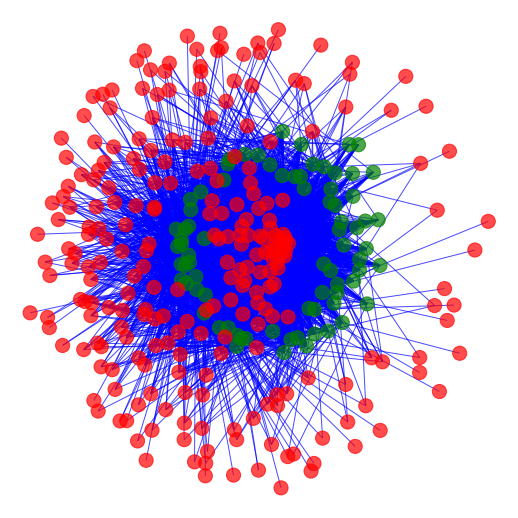

In [16]:
#visualizing
graph = nx.Graph()

#adding one node for each community
for community in range (1, 78):
    graph.add_node(community)

comm_crime_dict = community_crime_dict(2015, 1)

#normalizing our connection dictionary before adding to graph
comm_crime_dict = maxMinNormalize(comm_crime_dict)
add_nodes(graph, comm_crime_dict)

plt.figure(figsize=(7,7))
nx.draw(graph, pos=graphviz_layout(graph), node_color=colorMap(graph), node_size=200, 
        edge_color='blue', alpha=0.7, prog='dot')
plt.show()

## Community - Police graph

- Police stations can belong to more than one community. A police station p is connected to all communities in C that it belongs to according to.
- weight of this connection edge will be 1
- this graph will be created from static police stations data only.

In [17]:
#let's peek into police data
police = pd.read_csv('data/police_community.csv')
police.head()

DISTRICT   DISTRICT NAME                   ADDRESS     CITY STATE    ZIP  \
0        1         Central           1718 S State St  Chicago    IL  60616   
1        2       Wentworth      5101 S Wentworth Ave  Chicago    IL  60609   
2        3  Grand Crossing  7040 S Cottage Grove Ave  Chicago    IL  60637   
3        4   South Chicago           2255 E 103rd St  Chicago    IL  60617   
4        5         Calumet            727 E 111th St  Chicago    IL  60628   

                                             WEBSITE         PHONE  \
0  http://home.chicagopolice.org/community/distri...  312-745-4290   
1  http://home.chicagopolice.org/community/distri...  312-747-8366   
2  http://home.chicagopolice.org/community/distri...  312-747-8201   
3  http://home.chicagopolice.org/community/distri...  312-747-7581   
4  http://home.chicagopolice.org/community/distri...  312-747-8210   

            FAX           TTY  X COORDINATE  Y COORDINATE   LATITUDE  \
0  312-745-3694  312-745-3693   1176569.052   1891771.704  41.858373   
1  312-747-5396  312-747-6656   1175864.837   1871153.753  41.801811   
2  312-747-5479  312-747-9168   1182739.183   1858317.732  41.766431   
3  312-747-5276  312-747-9169   1193131.299   1837090.265  41.707933   
4  312-747-5935  312-747-9170   1183305.427   1831462.313  41.692723   

   LONGITUDE                         LOCATION  \
0 -87.627356   (41.8583725929, -87.627356171)   
1 -87.630560  (41.8018110912, -87.6305601801)   
2 -87.605748  (41.7664308925, -87.6057478606)   
3 -87.568349  (41.7079332906, -87.5683491228)   
4 -87.604506  (41.6927233639, -87.6045058667)   

                          Community  
0                  (33, 35, 32, 28)  
1          (35, 38, 36, 39, 40, 41)  
2                      (42, 43, 69)  
3  (51, 55, 52, 46, 48, 47, 45, 43)  
4                  (50, 49, 53, 54)

In [10]:
#returns community-police connection dict
def community_police_dict():
    
    community_police = {}
    for i in range (1, 78):
        community_police[i] = {}

    #offset used here
    offset = 20000
    
    police = pd.read_csv('data/police_community.csv')
    for idx,row in police.iterrows():
        comms = row['Community']
        comms = comms.replace('(', '')
        comms = comms.replace(')', '')
        comms = comms.replace(' ', '')
        commsList = comms.split(',')

        for comm in commsList:
            if int(comm) in community_police:
                community_police[int(comm)][idx + 1 + offset] = 1
                
    return community_police

In [19]:
#testing
comm_police_dict = community_police_dict()

In [20]:
comm_police_dict[7]

{20017: 1, 20018: 1}

What this dictionary represents?
- for community 7 (in example)
    - which police stations are linked to it

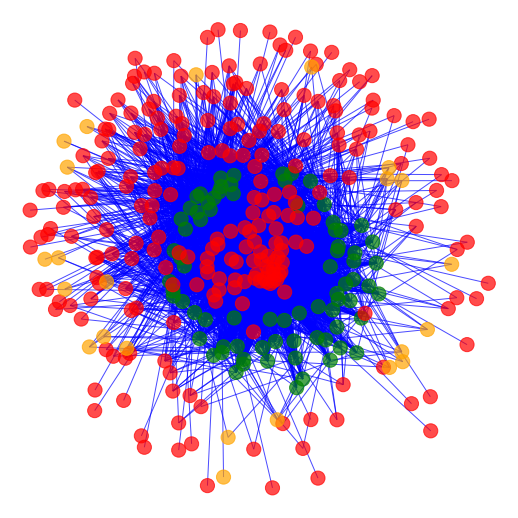

In [21]:
#visualizing
graph = nx.Graph()

#adding one node for each community
for community in range (1, 78):
    graph.add_node(community)

comm_crime_dict = community_crime_dict(2015, 1)

#normalizing our connection dictionary before adding to graph
comm_crime_dict = maxMinNormalize(comm_crime_dict)
add_nodes(graph, comm_crime_dict)

comm_police_dict = community_police_dict()
comm_police_dict = maxMinNormalize(comm_police_dict)
add_nodes(graph, comm_police_dict)

plt.figure(figsize=(7,7))
nx.draw(graph, pos=graphviz_layout(graph), node_color=colorMap(graph), node_size=200, 
        edge_color='blue', alpha=0.7, prog='dot')
plt.show()

## Community - School graph

- A school s is connected to community c if s is located in c. Edge weights between schools and communities are determined by the schools average ACT scores. The higher the ACT scores, the higher the standard of education.
- This graph will be created from month wise school data

In [22]:
#let's peek into any one school data
school_data = pd.read_csv(return_path(2015, 1, 'school'))
school_data.head()

Unnamed: 0   School Name  School ID                       Network Category  \
0           8   ACE TECH HS   400010.0                       Charter  Overall   
1          13  AIR FORCE HS   610513.0  Service Leadership Academies  Overall   
2          18     ALCOTT HS   610524.0                     Network 4  Overall   
3          20       AMANDLA   400012.0                       Charter  Overall   
4          36   AMUNDSEN HS   609695.0                     Network 2  Overall   

  Category Breakdown       Grade    Year  Read  Math  Science  English  \
0            Overall  11th Grade  2015.0  14.4  15.8     15.1     13.6   
1            Overall  11th Grade  2015.0  18.3  17.8     19.2     19.2   
2            Overall  11th Grade  2015.0  16.7  17.6     18.5     16.9   
3            Overall  11th Grade  2015.0  16.8  16.7     16.5     15.3   
4            Overall  11th Grade  2015.0  18.3  17.7     18.1     18.2   

   Composite  Read.1  Math.1  Science.1  English.1  Composite.1  Community  
0       14.7     117     117        117        117          117         40  
1       18.6      86      86         86         86           86         34  
2       17.4      54      54         54         54           54          5  
3       16.3      32      32         32         32           32         68  
4       18.1     246     246        246        246          246          4

In [11]:
def community_school_dict(year, month):
    
    #we are converting each unique school to a number with offset 30,000
    #it will be later used to displlay the graph effectively
    
    school_data = pd.read_csv(return_path(year, month, 'school'))
    school_codes = {}
    offset = 30000
    j = 0
    for idx,ID in enumerate(school_data['School ID'].unique()):
        try:
            school_codes[int(ID)] = offset + j
            j = j + 1
        except:
            continue
        
    community_school = {}
    for i in range (1, 78):
        community_school[i] = {}
    
    for idx,row in school_data.iterrows():
    
        comm = row['Community']
        if row['Category'] == 'Overall':
            avg_act = row['Composite']
        else:
            avg_act = 0.0
        school_id = row['School ID']
            
        try:
            avg_act = float(avg_act)
            if math.isnan(avg_act):
                continue
        except ValueError:
            #bad value
            continue

        if school_id in school_codes:
            school_id_offset = school_codes[school_id]

        #some garbage school_id
        else:
            continue

        # Some garbage community
        if (not(comm in community_school)):
            continue

        # Create new crime type if not present (Dictionary of dictionary)
        if (not(school_id_offset in community_school[comm])):
            community_school[comm][school_id_offset] = avg_act
            
    return community_school

In [24]:
comm_school_dict = community_school_dict(2015, 1)
comm_school_dict[5]

{30002: 17.4, 30042: 20.7, 30072: 25.1}

What do this dictionary represent?
- For community 5 (in example) and for year 2015, month 1
    - all the schools in this community with there avg ACT scores

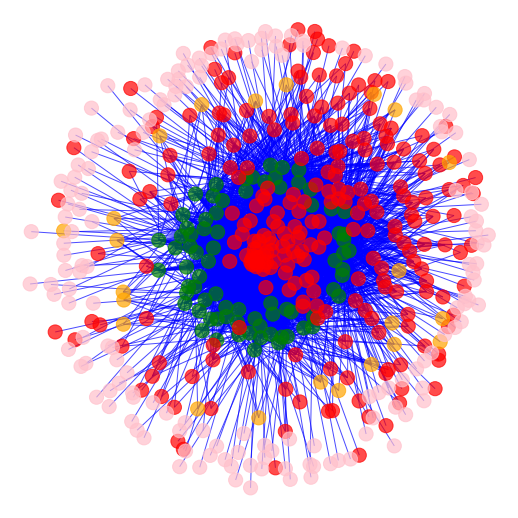

In [25]:
#visualizing
graph = nx.Graph()

#adding one node for each community
for community in range (1, 78):
    graph.add_node(community)

comm_crime_dict = community_crime_dict(2015, 1)

#normalizing our connection dictionary before adding to graph
comm_crime_dict = maxMinNormalize(comm_crime_dict)
add_nodes(graph, comm_crime_dict)

comm_police_dict = community_police_dict()
comm_police_dict = maxMinNormalize(comm_police_dict)
add_nodes(graph, comm_police_dict)

comm_school_dict = community_school_dict(2015, 1)
comm_school_dict = maxMinNormalize(comm_school_dict)
add_nodes(graph, comm_school_dict)

plt.figure(figsize=(7,7))
nx.draw(graph, pos=graphviz_layout(graph), node_color=colorMap(graph), node_size=200, 
        edge_color='blue', alpha=0.7, prog='dot')
plt.show()

## Community - Service Request graph

### Pot holes

In [26]:
#let's peek into pot holes service request data
pot_holes = pd.read_csv(return_path(2015, 1, 'pot_holes'))
pot_holes.head()

Unnamed: 0 CREATION DATE     STATUS COMPLETION DATE SERVICE REQUEST NUMBER  \
0      315158    01/02/2015  Completed      01/02/2015            15-00007436   
1      315159    01/02/2015  Completed      01/02/2015            15-00007445   
2      315160    01/02/2015  Completed      01/02/2015            15-00007450   
3      315161    01/02/2015  Completed      01/02/2015            15-00007497   
4      315162    01/01/2015  Completed      01/02/2015            15-00002779   

  TYPE OF SERVICE REQUEST CURRENT ACTIVITY MOST RECENT ACTION  \
0       Pothole in Street    Final Outcome    Pothole Patched   
1       Pothole in Street    Final Outcome    Pothole Patched   
2       Pothole in Street    Final Outcome    Pothole Patched   
3       Pothole in Street    Final Outcome    Pothole Patched   
4       Pothole in Street    Final Outcome    Pothole Patched   

   NUMBER OF POTHOLES FILLED ON BLOCK           STREET ADDRESS  ...  \
0                                56.0  5600 S CENTRAL PARK AVE  ...   
1                                56.0  5700 S CENTRAL PARK AVE  ...   
2                                57.0  5800 S CENTRAL PARK AVE  ...   
3                                12.0            726 E 51ST ST  ...   
4                                 5.0           3001 W 47TH ST  ...   

   X COORDINATE  Y COORDINATE  Ward  Police District  Community Area   SSA  \
0  1.153271e+06  1.867238e+06  14.0              8.0            62.0   NaN   
1  1.153290e+06  1.866575e+06  14.0              8.0            62.0   NaN   
2  1.153309e+06  1.865914e+06  14.0              8.0            62.0   NaN   
3  1.182057e+06  1.871356e+06   4.0              2.0            38.0  47.0   
4  1.157151e+06  1.873336e+06  14.0              9.0            58.0  39.0   

    LATITUDE  LONGITUDE                                  LOCATION        date  
0  41.791495 -87.713669   (41.79149546639395, -87.71366937020319)  2015-01-02  
1  41.789674 -87.713618    (41.78967426068723, -87.7136179657176)  2015-01-02  
2  41.787861 -87.713567  (41.787860913166725, -87.71356735724865)  2015-01-02  
3  41.802335 -87.607732   (41.80233511022382, -87.60773176728789)  2015-01-02  
4  41.808090 -87.699150   (41.80808974768087, -87.69915012687692)  2015-01-01  

[5 rows x 21 columns]

Each row represents service request raised for a pot hole for period: year 2015, month 1 with community values

In [12]:
def community_pothole_dict(year, month):
    
    offset = 40000
        
    community_potholes = {}
    for i in range (1, 78):
        community_potholes[i] = {}
        
    pot_holes = pd.read_csv(return_path(year, month, 'pot_holes'))
    
    for idx,row in pot_holes.iterrows():
    
        try:
            comm = int(row['Community Area'])
        except:
            #bad community value
            continue

        # Some garbage community
        if (not(comm in community_potholes)):
            continue

        # Create new crime type if not present (Dictionary of dictionary)
        if (not(offset in community_potholes[comm])):
            community_potholes[comm][offset] = 1
        else:
            community_potholes[comm][offset] += 1
            
    return community_potholes

In [28]:
comm_pot_dict = community_pothole_dict(2015, 1)

In [29]:
#testing
comm_pot_dict[7]

{40000: 154}

In year 2015 and month january, 154 pot hole service requests were raised in community 7

### Sanity

In [30]:
#let's peek into sanity service request data
sanity = pd.read_csv(return_path(2015, 1, 'sanity'))
sanity.head()

Unnamed: 0 Creation Date     Status Completion Date Service Request Number  \
0       74104    01/02/2015  Completed      01/02/2015            15-00003524   
1       74105    01/01/2015  Completed      01/02/2015            15-00000507   
2       74106    01/01/2015  Completed      01/02/2015            15-00000805   
3       74107    01/01/2015  Completed      01/02/2015            15-00001251   
4       74108    01/01/2015  Completed      01/02/2015            15-00001295   

     Type of Service Request What is the Nature of this Code Violation?  \
0  Sanitation Code Violation                          Overflowing carts   
1  Sanitation Code Violation                 Dumpster not being emptied   
2  Sanitation Code Violation                 Dumpster not being emptied   
3  Sanitation Code Violation                                      Other   
4  Sanitation Code Violation                            Garbage in yard   

         Street Address  ZIP Code  X Coordinate  Y Coordinate  Ward  \
0   5630 S MICHIGAN AVE   60637.0  1.178117e+06  1.867724e+06  20.0   
1  2553 W FULLERTON AVE   60647.0  1.158831e+06  1.915862e+06   1.0   
2     1301 S WABASH AVE   60605.0  1.176972e+06  1.894461e+06   2.0   
3    1643 N ROCKWELL ST   60647.0  1.158780e+06  1.910832e+06   1.0   
4         842 N WOOD ST   60622.0  1.164240e+06  1.905833e+06   1.0   

   Police District  Community Area   Latitude  Longitude  \
0              2.0            40.0  41.792348 -87.622405   
1             14.0            22.0  41.924861 -87.691804   
2              1.0            33.0  41.865744 -87.625796   
3             14.0            24.0  41.911059 -87.692129   
4             12.0            24.0  41.897227 -87.672213   

                                   Location        date  
0   (41.79234815080979, -87.62240539139559)  2015-01-02  
1  (41.924861108397536, -87.69180443154569)  2015-01-01  
2  (41.865743839784415, -87.62579648605174)  2015-01-01  
3   (41.91105945061893, -87.69212879419509)  2015-01-01  
4  (41.897227425227456, -87.67221305738073)  2015-01-01

Each row represents service request raised for sanity for period: year 2015, month 1 with community values

In [13]:
def community_sanity_dict(year, month):
    
    offset = 50000
        
    community_sanity = {}
    for i in range (1, 78):
        community_sanity[i] = {}
        
    sanity = pd.read_csv(return_path(year, month, 'sanity'))
    
    for idx,row in sanity.iterrows():
    
        try:
            comm = int(row['Community Area'])
        except:
            #bad community value
            continue

        # Some garbage community
        if (not(comm in community_sanity)):
            continue

        # Create new crime type if not present (Dictionary of dictionary)
        if (not(offset in community_sanity[comm])):
            community_sanity[comm][offset] = 1
        else:
            community_sanity[comm][offset] += 1
            
    return community_sanity

In [32]:
comm_sanity_dict = community_sanity_dict(2015, 1)

#tetsing
comm_sanity_dict[7]

{50000: 21}

In year 2015 and month january, 21 sanity service requests were raised in community 7

### Vehicles

In [33]:
#let's peek into vehicles service request data
vehicles = pd.read_csv(return_path(2015, 1, 'vehicles'))
vehicles.head()

Unnamed: 0 Creation Date           Status Completion Date  \
0       85304    01/21/2015  Completed - Dup      01/21/2015   
1       85513    01/21/2015  Completed - Dup      01/21/2015   
2       85554    01/16/2015  Completed - Dup      01/21/2015   
3       85596    01/21/2015  Completed - Dup      01/27/2015   
4       85787    01/21/2015  Completed - Dup      01/27/2015   

  Service Request Number      Type of Service Request License Plate  \
0            15-00109162  Abandoned Vehicle Complaint       9882 DN   
1            15-00109175  Abandoned Vehicle Complaint        E20367   
2            15-00083362  Abandoned Vehicle Complaint       X302470   
3            15-00108467  Abandoned Vehicle Complaint       S924199   
4            15-00114859  Abandoned Vehicle Complaint       R486319   

  Vehicle Make/Model Vehicle Color Current Activity  ...  X Coordinate  \
0              Honda      Burgundy              NaN  ...  1.130119e+06   
1            Pontiac          Gray              NaN  ...  1.165383e+06   
2            Lincoln         Black              NaN  ...  1.160453e+06   
3              Acura          Gray              NaN  ...  1.160076e+06   
4              Honda          Gray              NaN  ...  1.138389e+06   

   Y Coordinate  Ward  Police District  Community Area   SSA   Latitude  \
0  1.918515e+06  36.0             25.0            18.0   NaN  41.932783   
1  1.944608e+06  40.0             24.0             1.0   NaN  42.003694   
2  1.947713e+06  49.0             24.0             2.0   NaN  42.012336   
3  1.923186e+06  47.0             19.0             5.0  38.0  41.945041   
4  1.936886e+06  45.0             16.0            11.0   NaN  41.983056   

   Longitude                                 Location        date  
0 -87.797916  (41.93278261399084, -87.79791574186889)  2015-01-21  
1 -87.667061  (42.00369383199841, -87.66706085920448)  2015-01-21  
2 -87.684895  (42.01233552412213, -87.68489516379776)  2015-01-16  
3 -87.687139  (41.94504083120392, -87.68713942557865)  2015-01-21  
4 -87.766515  (41.98305638174111, -87.76651515025333)  2015-01-21  

[5 rows x 24 columns]

In [14]:
def community_vehicles_dict(year, month):
    
    offset = 60000
        
    community_vehicles = {}
    for i in range (1, 78):
        community_vehicles[i] = {}
        
    vehicles = pd.read_csv(return_path(year, month, 'vehicles'))
    
    for idx,row in vehicles.iterrows():
    
        try:
            comm = int(row['Community Area'])
        except:
            #bad community value
            continue

        # Some garbage community
        if (not(comm in community_vehicles)):
            continue

        # Create new crime type if not present (Dictionary of dictionary)
        if (not(offset in community_vehicles[comm])):
            community_vehicles[comm][offset] = 1
        else:
            community_vehicles[comm][offset] += 1
            
    return community_vehicles

In [35]:
comm_vehicles_dict = community_vehicles_dict(2015, 1)

#tetsing
comm_vehicles_dict[7]

{60000: 21}

In year 2015 and month january, 21 vehicle related service requests were raised in community 7

Same logic will follow for other types of service requests

### Combining all in one

In [15]:
sr = ["sanity", "vehicles", "pot_holes", "lights_one", "lights_all", "lights_alley", "trees", "vacant"]
offset_codes = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]

def service_request(year, month):
    community_sr = {}
    for i in range (1, 78):
        community_sr[i] = {}
    
    for i in range(len(sr)):
        typeSR = sr[i]
        offset = offset_codes[i]
        
        data = pd.read_csv(return_path(year, month, typeSR))
        
        for idx,row in data.iterrows():
    
            try:
                comm = int(row['Community Area'])
            except:
                #bad community value
                continue

            # Some garbage community
            if (not(comm in community_sr)):
                continue

            # Create new crime type if not present (Dictionary of dictionary)
            if (not(offset in community_sr[comm])):
                community_sr[comm][offset] = 1
            else:
                community_sr[comm][offset] += 1
    
    return community_sr

In [37]:
comm_sr_dict = service_request(2015, 1)

#testing
comm_sr_dict[7]

{40000: 21,
 50000: 21,
 60000: 154,
 70000: 33,
 80000: 11,
 90000: 15,
 100000: 107,
 110000: 2}

All counts of all different kinds of SRs

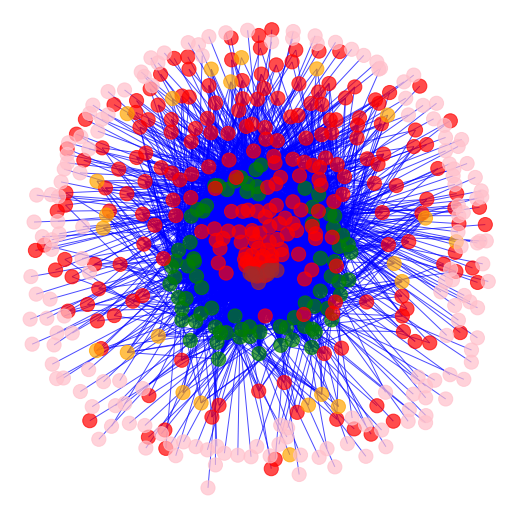

In [38]:
#visualizing
graph = nx.Graph()

#adding one node for each community
for community in range (1, 78):
    graph.add_node(community)

comm_crime_dict = community_crime_dict(2015, 1)

#normalizing our connection dictionary before adding to graph
comm_crime_dict = maxMinNormalize(comm_crime_dict)
add_nodes(graph, comm_crime_dict)

comm_police_dict = community_police_dict()
comm_police_dict = maxMinNormalize(comm_police_dict)
add_nodes(graph, comm_police_dict)

comm_school_dict = community_school_dict(2015, 1)
comm_school_dict = maxMinNormalize(comm_school_dict)
add_nodes(graph, comm_school_dict)

comm_sr_dict = service_request(2015, 1)
comm_sr_dict = maxMinNormalize(comm_sr_dict)
add_nodes(graph, comm_sr_dict)

plt.figure(figsize=(7,7))
nx.draw(graph, pos=graphviz_layout(graph), node_color=colorMap(graph), node_size=200, 
        edge_color='blue', alpha=0.7, prog='dot')
plt.show()

## Police - Crime graph

In [39]:
#loading all IUCR codes
crimes_codes = pd.read_csv('data/IUCR.csv')

IUCRs = list(crimes_codes['IUCR'].unique())
crime_codes_dict = {}
offset = 10000
for idx,iucr in enumerate(IUCRs):
    if (iucr[0] == '0'):
        iucr = iucr[1:]
    crime_codes_dict[iucr] = offset + idx

In [40]:
police = pd.read_csv('data/police_community.csv')
police.shape[0] == len(police['DISTRICT'].unique())

True

Each row in police dataframe corresponds to one police station active in one Chicago city district

In [41]:
police_codes_dict = {}
offset = 20000
for idx,row in police.iterrows():
    police_codes_dict[row['DISTRICT']] = idx + 1 + offset

In [42]:
crime_data = pd.read_csv(return_path(2015, 1, 'crime'))
crime_data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'date'],
      dtype='object')

In [43]:
grouped_crime = crime_data[['District', 'IUCR', 'ID']].groupby(['District', 'IUCR']).count()
grouped_crime

ID
District IUCR    
1.0      0266   1
         0281   2
         0312   2
         0313   5
         031A   6
...            ..
25.0     5002   7
         5011   1
         502P   5
         502R   5
         5110   1

[2330 rows x 1 columns]

In [16]:
#returns police-crime connections dictionary
#for each police station, for each crime gives us the count
def police_crime_dict(year, month):
    
    #police data
    police = pd.read_csv('data/police_community.csv')
    police_codes_dict = {}
    offset = 20000
    for idx,row in police.iterrows():
        police_codes_dict[row['DISTRICT']] = idx + 1 + offset
    
    #crime data
    crime_data = pd.read_csv(return_path(2015, 1, 'crime'))
    
    #IUCRs
    crimes_codes = pd.read_csv('data/IUCR.csv')
    IUCRs = list(crimes_codes['IUCR'].unique())
    crime_codes_dict = {}
    offset = 10000
    for idx,iucr in enumerate(IUCRs):
        if (iucr[0] == '0'):
            iucr = iucr[1:]
        crime_codes_dict[iucr] = offset + idx
    
    
    grouped_crime = crime_data[['District', 'IUCR', 'ID']].groupby(['District', 'IUCR']).count()
    police_crime = {}

    for idx,row in grouped_crime.iterrows():

        district = str(int(row.name[0]))
        iucr = row.name[1]
        if iucr[0] == '0':
            iucr = iucr[1:]

        val = row['ID']

        try:
            policeD_off = police_codes_dict[district]
            iucr_off = crime_codes_dict[iucr]
        except:
            #bad values
            continue

        try:
            police_crime[policeD_off][iucr_off] = val
        except:
            police_crime[policeD_off] = {}
            police_crime[policeD_off][iucr_off] = val
            
    return police_crime

In [45]:
police_crime_d = police_crime_dict(2015, 1)

In [46]:
#testing
police_crime_d[20006]

{10000: 2,
 10008: 1,
 10009: 1,
 10010: 1,
 10015: 7,
 10018: 1,
 10019: 44,
 10020: 1,
 10021: 13,
 10023: 3,
 10024: 5,
 10025: 1,
 10026: 1,
 10027: 1,
 10030: 2,
 10031: 5,
 10033: 7,
 10034: 4,
 10035: 3,
 10038: 1,
 10040: 3,
 10041: 68,
 10044: 10,
 10050: 1,
 10051: 1,
 10053: 124,
 10062: 1,
 10063: 5,
 10064: 5,
 10067: 13,
 10069: 6,
 10070: 1,
 10071: 2,
 10072: 1,
 10076: 4,
 10081: 59,
 10086: 47,
 10087: 15,
 10088: 3,
 10089: 4,
 10090: 36,
 10091: 91,
 10092: 1,
 10093: 51,
 10095: 4,
 10096: 5,
 10097: 8,
 10099: 43,
 10100: 1,
 10103: 5,
 10107: 2,
 10119: 2,
 10121: 5,
 10122: 1,
 10123: 3,
 10126: 4,
 10127: 1,
 10128: 5,
 10129: 26,
 10130: 7,
 10131: 1,
 10132: 3,
 10136: 1,
 10140: 5,
 10141: 1,
 10150: 1,
 10152: 1,
 10153: 57,
 10154: 57,
 10155: 28,
 10158: 4,
 10159: 2,
 10160: 3,
 10161: 4,
 10164: 1,
 10166: 1,
 10170: 15,
 10171: 1,
 10172: 1,
 10175: 1,
 10178: 1,
 10205: 3,
 10249: 4,
 10253: 5,
 10254: 2,
 10255: 1,
 10256: 1,
 10260: 3,
 10263: 2,
 1

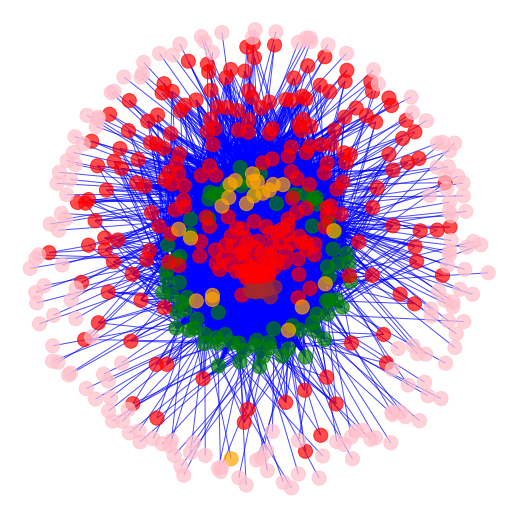

In [47]:
#visualizing
graph = nx.Graph()

#adding one node for each community
for community in range (1, 78):
    graph.add_node(community)

comm_crime_dict = community_crime_dict(2015, 1)

#normalizing our connection dictionary before adding to graph
comm_crime_dict = maxMinNormalize(comm_crime_dict)
add_nodes(graph, comm_crime_dict)

comm_police_dict = community_police_dict()
comm_police_dict = maxMinNormalize(comm_police_dict)
add_nodes(graph, comm_police_dict)

comm_school_dict = community_school_dict(2015, 1)
comm_school_dict = maxMinNormalize(comm_school_dict)
add_nodes(graph, comm_school_dict)

comm_sr_dict = service_request(2015, 1)
comm_sr_dict = maxMinNormalize(comm_sr_dict)
add_nodes(graph, comm_sr_dict)

police_crime_d = police_crime_dict(2015, 1)
police_crime_d = maxMinNormalize(police_crime_d)
add_nodes(graph, police_crime_d)

plt.figure(figsize=(7,7))
nx.draw(graph, pos=graphviz_layout(graph), node_color=colorMap(graph), node_size=200, 
        edge_color='blue', alpha=0.7, prog='dot')
plt.show()

<b> Story so far: </b>
- Till now we are able to add 5 layers of socio-economic data to our network
- at each layer we've visualized what our network can look like
- as an example, we've used January 2015 data for visualizing purposes
- we can create network graphs for other 59 months in similar fashion

## Helper Functions - II

In [17]:
def build_network(year, month):

    graph = nx.Graph()

    #adding one node for each community
    for community in range (1, 78):
        graph.add_node(community)

    comm_crime_dict = community_crime_dict(year, month)

    #normalizing our connection dictionary before adding to graph
    comm_crime_dict = maxMinNormalize(comm_crime_dict)
    add_nodes(graph, comm_crime_dict)

    comm_police_dict = community_police_dict()
    comm_police_dict = maxMinNormalize(comm_police_dict)
    add_nodes(graph, comm_police_dict)

    comm_school_dict = community_school_dict(year, month)
    comm_school_dict = maxMinNormalize(comm_school_dict)
    add_nodes(graph, comm_school_dict)

    comm_sr_dict = service_request(year, month)
    comm_sr_dict = maxMinNormalize(comm_sr_dict)
    add_nodes(graph, comm_sr_dict)

    police_crime_d = police_crime_dict(year, month)
    police_crime_d = maxMinNormalize(police_crime_d)
    add_nodes(graph, police_crime_d)

    return graph

In [18]:
def vis_graph(graph):
    plt.figure(figsize=(7,7))
    nx.draw(graph, pos=graphviz_layout(graph), node_color=colorMap(graph), node_size=200, 
                edge_color='blue', alpha=0.7, prog='dot')
    plt.show()

# Node similarity

## Helper Functions

In [19]:
#gives us a actual node_num to (0 to len(nodes)) mapping
def get_node_map(graph):
    
    node_map = {}
    for i, s in enumerate (graph.nodes()):
        node_map[s] = i
        
    return node_map

In [20]:
#gives us all comm nodes pair
def get_community_nodes(graph):

    #Nodes contain all possible (source, target) edges
    nodes  = []

    #Generate all possible combination of edges
    for i, s in enumerate (graph.nodes()):
        for j, t in enumerate (graph.nodes()):
            if (s > 77 or t > 77):
                continue
            nodes.append((s, t))
    return nodes

In [21]:
#given an networkx iterator, converts it to a square similarity matrix
def iterToMatrix(iterG, num_nodes):
    sim_matrix = np.zeros((num_nodes, num_nodes))
    
    for i, j, k in iterG:
        if (i > num_nodes or j > num_nodes):
            continue
        sim_matrix[i-1, j-1] = k
        sim_matrix[j-1, i-1] = k

    # assigning this val, helps in sorting
    for i in range(num_nodes):
        sim_matrix[i - 1, i - 1] = -10
        
    return sim_matrix

In [22]:
#given a similarity matrix and a node C, finds top N similar nodes to C

def top_n_sim_comms(top, comm_no, mat):
    #Sort and return n similar communities
    index_no = comm_no - 1
    req_sim = mat[index_no]
    
    sorted_arr = np.sort(req_sim)[::-1]
    index = np.argsort(req_sim)[::-1]
    
    for i, idex in enumerate (index):
        index[i] = idex + 1
        
    return (index[0:top])

## Jaccard Similarity (JS)

- We'll calculate jaccard similarity for all community nodes pairs.
- What is the Jaccard Similarity of two nodes N1 and N2 of a graph?
    - Let X be the set of all the neighbors of N1 and Y be the set of all the neighbors of N2
    - Than JS of nodes N1 and N2 is: <br>
    \begin{equation}
js(N1,N2) = \frac{|X\cap Y|}{|X \cup Y|} 
\end{equation}

- Let nodes N1 and N2 have top 2 JS values among all other nodes with node N. So N1 and N2 are two most similar nodes to N.

Refer: https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.link_prediction.jaccard_coefficient.html

In [23]:
def calc_jacc_idx(train_graph, a, b):
    try:
        if len(set(train_graph.neighbors(a))) == 0  | len(set(train_graph.neighbors(b))) == 0:
            return 0
        sim = (len(set(train_graph.neighbors(a)).intersection(set(train_graph.neighbors(b)))))/\
                                    (len(set(train_graph.neighbors(a)).union(set(train_graph.neighbors(b)))))
    except:
        return 0
    return sim

In [24]:
def topNJS(graph, comm_num, top):
    
    comm_nodes = get_community_nodes(graph)
    as_sim_iter = []
    for pair in comm_nodes:
        sim = calc_jacc_idx(graph, pair[0], pair[1])
        as_sim_iter.append((pair[0], pair[1], sim))
    
    mat = iterToMatrix(as_sim_iter, 77)
    
    return top_n_sim_comms(top, comm_num, mat)

In [56]:
#testing
graph = build_network(2015, 1)
idx = topNJS(graph, 1, 2)
idx

array([66, 16])

## Adamic/Adar index Similarity (AS)

- We'll calculate adamic/adar index for all community nodes pairs.
- Higher the adam index of two nodes, for the nodes are similar
- What is adamic index of two nodes N1 and N2?
$$AS(N1,N2)=\sum_{u \in N(N1) \cap N(N2)}\frac{1}{log(|N(u)|)}$$

Refer: <br>
https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.link_prediction.adamic_adar_index.html#networkx.algorithms.link_prediction.adamic_adar_index

https://neo4j.com/docs/graph-algorithms/current/labs-algorithms/adamic-adar/

In [25]:
#adar index
def calc_adar_in(train_graph, a, b):
    sum = 0
    try:
        n = list(set(train_graph.neighbors(a)).intersection(set(train_graph.neighbors(b))))
        if len(n) != 0:
            for i in n:
                sum = sum + (1 / np.log10(len(list(train_graph.neighbors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [26]:
def topNAS(graph, comm_num, top):
    
    comm_nodes = get_community_nodes(graph)
    as_sim_iter = []
    for pair in comm_nodes:
        sim = calc_adar_in(graph, pair[0], pair[1])
        as_sim_iter.append((pair[0], pair[1], sim))
    
    mat = iterToMatrix(as_sim_iter, 77)
    
    return top_n_sim_comms(top, comm_num, mat)

In [59]:
#testing
graph = build_network(2015, 1)
idx = topNAS(graph, 1, 2)
idx

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


array([25, 49])

## SimRank (SR)

Refer: <br>
http://ilpubs.stanford.edu:8090/508/1/2001-41.pdf

https://github.com/caesar0301/graphsim

Below is an implementation of SimRank node similarity measure as defined in the linked paper.

In [27]:
#sim rank
def calc_sim_rank(graph, a, b, param, sim, node_map):
    
    a_ns, b_ns = list(graph.neighbors(a)), list(graph.neighbors(b))
    if len(a_ns) == 0 or len(b_ns) == 0:
        return 0
    
    sumN = 0
    for k in a_ns:
        for l in b_ns:
            sumN = sumN + sim[node_map[k]][node_map[l]]
    return (param * sumN) / (len(a_ns) * len(b_ns))

In [28]:
#simRank matrix for complete graph
def getSimRankMatrixTotal(node_map, total_nodes, nodes):
    
    #simrank algorithm parameters
    max_iter = 100
    c = 0.8
    eps=1e-4
    
    sim_prev = np.zeros(total_nodes)
    sim = np.identity(total_nodes)
    
    for i in tqdm_notebook(range(max_iter)):
        if np.allclose(sim, sim_prev, atol=eps):
            break
        
        sim_prev = np.copy(sim)
        
        for a, b in tqdm_notebook(itertools.product(nodes, nodes), leave=False):
            if a == b:
                continue
            
            rank = calc_sim_rank(graph, a, b, c, sim_prev, node_map)
            sim[node_map[a], node_map[b]] = rank
    
    return sim

In [ ]:
#testing
graph = build_network(2015, 1)
simMatrix = getSimRankMatrixTotal(graph)

In [29]:
def topNSR(graph, comm_num, top):
    
    node_map = get_node_map(graph)
    total_nodes = len(graph.nodes())
    nodes = graph.nodes()
    
    simMatrix = getSimRankMatrixTotal(node_map, total_nodes, nodes)
    
    #simRank matrix for community nodes
    sim_comms = np.zeros((77,77))

    for i in range(1, 78):
        for j in range(1, 78):

            idx_i = node_map[i]
            idx_j = node_map[j]

            sim_comms[i-1, j-1] = simMatrix[idx_i, idx_j]

    for i in range(77):
        sim_comms[i - 1, i - 1] = -10
    
    return top_n_sim_comms(top, comm_num, sim_comms)

In [ ]:
#testing
graph = build_network(2015, 1)
idx = topNSR(graph, 1, 2)
idx

## ASCOS Similarity Measure

Refer: <br>
https://clgiles.ist.psu.edu/pubs/ASONAM2013.pdf

https://github.com/caesar0301/graphsim

Below is an implementation of ASCOS node similarity measure as defined in the linked paper.

In [30]:
#ascos rank
def calc_ascos(graph, a, b, param, sim, node_map):
    
    a_ns = list(graph.neighbors(a))
    if len(a_ns) == 0:
        return 0
    
    sumN = 0
    for k in a_ns:
        sumN = sumN + sim[node_map[k]][node_map[b]]
    return (param * sumN) / len(a_ns)

In [30]:
#ascos similarity matrix for complete graph
def getASCOSMatrixTotal(node_map, total_nodes, nodes):
    
    #simrank algorithm parameters
    max_iter = 100
    c = 0.8
    eps=1e-4
    
    sim_prev = np.zeros(total_nodes)
    sim = np.identity(total_nodes)
    
    for i in tqdm_notebook(range(max_iter)):
        if np.allclose(sim, sim_prev, atol=eps):
            break
        
        sim_prev = np.copy(sim)
        
        for a, b in tqdm_notebook(itertools.product(nodes, nodes), leave=False):
            if a == b:
                continue
            
            rank = calc_ascos(graph, a, b, c, sim_prev, node_map)
            sim[node_map[a], node_map[b]] = rank
    
    return sim

In [ ]:
#testing
graph = build_network(2015, 1)
simMatrix = getASCOSMatrixTotal(graph)

In [31]:
def topNASCOS(graph, comm_num, top):

    node_map = get_node_map(graph)
    total_nodes = len(graph.nodes())
    nodes = graph.nodes()
    
    simMatrix = getASCOSMatrixTotal(node_map, total_nodes, nodes)
    
    #simRank matrix for community nodes
    sim_comms = np.zeros((77,77))

    for i in range(1, 78):
        for j in range(1, 78):

            idx_i = node_map[i]
            idx_j = node_map[j]

            sim_comms[i-1, j-1] = simMatrix[idx_i, idx_j]

    for i in range(77):
        sim_comms[i - 1, i - 1] = -10
    
    return top_n_sim_comms(top, comm_num, sim_comms)

In [85]:
#testing
graph = build_network(2015, 1)
idx = topNASCOS(graph, 1, 2)
idx

array([25, 49])

## Pseudoinverse of the Laplacian matrix Similarity Measure (PL)

Refer: <br>
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.71.2194&rep=rep1&type=pdf <br>
https://github.com/Ravisutha/CrimePrediction/blob/master/Code/Analysis/similarity.py <br>
https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.linalg.laplacianmatrix.laplacian_matrix.html <br>
https://numpy.org/doc/1.18/reference/generated/numpy.linalg.pinv.html <br>
https://math.stackexchange.com/questions/1679597/meaning-of-the-inverse-of-the-laplacian-matrix

Below is an implementation of Pseudoinverse of the Laplacian matrix Similarity Measure as defined in the linked paper.

In [32]:
def inverse_nomalize (inv_L):

    for i in range(np.size(inv_L, axis=1)):
        d = inv_L[i, i]
        m = np.min(inv_L[i, :])

        for j in range (np.size(inv_L, axis=1)):
            inv_L[i, j] = inv_L[i, j] - m / d
            
    return inv_L

In [33]:
def topNPL(graph, comm_num, top):
    comm_nodes = get_community_nodes(graph)
    
    L = nx.laplacian_matrix(graph)
    dense_L = L.todense()
    pinv_L = np.linalg.pinv(dense_L)
    
    inv_L = pinv_L.A
    
    inv_L = inv_L [0:77, 0:77]
    
    inv_L_norm = inverse_nomalize(inv_L)
    
    for i in range(77):
        inv_L_norm[i - 1, i - 1] = -10
    
    return top_n_sim_comms(top, comm_num, inv_L_norm)

In [ ]:
#testing
graph = build_network(2015, 1)
idx = topNPL(graph, 1, 2)
idx

## Helper Functions - II

In [34]:
def n_similar_communities(top, comm, graph, method='jacc'):
    
    if method == 'jacc':
        return topNJS(graph, comm, top)
    
    if method == 'adam':
        return topNAS(graph, comm, top)
    
    if method == 'sr':
        return topNSR(graph, comm, top)
    
    if method == 'ascos':
        return topNASCOS(graph, comm, top)
    
    if method == 'pl':
        return topNPL(graph, comm, top)

# Feature engineering

## Feature 1

In [35]:
#feature 1
def police_stations_linked_to_comm(comm_list):
    
    comm_police_dict = community_police_dict()
    
    police_nums = []
    for comm in comm_list:
        
        res = 0
        for key in comm_police_dict[comm]:
            res += 1
        police_nums.append(res)
    
    return police_nums

## Feature 2

In [36]:
## Feature 2
def schools_linked_to_comm(comm_list, year, month):
    
    comm_sc_dict = community_school_dict(year, month)
    
    school_nums = []
    for comm in comm_list:
        
        res = 0
        for key in comm_sc_dict[comm]:
            res += 1
        school_nums.append(res)
    
    return school_nums

## Feature 3

In [37]:
## Feature 3

def num_of_sr_in_period(comm_list, year, month):
    
    com_sr_dict = service_request(year, month)
    
    sr_nums = []
    for comm in comm_list:
        
        res = 0
        for key in com_sr_dict[comm]:
            res += com_sr_dict[comm][key]
        sr_nums.append(res)
    
    return sr_nums

## Feature 4

In [38]:
## Feature 4

def avg_act_score_for_comm(comm_list, year, month):
    
    comm_sc_dict = community_school_dict(year, month)
    
    avg_act = []
    for comm in comm_list:
        
        scr = 0
        cnt = 0
        for key in comm_sc_dict[comm]:
            scr += comm_sc_dict[comm][key]
            cnt += 1
        
        if cnt != 0:
            avg_act.append((scr / cnt))
        else:
            avg_act.append(0)
    
    return avg_act

In [39]:
def get_ys(c, year, month):
    comm_crime = community_crime_dict(year, month)
    tot = 0
    for key in comm_crime[c]:
        tot += comm_crime[c][key]
        
    return tot

In [40]:
def get_features(c, year, month, top, sim_method):
    
    graph = build_network(year, month)
    crime_code_dict = crime_code_map()
    index = n_similar_communities(top, c, graph, sim_method)
        
    comms_in_question = [] 
    comms_in_question.append(c)
    for i in index:
        comms_in_question.append(i)

    tot_feats = []

    #feature 1
    police_feats = police_stations_linked_to_comm(comms_in_question)
    tot_feats = tot_feats + police_feats

    #feature 2
    school_feats = schools_linked_to_comm(comms_in_question, year, month)
    tot_feats = tot_feats + school_feats

    #feature 3
    sr_feats = num_of_sr_in_period(comms_in_question, year, month)
    tot_feats = tot_feats + sr_feats
    
    #feature 4
    school_feats_1 = avg_act_score_for_comm(comms_in_question, year, month)
    tot_feats = tot_feats + school_feats_1
    
    return tot_feats

# Models

## Data Preparation

In [51]:
#prepare data
top = 2
sim_method = 'jacc'

X_tot = []
y_tot = []

X_tot_ts = []
y_tot_ts = []

for month in tqdm_notebook(range(1,13)):
    
    X_month = []
    y_month = []
    
    X_month_ts = []
    y_month_ts = []
    for c in tqdm_notebook(range(1,78), leave=False):
        
        X_train = []
        y_train = []
        for year in tqdm_notebook(range(2011, 2015), leave=False):
            X_train.append(get_features(c, year, month, top, sim_method))
            y_train.append(get_ys(c, year, month))
        
        X_month.append(X_train)
        y_month.append(y_train)
    
    X_tot.append(X_month)
    y_tot.append(y_month)

In [52]:
X_tot = np.array(X_tot)
X_tot.shape

(12, 77, 4, 12)

In [53]:
y_tot = np.array(y_tot)
y_tot.shape

(12, 77, 4)

In [54]:
savetofile(X_tot, 'X_feats_1')
savetofile(y_tot, 'y_tot_1')

In [42]:
X_tot = openfromfile('X_feats_1')
y_tot = openfromfile('y_tot_1')

## Linear Regression

------Data extracted-----
------Data normalized-----
Community-1, Month-1, Year-2015: actual-292; preds-341.96686011712774
RMSE error: 49.96686011712774
------Data extracted-----
------Data normalized-----
Community-1, Month-2, Year-2015: actual-244; preds-326.00297114888053
RMSE error: 82.00297114888053
------Data extracted-----
------Data normalized-----
Community-1, Month-3, Year-2015: actual-291; preds-380.13807640348574
RMSE error: 89.13807640348574
------Data extracted-----
------Data normalized-----
Community-1, Month-4, Year-2015: actual-237; preds-412.1620533817489
RMSE error: 175.16205338174888
------Data extracted-----
------Data normalized-----
Community-1, Month-5, Year-2015: actual-331; preds-455.5848645321116
RMSE error: 124.58486453211162
------Data extracted-----
------Data normalized-----
Community-1, Month-6, Year-2015: actual-298; preds-393.62084711235553
RMSE error: 95.62084711235553
------Data extracted-----
------Data normalized-----
Community-1, Month-7, Year-20

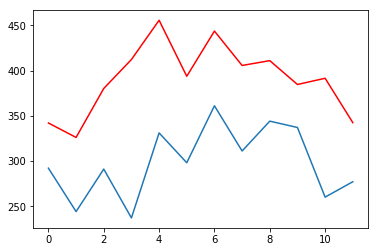

------Data extracted-----
------Data normalized-----
Community-2, Month-1, Year-2015: actual-248; preds-314.7646201928934
RMSE error: 66.7646201928934
------Data extracted-----
------Data normalized-----
Community-2, Month-2, Year-2015: actual-220; preds-245.22266422790125
RMSE error: 25.222664227901248
------Data extracted-----
------Data normalized-----
Community-2, Month-3, Year-2015: actual-239; preds-260.34814646929703
RMSE error: 21.348146469297035
------Data extracted-----
------Data normalized-----
Community-2, Month-4, Year-2015: actual-240; preds-272.708038379326
RMSE error: 32.70803837932601
------Data extracted-----
------Data normalized-----
Community-2, Month-5, Year-2015: actual-280; preds-317.7592526114469
RMSE error: 37.759252611446925
------Data extracted-----
------Data normalized-----
Community-2, Month-6, Year-2015: actual-260; preds-351.4916960671502
RMSE error: 91.4916960671502
------Data extracted-----
------Data normalized-----
Community-2, Month-7, Year-2015: 

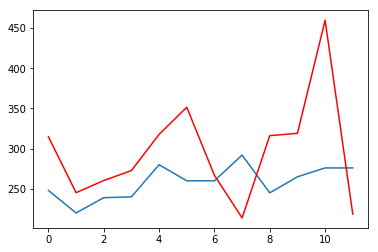

------Data extracted-----
------Data normalized-----
Community-3, Month-1, Year-2015: actual-242; preds-340.6226965696134
RMSE error: 98.62269656961342
------Data extracted-----
------Data normalized-----
Community-3, Month-2, Year-2015: actual-208; preds-313.3282991203205
RMSE error: 105.32829912032048
------Data extracted-----
------Data normalized-----
Community-3, Month-3, Year-2015: actual-275; preds-349.23316111068493
RMSE error: 74.23316111068493
------Data extracted-----
------Data normalized-----
Community-3, Month-4, Year-2015: actual-311; preds-336.38829459097343
RMSE error: 25.38829459097343
------Data extracted-----
------Data normalized-----
Community-3, Month-5, Year-2015: actual-315; preds-343.37079613147284
RMSE error: 28.370796131472844
------Data extracted-----
------Data normalized-----
Community-3, Month-6, Year-2015: actual-316; preds-463.44239502399813
RMSE error: 147.44239502399813
------Data extracted-----
------Data normalized-----
Community-3, Month-7, Year-2

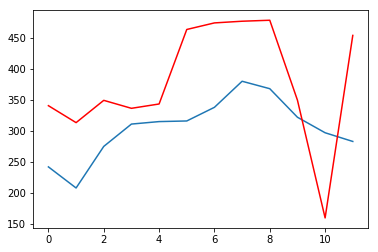

------Data extracted-----
------Data normalized-----
Community-4, Month-1, Year-2015: actual-156; preds-149.5151415301585
RMSE error: 6.484858469841498
------Data extracted-----
------Data normalized-----
Community-4, Month-2, Year-2015: actual-110; preds-89.47517494775325
RMSE error: 20.524825052246754
------Data extracted-----
------Data normalized-----
Community-4, Month-3, Year-2015: actual-134; preds-91.64916051232159
RMSE error: 42.350839487678414
------Data extracted-----
------Data normalized-----
Community-4, Month-4, Year-2015: actual-134; preds-194.13534082233792
RMSE error: 60.13534082233792
------Data extracted-----
------Data normalized-----
Community-4, Month-5, Year-2015: actual-158; preds-149.06665506126765
RMSE error: 8.933344938732347
------Data extracted-----
------Data normalized-----
Community-4, Month-6, Year-2015: actual-180; preds-171.5417295920845
RMSE error: 8.458270407915506
------Data extracted-----
------Data normalized-----
Community-4, Month-7, Year-2015

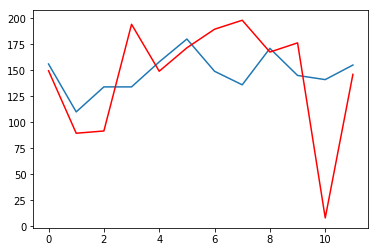

------Data extracted-----
------Data normalized-----
Community-5, Month-1, Year-2015: actual-112; preds-150.02015973927456
RMSE error: 38.02015973927456
------Data extracted-----
------Data normalized-----
Community-5, Month-2, Year-2015: actual-93; preds-106.83494185825487
RMSE error: 13.834941858254865
------Data extracted-----
------Data normalized-----
Community-5, Month-3, Year-2015: actual-105; preds-145.58845688837897
RMSE error: 40.58845688837897
------Data extracted-----
------Data normalized-----
Community-5, Month-4, Year-2015: actual-120; preds-126.69282650907337
RMSE error: 6.69282650907337
------Data extracted-----
------Data normalized-----
Community-5, Month-5, Year-2015: actual-107; preds-166.50447501195208
RMSE error: 59.50447501195208
------Data extracted-----
------Data normalized-----
Community-5, Month-6, Year-2015: actual-138; preds-167.5874692951901
RMSE error: 29.58746929519009
------Data extracted-----
------Data normalized-----
Community-5, Month-7, Year-2015

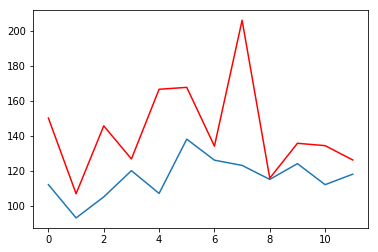

------Data extracted-----
------Data normalized-----
Community-6, Month-1, Year-2015: actual-378; preds-495.9786412964055
RMSE error: 117.9786412964055
------Data extracted-----
------Data normalized-----
Community-6, Month-2, Year-2015: actual-279; preds-437.7719944687171
RMSE error: 158.77199446871708
------Data extracted-----
------Data normalized-----
Community-6, Month-3, Year-2015: actual-398; preds-563.5334242708243
RMSE error: 165.5334242708243
------Data extracted-----
------Data normalized-----
Community-6, Month-4, Year-2015: actual-397; preds-334.3193897962558
RMSE error: 62.68061020374421
------Data extracted-----
------Data normalized-----
Community-6, Month-5, Year-2015: actual-455; preds-651.7167526061108
RMSE error: 196.71675260611084
------Data extracted-----
------Data normalized-----
Community-6, Month-6, Year-2015: actual-575; preds-682.454673544859
RMSE error: 107.45467354485902
------Data extracted-----
------Data normalized-----
Community-6, Month-7, Year-2015: 

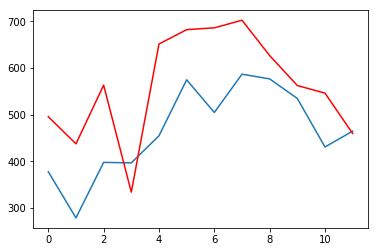

------Data extracted-----
------Data normalized-----
Community-7, Month-1, Year-2015: actual-255; preds-389.9642015922418
RMSE error: 134.9642015922418
------Data extracted-----
------Data normalized-----
Community-7, Month-2, Year-2015: actual-225; preds-274.25000300982407
RMSE error: 49.25000300982407
------Data extracted-----
------Data normalized-----
Community-7, Month-3, Year-2015: actual-304; preds-343.2498555342105
RMSE error: 39.249855534210496
------Data extracted-----
------Data normalized-----
Community-7, Month-4, Year-2015: actual-296; preds-353.1715743126082
RMSE error: 57.171574312608186
------Data extracted-----
------Data normalized-----
Community-7, Month-5, Year-2015: actual-347; preds-589.5686419678427
RMSE error: 242.56864196784272
------Data extracted-----
------Data normalized-----
Community-7, Month-6, Year-2015: actual-310; preds-485.52777858365
RMSE error: 175.52777858365
------Data extracted-----
------Data normalized-----
Community-7, Month-7, Year-2015: ac

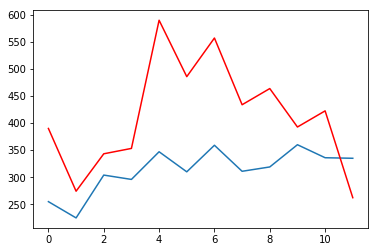

------Data extracted-----
------Data normalized-----
Community-8, Month-1, Year-2015: actual-685; preds-728.6166682641981
RMSE error: 43.6166682641981
------Data extracted-----
------Data normalized-----
Community-8, Month-2, Year-2015: actual-534; preds-591.0406110885428
RMSE error: 57.040611088542846
------Data extracted-----
------Data normalized-----
Community-8, Month-3, Year-2015: actual-666; preds-839.060411375457
RMSE error: 173.06041137545697
------Data extracted-----
------Data normalized-----
Community-8, Month-4, Year-2015: actual-696; preds-882.1860869551126
RMSE error: 186.18608695511261
------Data extracted-----
------Data normalized-----
Community-8, Month-5, Year-2015: actual-790; preds-742.9179904448887
RMSE error: 47.08200955511131
------Data extracted-----
------Data normalized-----
Community-8, Month-6, Year-2015: actual-766; preds-998.6490259308688
RMSE error: 232.6490259308688
------Data extracted-----
------Data normalized-----
Community-8, Month-7, Year-2015: a

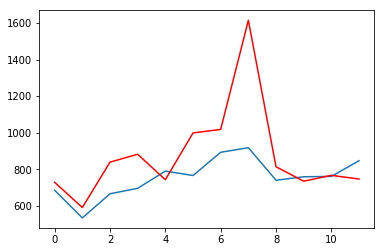

------Data extracted-----
------Data normalized-----
Community-9, Month-1, Year-2015: actual-19; preds-24.00389658777269
RMSE error: 5.00389658777269
------Data extracted-----
------Data normalized-----
Community-9, Month-2, Year-2015: actual-14; preds-16.24473407731901
RMSE error: 2.244734077319009
------Data extracted-----
------Data normalized-----
Community-9, Month-3, Year-2015: actual-33; preds-26.571068080138687
RMSE error: 6.428931919861313
------Data extracted-----
------Data normalized-----
Community-9, Month-4, Year-2015: actual-16; preds-24.019475685449223
RMSE error: 8.019475685449223
------Data extracted-----
------Data normalized-----
Community-9, Month-5, Year-2015: actual-19; preds-109.44035546868787
RMSE error: 90.44035546868787
------Data extracted-----
------Data normalized-----
Community-9, Month-6, Year-2015: actual-26; preds-24.485580253629198
RMSE error: 1.5144197463708018
------Data extracted-----
------Data normalized-----
Community-9, Month-7, Year-2015: actu

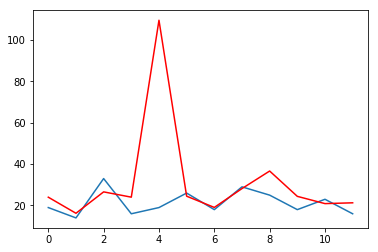

------Data extracted-----
------Data normalized-----
Community-10, Month-1, Year-2015: actual-105; preds-92.32176662701345
RMSE error: 12.678233372986554
------Data extracted-----
------Data normalized-----
Community-10, Month-2, Year-2015: actual-76; preds-65.89596053535166
RMSE error: 10.104039464648338
------Data extracted-----
------Data normalized-----
Community-10, Month-3, Year-2015: actual-106; preds-82.17114885446166
RMSE error: 23.828851145538337
------Data extracted-----
------Data normalized-----
Community-10, Month-4, Year-2015: actual-114; preds-120.11136760286033
RMSE error: 6.1113676028603265
------Data extracted-----
------Data normalized-----
Community-10, Month-5, Year-2015: actual-111; preds-117.03548994594934
RMSE error: 6.035489945949337
------Data extracted-----
------Data normalized-----
Community-10, Month-6, Year-2015: actual-101; preds-100.72088711277559
RMSE error: 0.2791128872244144
------Data extracted-----
------Data normalized-----
Community-10, Month-7,

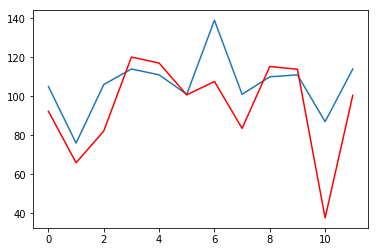

------Data extracted-----
------Data normalized-----
Community-11, Month-1, Year-2015: actual-91; preds-121.7143035792999
RMSE error: 30.714303579299894
------Data extracted-----
------Data normalized-----
Community-11, Month-2, Year-2015: actual-88; preds-90.46756314229725
RMSE error: 2.4675631422972515
------Data extracted-----
------Data normalized-----
Community-11, Month-3, Year-2015: actual-87; preds-107.32830138142903
RMSE error: 20.32830138142903
------Data extracted-----
------Data normalized-----
Community-11, Month-4, Year-2015: actual-86; preds-118.90136465377094
RMSE error: 32.90136465377094
------Data extracted-----
------Data normalized-----
Community-11, Month-5, Year-2015: actual-103; preds-47.284132237933335
RMSE error: 55.715867762066665
------Data extracted-----
------Data normalized-----
Community-11, Month-6, Year-2015: actual-93; preds-117.610924469577
RMSE error: 24.610924469577
------Data extracted-----
------Data normalized-----
Community-11, Month-7, Year-201

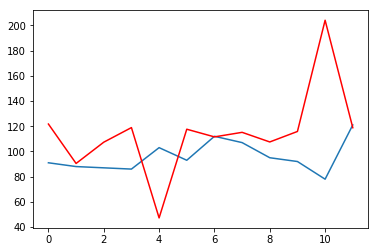

------Data extracted-----
------Data normalized-----
Community-12, Month-1, Year-2015: actual-36; preds-35.074135130914506
RMSE error: 0.925864869085494
------Data extracted-----
------Data normalized-----
Community-12, Month-2, Year-2015: actual-28; preds-22.094732595063917
RMSE error: 5.905267404936083
------Data extracted-----
------Data normalized-----
Community-12, Month-3, Year-2015: actual-30; preds-41.062569790214056
RMSE error: 11.062569790214056
------Data extracted-----
------Data normalized-----
Community-12, Month-4, Year-2015: actual-42; preds-30.973165518325487
RMSE error: 11.026834481674513
------Data extracted-----
------Data normalized-----
Community-12, Month-5, Year-2015: actual-35; preds-56.579061798728866
RMSE error: 21.579061798728866
------Data extracted-----
------Data normalized-----
Community-12, Month-6, Year-2015: actual-41; preds-38.63420157647462
RMSE error: 2.3657984235253835
------Data extracted-----
------Data normalized-----
Community-12, Month-7, Yea

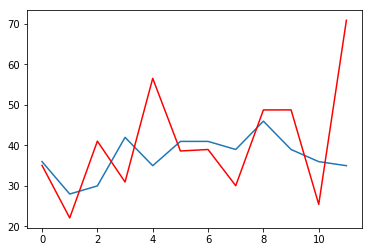

------Data extracted-----
------Data normalized-----
Community-13, Month-1, Year-2015: actual-76; preds-80.86775965165236
RMSE error: 4.867759651652364
------Data extracted-----
------Data normalized-----
Community-13, Month-2, Year-2015: actual-61; preds-62.315670197323854
RMSE error: 1.315670197323854
------Data extracted-----
------Data normalized-----
Community-13, Month-3, Year-2015: actual-59; preds-79.1989998114433
RMSE error: 20.1989998114433
------Data extracted-----
------Data normalized-----
Community-13, Month-4, Year-2015: actual-71; preds-118.00635799977343
RMSE error: 47.00635799977343
------Data extracted-----
------Data normalized-----
Community-13, Month-5, Year-2015: actual-79; preds-98.62985684451706
RMSE error: 19.629856844517064
------Data extracted-----
------Data normalized-----
Community-13, Month-6, Year-2015: actual-52; preds-86.66551811088871
RMSE error: 34.66551811088871
------Data extracted-----
------Data normalized-----
Community-13, Month-7, Year-2015: 

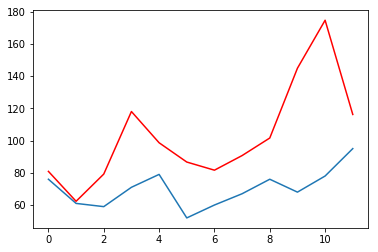

------Data extracted-----
------Data normalized-----
Community-14, Month-1, Year-2015: actual-183; preds-179.6442241611485
RMSE error: 3.355775838851514
------Data extracted-----
------Data normalized-----
Community-14, Month-2, Year-2015: actual-189; preds-223.20106102587135
RMSE error: 34.201061025871354
------Data extracted-----
------Data normalized-----
Community-14, Month-3, Year-2015: actual-221; preds-222.6458850755414
RMSE error: 1.6458850755414005
------Data extracted-----
------Data normalized-----
Community-14, Month-4, Year-2015: actual-193; preds-323.3047478234672
RMSE error: 130.3047478234672
------Data extracted-----
------Data normalized-----
Community-14, Month-5, Year-2015: actual-260; preds-241.1347756883303
RMSE error: 18.865224311669692
------Data extracted-----
------Data normalized-----
Community-14, Month-6, Year-2015: actual-226; preds-201.72690452345537
RMSE error: 24.273095476544626
------Data extracted-----
------Data normalized-----
Community-14, Month-7, 

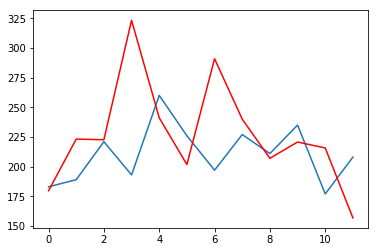

------Data extracted-----
------Data normalized-----
Community-15, Month-1, Year-2015: actual-313; preds-263.2137885479785
RMSE error: 49.78621145202152
------Data extracted-----
------Data normalized-----
Community-15, Month-2, Year-2015: actual-234; preds-287.74295349050647
RMSE error: 53.742953490506466
------Data extracted-----
------Data normalized-----
Community-15, Month-3, Year-2015: actual-285; preds-330.751943199543
RMSE error: 45.75194319954301
------Data extracted-----
------Data normalized-----
Community-15, Month-4, Year-2015: actual-275; preds-265.66723720076317
RMSE error: 9.332762799236832
------Data extracted-----
------Data normalized-----
Community-15, Month-5, Year-2015: actual-315; preds-351.9887254131239
RMSE error: 36.988725413123916
------Data extracted-----
------Data normalized-----
Community-15, Month-6, Year-2015: actual-284; preds-370.2096826132219
RMSE error: 86.2096826132219
------Data extracted-----
------Data normalized-----
Community-15, Month-7, Year

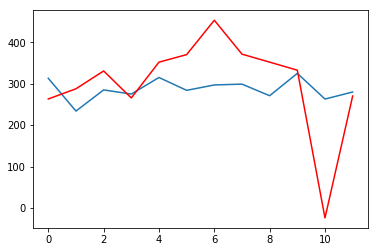

------Data extracted-----
------Data normalized-----
Community-16, Month-1, Year-2015: actual-245; preds-263.56394515051545
RMSE error: 18.56394515051545
------Data extracted-----
------Data normalized-----
Community-16, Month-2, Year-2015: actual-233; preds-260.5048791954792
RMSE error: 27.50487919547919
------Data extracted-----
------Data normalized-----
Community-16, Month-3, Year-2015: actual-261; preds-278.9001649390934
RMSE error: 17.900164939093372
------Data extracted-----
------Data normalized-----
Community-16, Month-4, Year-2015: actual-218; preds-230.11145997020012
RMSE error: 12.111459970200116
------Data extracted-----
------Data normalized-----
Community-16, Month-5, Year-2015: actual-255; preds-395.6094958624872
RMSE error: 140.60949586248722
------Data extracted-----
------Data normalized-----
Community-16, Month-6, Year-2015: actual-251; preds-288.2312854924401
RMSE error: 37.23128549244012
------Data extracted-----
------Data normalized-----
Community-16, Month-7, Y

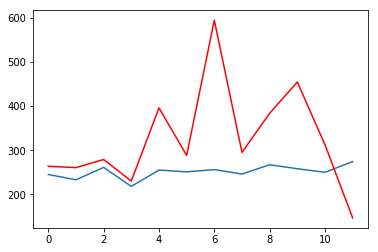

------Data extracted-----
------Data normalized-----
Community-17, Month-1, Year-2015: actual-146; preds-179.04608508019098
RMSE error: 33.04608508019098
------Data extracted-----
------Data normalized-----
Community-17, Month-2, Year-2015: actual-111; preds-126.12363566164359
RMSE error: 15.12363566164359
------Data extracted-----
------Data normalized-----
Community-17, Month-3, Year-2015: actual-135; preds-157.04484697417246
RMSE error: 22.044846974172458
------Data extracted-----
------Data normalized-----
Community-17, Month-4, Year-2015: actual-138; preds-145.5532593251319
RMSE error: 7.553259325131904
------Data extracted-----
------Data normalized-----
Community-17, Month-5, Year-2015: actual-133; preds-202.30222515671556
RMSE error: 69.30222515671556
------Data extracted-----
------Data normalized-----
Community-17, Month-6, Year-2015: actual-137; preds-156.64632929363674
RMSE error: 19.64632929363674
------Data extracted-----
------Data normalized-----
Community-17, Month-7, 

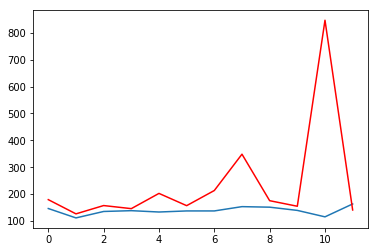

------Data extracted-----
------Data normalized-----
Community-18, Month-1, Year-2015: actual-48; preds-114.80218691810826
RMSE error: 66.80218691810826
------Data extracted-----
------Data normalized-----
Community-18, Month-2, Year-2015: actual-36; preds-60.85907284396355
RMSE error: 24.859072843963553
------Data extracted-----
------Data normalized-----
Community-18, Month-3, Year-2015: actual-59; preds-79.26560066272283
RMSE error: 20.265600662722832
------Data extracted-----
------Data normalized-----
Community-18, Month-4, Year-2015: actual-48; preds-32.12435837070002
RMSE error: 15.875641629299977
------Data extracted-----
------Data normalized-----
Community-18, Month-5, Year-2015: actual-41; preds-44.570704206379595
RMSE error: 3.5707042063795953
------Data extracted-----
------Data normalized-----
Community-18, Month-6, Year-2015: actual-49; preds-77.32340538315026
RMSE error: 28.32340538315026
------Data extracted-----
------Data normalized-----
Community-18, Month-7, Year-2

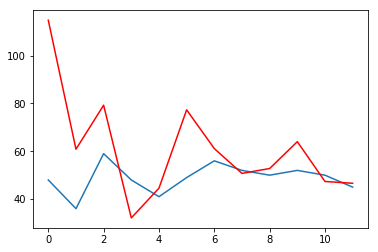

------Data extracted-----
------Data normalized-----
Community-19, Month-1, Year-2015: actual-407; preds-486.0393004511361
RMSE error: 79.03930045113611
------Data extracted-----
------Data normalized-----
Community-19, Month-2, Year-2015: actual-309; preds-404.66882123867856
RMSE error: 95.66882123867856
------Data extracted-----
------Data normalized-----
Community-19, Month-3, Year-2015: actual-414; preds-463.18707528065005
RMSE error: 49.18707528065005
------Data extracted-----
------Data normalized-----
Community-19, Month-4, Year-2015: actual-385; preds-476.96983546262214
RMSE error: 91.96983546262214
------Data extracted-----
------Data normalized-----
Community-19, Month-5, Year-2015: actual-425; preds-538.4601447938704
RMSE error: 113.46014479387043
------Data extracted-----
------Data normalized-----
Community-19, Month-6, Year-2015: actual-361; preds-608.5730793948571
RMSE error: 247.57307939485713
------Data extracted-----
------Data normalized-----
Community-19, Month-7, Y

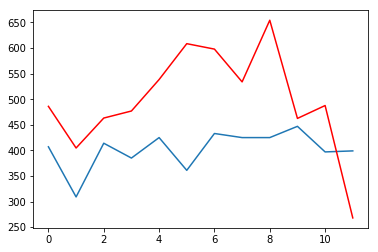

------Data extracted-----
------Data normalized-----
Community-20, Month-1, Year-2015: actual-174; preds-158.59371009627992
RMSE error: 15.40628990372008
------Data extracted-----
------Data normalized-----
Community-20, Month-2, Year-2015: actual-106; preds-150.80204647388587
RMSE error: 44.802046473885866
------Data extracted-----
------Data normalized-----
Community-20, Month-3, Year-2015: actual-150; preds-161.24426161436503
RMSE error: 11.24426161436503
------Data extracted-----
------Data normalized-----
Community-20, Month-4, Year-2015: actual-131; preds-169.98803189791212
RMSE error: 38.98803189791212
------Data extracted-----
------Data normalized-----
Community-20, Month-5, Year-2015: actual-151; preds-177.52503460898845
RMSE error: 26.52503460898845
------Data extracted-----
------Data normalized-----
Community-20, Month-6, Year-2015: actual-156; preds-170.90785607532942
RMSE error: 14.90785607532942
------Data extracted-----
------Data normalized-----
Community-20, Month-7,

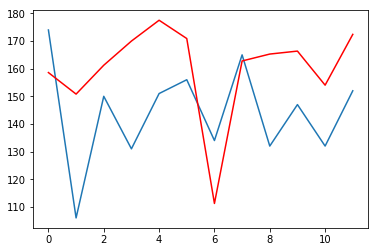

------Data extracted-----
------Data normalized-----
Community-21, Month-1, Year-2015: actual-218; preds-228.8391166068692
RMSE error: 10.839116606869197
------Data extracted-----
------Data normalized-----
Community-21, Month-2, Year-2015: actual-164; preds-221.38339336408725
RMSE error: 57.383393364087254
------Data extracted-----
------Data normalized-----
Community-21, Month-3, Year-2015: actual-180; preds-218.5244480715963
RMSE error: 38.52444807159631
------Data extracted-----
------Data normalized-----
Community-21, Month-4, Year-2015: actual-181; preds-229.95790348720197
RMSE error: 48.957903487201975
------Data extracted-----
------Data normalized-----
Community-21, Month-5, Year-2015: actual-188; preds-221.94513370335517
RMSE error: 33.94513370335517
------Data extracted-----
------Data normalized-----
Community-21, Month-6, Year-2015: actual-192; preds-209.59418256291974
RMSE error: 17.59418256291974
------Data extracted-----
------Data normalized-----
Community-21, Month-7,

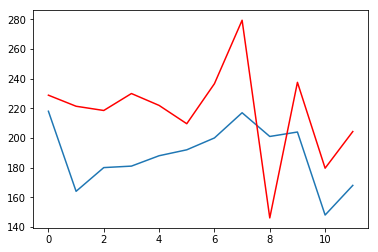

------Data extracted-----
------Data normalized-----
Community-22, Month-1, Year-2015: actual-383; preds-639.1685597581442
RMSE error: 256.16855975814417
------Data extracted-----
------Data normalized-----
Community-22, Month-2, Year-2015: actual-324; preds-438.83188239612457
RMSE error: 114.83188239612457
------Data extracted-----
------Data normalized-----
Community-22, Month-3, Year-2015: actual-391; preds-438.2579168326258
RMSE error: 47.257916832625824
------Data extracted-----
------Data normalized-----
Community-22, Month-4, Year-2015: actual-402; preds-565.637632612513
RMSE error: 163.63763261251302
------Data extracted-----
------Data normalized-----
Community-22, Month-5, Year-2015: actual-401; preds-603.563006431088
RMSE error: 202.56300643108796
------Data extracted-----
------Data normalized-----
Community-22, Month-6, Year-2015: actual-378; preds-573.4627698736607
RMSE error: 195.4627698736607
------Data extracted-----
------Data normalized-----
Community-22, Month-7, Ye

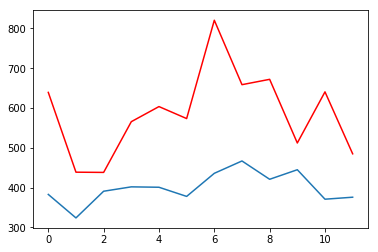

------Data extracted-----
------Data normalized-----
Community-23, Month-1, Year-2015: actual-684; preds-828.4157118680876
RMSE error: 144.41571186808756
------Data extracted-----
------Data normalized-----
Community-23, Month-2, Year-2015: actual-549; preds-747.2879518352935
RMSE error: 198.28795183529348
------Data extracted-----
------Data normalized-----
Community-23, Month-3, Year-2015: actual-739; preds-986.6382566031778
RMSE error: 247.63825660317775
------Data extracted-----
------Data normalized-----
Community-23, Month-4, Year-2015: actual-716; preds-831.4383519854252
RMSE error: 115.43835198542524
------Data extracted-----
------Data normalized-----
Community-23, Month-5, Year-2015: actual-733; preds-925.2197939432233
RMSE error: 192.2197939432233
------Data extracted-----
------Data normalized-----
Community-23, Month-6, Year-2015: actual-668; preds-944.5445604943652
RMSE error: 276.5445604943652
------Data extracted-----
------Data normalized-----
Community-23, Month-7, Ye

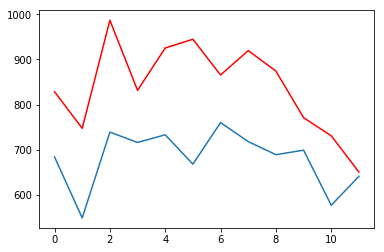

------Data extracted-----
------Data normalized-----
Community-24, Month-1, Year-2015: actual-517; preds-645.3024760335649
RMSE error: 128.30247603356486
------Data extracted-----
------Data normalized-----
Community-24, Month-2, Year-2015: actual-419; preds-476.90562075004357
RMSE error: 57.90562075004357
------Data extracted-----
------Data normalized-----
Community-24, Month-3, Year-2015: actual-483; preds-703.7506411200155
RMSE error: 220.75064112001553
------Data extracted-----
------Data normalized-----
Community-24, Month-4, Year-2015: actual-524; preds-718.070990980642
RMSE error: 194.07099098064202
------Data extracted-----
------Data normalized-----
Community-24, Month-5, Year-2015: actual-585; preds-749.9043299239921
RMSE error: 164.90432992399212
------Data extracted-----
------Data normalized-----
Community-24, Month-6, Year-2015: actual-653; preds-948.6466193169219
RMSE error: 295.64661931692194
------Data extracted-----
------Data normalized-----
Community-24, Month-7, Y

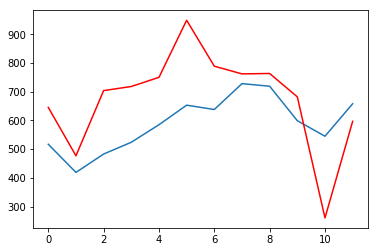

------Data extracted-----
------Data normalized-----
Community-25, Month-1, Year-2015: actual-1442; preds-1471.1366083426
RMSE error: 29.136608342600084
------Data extracted-----
------Data normalized-----
Community-25, Month-2, Year-2015: actual-1123; preds-1248.6221683382473
RMSE error: 125.62216833824732
------Data extracted-----
------Data normalized-----
Community-25, Month-3, Year-2015: actual-1418; preds-1767.5084056111464
RMSE error: 349.5084056111464
------Data extracted-----
------Data normalized-----
Community-25, Month-4, Year-2015: actual-1475; preds-1702.953739105699
RMSE error: 227.95373910569901
------Data extracted-----
------Data normalized-----
Community-25, Month-5, Year-2015: actual-1545; preds-1829.545414654805
RMSE error: 284.545414654805
------Data extracted-----
------Data normalized-----
Community-25, Month-6, Year-2015: actual-1506; preds-1728.7925881912815
RMSE error: 222.79258819128154
------Data extracted-----
------Data normalized-----
Community-25, Month

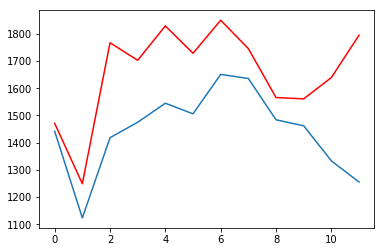

------Data extracted-----
------Data normalized-----
Community-26, Month-1, Year-2015: actual-549; preds-512.5186512559903
RMSE error: 36.481348744009665
------Data extracted-----
------Data normalized-----
Community-26, Month-2, Year-2015: actual-419; preds-438.52490199462255
RMSE error: 19.524901994622553
------Data extracted-----
------Data normalized-----
Community-26, Month-3, Year-2015: actual-563; preds-569.5070278135655
RMSE error: 6.507027813565514
------Data extracted-----
------Data normalized-----
Community-26, Month-4, Year-2015: actual-531; preds-519.5686821529232
RMSE error: 11.431317847076798
------Data extracted-----
------Data normalized-----
Community-26, Month-5, Year-2015: actual-462; preds-569.4069973101219
RMSE error: 107.40699731012194
------Data extracted-----
------Data normalized-----
Community-26, Month-6, Year-2015: actual-485; preds-555.6241990297083
RMSE error: 70.62419902970828
------Data extracted-----
------Data normalized-----
Community-26, Month-7, Y

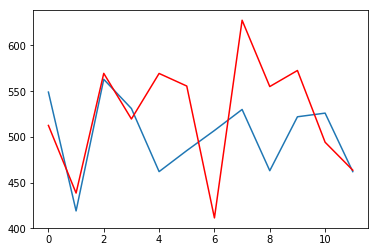

------Data extracted-----
------Data normalized-----
Community-27, Month-1, Year-2015: actual-410; preds-459.37980018896775
RMSE error: 49.37980018896775
------Data extracted-----
------Data normalized-----
Community-27, Month-2, Year-2015: actual-340; preds-406.612850351962
RMSE error: 66.61285035196198
------Data extracted-----
------Data normalized-----
Community-27, Month-3, Year-2015: actual-480; preds-526.8579259141746
RMSE error: 46.85792591417464
------Data extracted-----
------Data normalized-----
Community-27, Month-4, Year-2015: actual-439; preds-523.4734892503053
RMSE error: 84.4734892503053
------Data extracted-----
------Data normalized-----
Community-27, Month-5, Year-2015: actual-493; preds-572.3713385942883
RMSE error: 79.37133859428832
------Data extracted-----
------Data normalized-----
Community-27, Month-6, Year-2015: actual-469; preds-516.6763264791023
RMSE error: 47.67632647910227
------Data extracted-----
------Data normalized-----
Community-27, Month-7, Year-20

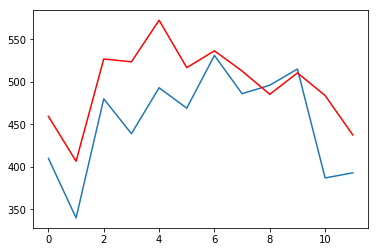

------Data extracted-----
------Data normalized-----
Community-28, Month-1, Year-2015: actual-576; preds-707.1059501629425
RMSE error: 131.10595016294246
------Data extracted-----
------Data normalized-----
Community-28, Month-2, Year-2015: actual-428; preds-543.4157970184116
RMSE error: 115.41579701841158
------Data extracted-----
------Data normalized-----
Community-28, Month-3, Year-2015: actual-610; preds-709.375151585227
RMSE error: 99.37515158522694
------Data extracted-----
------Data normalized-----
Community-28, Month-4, Year-2015: actual-691; preds-744.9604367920456
RMSE error: 53.960436792045584
------Data extracted-----
------Data normalized-----
Community-28, Month-5, Year-2015: actual-726; preds-717.8016675216571
RMSE error: 8.198332478342877
------Data extracted-----
------Data normalized-----
Community-28, Month-6, Year-2015: actual-726; preds-818.9335273664719
RMSE error: 92.93352736647194
------Data extracted-----
------Data normalized-----
Community-28, Month-7, Year

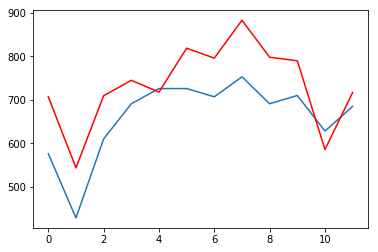

------Data extracted-----
------Data normalized-----
Community-29, Month-1, Year-2015: actual-614; preds-666.6496806943237
RMSE error: 52.649680694323706
------Data extracted-----
------Data normalized-----
Community-29, Month-2, Year-2015: actual-481; preds-668.2882079823972
RMSE error: 187.28820798239724
------Data extracted-----
------Data normalized-----
Community-29, Month-3, Year-2015: actual-718; preds-808.981459724477
RMSE error: 90.98145972447696
------Data extracted-----
------Data normalized-----
Community-29, Month-4, Year-2015: actual-686; preds-741.3843430583073
RMSE error: 55.38434305830731
------Data extracted-----
------Data normalized-----
Community-29, Month-5, Year-2015: actual-782; preds-827.3610675015418
RMSE error: 45.36106750154181
------Data extracted-----
------Data normalized-----
Community-29, Month-6, Year-2015: actual-746; preds-866.8489832722529
RMSE error: 120.8489832722529
------Data extracted-----
------Data normalized-----
Community-29, Month-7, Year-

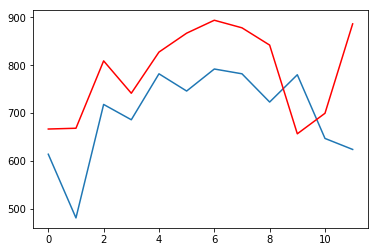

------Data extracted-----
------Data normalized-----
Community-30, Month-1, Year-2015: actual-308; preds-427.29512734274454
RMSE error: 119.29512734274454
------Data extracted-----
------Data normalized-----
Community-30, Month-2, Year-2015: actual-247; preds-379.605726448313
RMSE error: 132.60572644831302
------Data extracted-----
------Data normalized-----
Community-30, Month-3, Year-2015: actual-389; preds-441.65434005330667
RMSE error: 52.65434005330667
------Data extracted-----
------Data normalized-----
Community-30, Month-4, Year-2015: actual-413; preds-457.44476656394573
RMSE error: 44.444766563945734
------Data extracted-----
------Data normalized-----
Community-30, Month-5, Year-2015: actual-396; preds-512.5837969542404
RMSE error: 116.58379695424037
------Data extracted-----
------Data normalized-----
Community-30, Month-6, Year-2015: actual-371; preds-469.8215014022305
RMSE error: 98.82150140223052
------Data extracted-----
------Data normalized-----
Community-30, Month-7, 

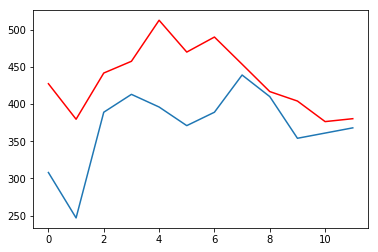

------Data extracted-----
------Data normalized-----
Community-31, Month-1, Year-2015: actual-171; preds-301.30953907020347
RMSE error: 130.30953907020347
------Data extracted-----
------Data normalized-----
Community-31, Month-2, Year-2015: actual-168; preds-216.12034926193294
RMSE error: 48.120349261932944
------Data extracted-----
------Data normalized-----
Community-31, Month-3, Year-2015: actual-202; preds-319.5312844611216
RMSE error: 117.53128446112157
------Data extracted-----
------Data normalized-----
Community-31, Month-4, Year-2015: actual-173; preds-262.0746634107804
RMSE error: 89.07466341078037
------Data extracted-----
------Data normalized-----
Community-31, Month-5, Year-2015: actual-248; preds-294.5694042525053
RMSE error: 46.56940425250531
------Data extracted-----
------Data normalized-----
Community-31, Month-6, Year-2015: actual-270; preds--18.46984269531822
RMSE error: 288.4698426953182
------Data extracted-----
------Data normalized-----
Community-31, Month-7, 

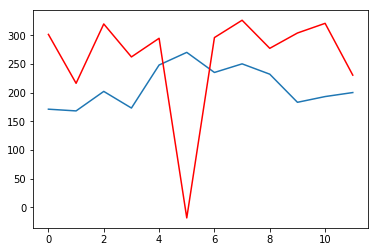

------Data extracted-----
------Data normalized-----
Community-32, Month-1, Year-2015: actual-531; preds-543.1406928453997
RMSE error: 12.140692845399712
------Data extracted-----
------Data normalized-----
Community-32, Month-2, Year-2015: actual-397; preds-513.8801876311194
RMSE error: 116.88018763111938
------Data extracted-----
------Data normalized-----
Community-32, Month-3, Year-2015: actual-573; preds-611.574300760865
RMSE error: 38.57430076086496
------Data extracted-----
------Data normalized-----
Community-32, Month-4, Year-2015: actual-584; preds-559.4768663763015
RMSE error: 24.523133623698527
------Data extracted-----
------Data normalized-----
Community-32, Month-5, Year-2015: actual-550; preds-358.44538790770434
RMSE error: 191.55461209229566
------Data extracted-----
------Data normalized-----
Community-32, Month-6, Year-2015: actual-612; preds-668.7672577446444
RMSE error: 56.76725774464444
------Data extracted-----
------Data normalized-----
Community-32, Month-7, Ye

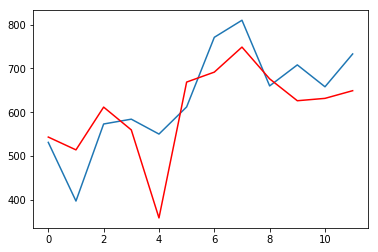

------Data extracted-----
------Data normalized-----
Community-33, Month-1, Year-2015: actual-157; preds-135.29571671098591
RMSE error: 21.704283289014086
------Data extracted-----
------Data normalized-----
Community-33, Month-2, Year-2015: actual-117; preds-113.98910629147205
RMSE error: 3.010893708527945
------Data extracted-----
------Data normalized-----
Community-33, Month-3, Year-2015: actual-131; preds-130.54904297543496
RMSE error: 0.4509570245650423
------Data extracted-----
------Data normalized-----
Community-33, Month-4, Year-2015: actual-116; preds-137.46517814616354
RMSE error: 21.465178146163538
------Data extracted-----
------Data normalized-----
Community-33, Month-5, Year-2015: actual-141; preds-164.6700412752109
RMSE error: 23.670041275210906
------Data extracted-----
------Data normalized-----
Community-33, Month-6, Year-2015: actual-202; preds-115.18061751876411
RMSE error: 86.81938248123589
------Data extracted-----
------Data normalized-----
Community-33, Month-

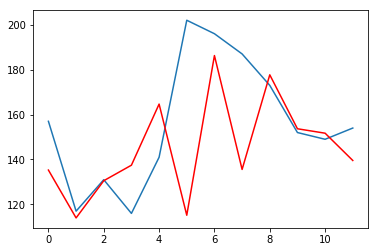

------Data extracted-----
------Data normalized-----
Community-34, Month-1, Year-2015: actual-90; preds-101.32486297576305
RMSE error: 11.324862975763054
------Data extracted-----
------Data normalized-----
Community-34, Month-2, Year-2015: actual-61; preds-91.90585265638117
RMSE error: 30.90585265638117
------Data extracted-----
------Data normalized-----
Community-34, Month-3, Year-2015: actual-81; preds-112.14876090666888
RMSE error: 31.148760906668883
------Data extracted-----
------Data normalized-----
Community-34, Month-4, Year-2015: actual-78; preds-109.20092161665167
RMSE error: 31.20092161665167
------Data extracted-----
------Data normalized-----
Community-34, Month-5, Year-2015: actual-91; preds-135.80432030669104
RMSE error: 44.80432030669104
------Data extracted-----
------Data normalized-----
Community-34, Month-6, Year-2015: actual-94; preds-128.69999774125176
RMSE error: 34.699997741251764
------Data extracted-----
------Data normalized-----
Community-34, Month-7, Year

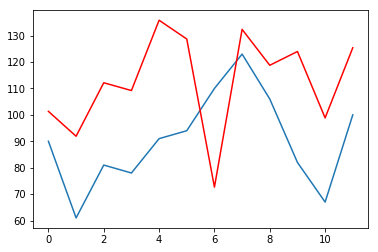

------Data extracted-----
------Data normalized-----
Community-35, Month-1, Year-2015: actual-202; preds-226.95060103479457
RMSE error: 24.950601034794573
------Data extracted-----
------Data normalized-----
Community-35, Month-2, Year-2015: actual-143; preds-180.05444977066307
RMSE error: 37.05444977066307
------Data extracted-----
------Data normalized-----
Community-35, Month-3, Year-2015: actual-212; preds-214.25629961961994
RMSE error: 2.256299619619938
------Data extracted-----
------Data normalized-----
Community-35, Month-4, Year-2015: actual-195; preds-200.20614900027573
RMSE error: 5.20614900027573
------Data extracted-----
------Data normalized-----
Community-35, Month-5, Year-2015: actual-246; preds-264.43885386363365
RMSE error: 18.438853863633653
------Data extracted-----
------Data normalized-----
Community-35, Month-6, Year-2015: actual-211; preds-256.3370372261755
RMSE error: 45.33703722617548
------Data extracted-----
------Data normalized-----
Community-35, Month-7, 

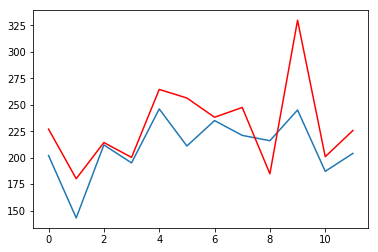

------Data extracted-----
------Data normalized-----
Community-36, Month-1, Year-2015: actual-49; preds-52.25347294735531
RMSE error: 3.253472947355313
------Data extracted-----
------Data normalized-----
Community-36, Month-2, Year-2015: actual-23; preds-32.68063070440658
RMSE error: 9.680630704406582
------Data extracted-----
------Data normalized-----
Community-36, Month-3, Year-2015: actual-48; preds-37.52930785474826
RMSE error: 10.47069214525174
------Data extracted-----
------Data normalized-----
Community-36, Month-4, Year-2015: actual-50; preds-239.3497974024807
RMSE error: 189.3497974024807
------Data extracted-----
------Data normalized-----
Community-36, Month-5, Year-2015: actual-54; preds-63.916413250041956
RMSE error: 9.916413250041956
------Data extracted-----
------Data normalized-----
Community-36, Month-6, Year-2015: actual-48; preds-66.8681687432602
RMSE error: 18.8681687432602
------Data extracted-----
------Data normalized-----
Community-36, Month-7, Year-2015: ac

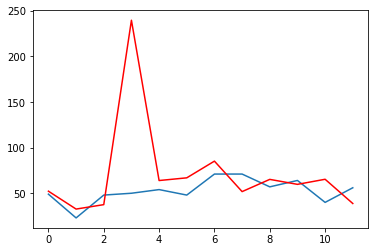

------Data extracted-----
------Data normalized-----
Community-37, Month-1, Year-2015: actual-62; preds-96.77385111979744
RMSE error: 34.77385111979744
------Data extracted-----
------Data normalized-----
Community-37, Month-2, Year-2015: actual-51; preds-77.67418275274787
RMSE error: 26.674182752747868
------Data extracted-----
------Data normalized-----
Community-37, Month-3, Year-2015: actual-67; preds-89.14094376703797
RMSE error: 22.140943767037967
------Data extracted-----
------Data normalized-----
Community-37, Month-4, Year-2015: actual-64; preds-107.34141640050808
RMSE error: 43.34141640050808
------Data extracted-----
------Data normalized-----
Community-37, Month-5, Year-2015: actual-88; preds-100.20517266165528
RMSE error: 12.205172661655283
------Data extracted-----
------Data normalized-----
Community-37, Month-6, Year-2015: actual-79; preds-96.10753606714158
RMSE error: 17.10753606714158
------Data extracted-----
------Data normalized-----
Community-37, Month-7, Year-20

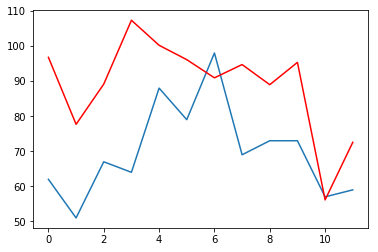

------Data extracted-----
------Data normalized-----
Community-38, Month-1, Year-2015: actual-224; preds-309.9317938454091
RMSE error: 85.93179384540912
------Data extracted-----
------Data normalized-----
Community-38, Month-2, Year-2015: actual-196; preds-256.77305756256897
RMSE error: 60.773057562568965
------Data extracted-----
------Data normalized-----
Community-38, Month-3, Year-2015: actual-234; preds-313.059457933087
RMSE error: 79.059457933087
------Data extracted-----
------Data normalized-----
Community-38, Month-4, Year-2015: actual-248; preds-670.6264051835844
RMSE error: 422.62640518358444
------Data extracted-----
------Data normalized-----
Community-38, Month-5, Year-2015: actual-282; preds-351.5226829692768
RMSE error: 69.52268296927679
------Data extracted-----
------Data normalized-----
Community-38, Month-6, Year-2015: actual-271; preds-388.9744633516275
RMSE error: 117.97446335162749
------Data extracted-----
------Data normalized-----
Community-38, Month-7, Year-

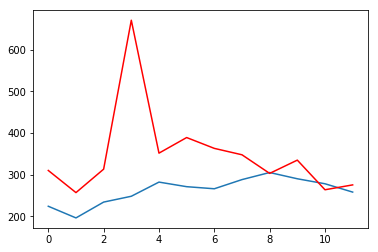

------Data extracted-----
------Data normalized-----
Community-39, Month-1, Year-2015: actual-115; preds-31.64670704586996
RMSE error: 83.35329295413004
------Data extracted-----
------Data normalized-----
Community-39, Month-2, Year-2015: actual-80; preds-101.58336526247605
RMSE error: 21.58336526247605
------Data extracted-----
------Data normalized-----
Community-39, Month-3, Year-2015: actual-119; preds-149.1552904841377
RMSE error: 30.15529048413771
------Data extracted-----
------Data normalized-----
Community-39, Month-4, Year-2015: actual-107; preds-145.83997176863662
RMSE error: 38.839971768636616
------Data extracted-----
------Data normalized-----
Community-39, Month-5, Year-2015: actual-130; preds-128.8081133389029
RMSE error: 1.1918866610971008
------Data extracted-----
------Data normalized-----
Community-39, Month-6, Year-2015: actual-120; preds-145.59640529759395
RMSE error: 25.596405297593947
------Data extracted-----
------Data normalized-----
Community-39, Month-7, Y

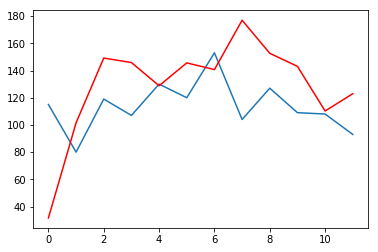

------Data extracted-----
------Data normalized-----
Community-40, Month-1, Year-2015: actual-206; preds-253.10594961495752
RMSE error: 47.105949614957524
------Data extracted-----
------Data normalized-----
Community-40, Month-2, Year-2015: actual-150; preds-205.39595264800363
RMSE error: 55.39595264800363
------Data extracted-----
------Data normalized-----
Community-40, Month-3, Year-2015: actual-219; preds-243.281244585948
RMSE error: 24.281244585948002
------Data extracted-----
------Data normalized-----
Community-40, Month-4, Year-2015: actual-238; preds-217.2886528219654
RMSE error: 20.7113471780346
------Data extracted-----
------Data normalized-----
Community-40, Month-5, Year-2015: actual-221; preds-347.99827356682846
RMSE error: 126.99827356682846
------Data extracted-----
------Data normalized-----
Community-40, Month-6, Year-2015: actual-204; preds-316.5602132989356
RMSE error: 112.5602132989356
------Data extracted-----
------Data normalized-----
Community-40, Month-7, Ye

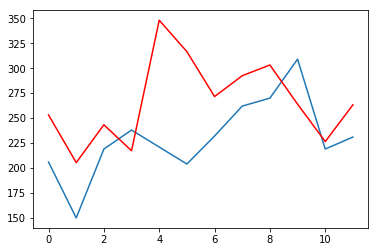

------Data extracted-----
------Data normalized-----
Community-41, Month-1, Year-2015: actual-115; preds-126.446164935501
RMSE error: 11.446164935501002
------Data extracted-----
------Data normalized-----
Community-41, Month-2, Year-2015: actual-72; preds-119.5435045533737
RMSE error: 47.543504553373694
------Data extracted-----
------Data normalized-----
Community-41, Month-3, Year-2015: actual-117; preds-153.71807769491676
RMSE error: 36.71807769491676
------Data extracted-----
------Data normalized-----
Community-41, Month-4, Year-2015: actual-115; preds-166.80152851650772
RMSE error: 51.801528516507716
------Data extracted-----
------Data normalized-----
Community-41, Month-5, Year-2015: actual-122; preds-149.66306933823768
RMSE error: 27.663069338237676
------Data extracted-----
------Data normalized-----
Community-41, Month-6, Year-2015: actual-141; preds-173.98066941914252
RMSE error: 32.980669419142515
------Data extracted-----
------Data normalized-----
Community-41, Month-7,

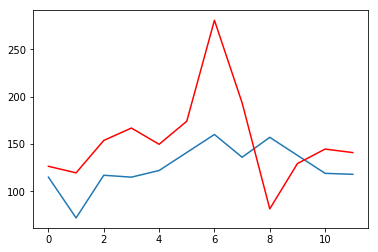

------Data extracted-----
------Data normalized-----
Community-42, Month-1, Year-2015: actual-295; preds-376.1548365648617
RMSE error: 81.15483656486168
------Data extracted-----
------Data normalized-----
Community-42, Month-2, Year-2015: actual-204; preds-223.14187190870888
RMSE error: 19.14187190870888
------Data extracted-----
------Data normalized-----
Community-42, Month-3, Year-2015: actual-314; preds-348.38395147806096
RMSE error: 34.383951478060965
------Data extracted-----
------Data normalized-----
Community-42, Month-4, Year-2015: actual-321; preds-400.98559200355845
RMSE error: 79.98559200355845
------Data extracted-----
------Data normalized-----
Community-42, Month-5, Year-2015: actual-318; preds-562.3498051686689
RMSE error: 244.34980516866892
------Data extracted-----
------Data normalized-----
Community-42, Month-6, Year-2015: actual-334; preds-440.3223452951346
RMSE error: 106.3223452951346
------Data extracted-----
------Data normalized-----
Community-42, Month-7, Y

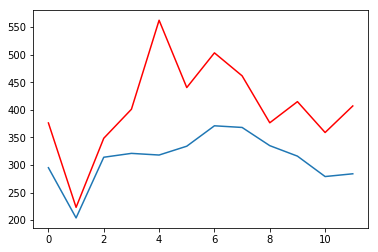

------Data extracted-----
------Data normalized-----
Community-43, Month-1, Year-2015: actual-816; preds-678.4464171985014
RMSE error: 137.55358280149858
------Data extracted-----
------Data normalized-----
Community-43, Month-2, Year-2015: actual-585; preds-628.5999068489069
RMSE error: 43.599906848906926
------Data extracted-----
------Data normalized-----
Community-43, Month-3, Year-2015: actual-799; preds-780.3628722879804
RMSE error: 18.637127712019605
------Data extracted-----
------Data normalized-----
Community-43, Month-4, Year-2015: actual-749; preds-834.2040044589384
RMSE error: 85.20400445893836
------Data extracted-----
------Data normalized-----
Community-43, Month-5, Year-2015: actual-791; preds-849.071276925853
RMSE error: 58.071276925853
------Data extracted-----
------Data normalized-----
Community-43, Month-6, Year-2015: actual-795; preds-951.0492422086079
RMSE error: 156.0492422086079
------Data extracted-----
------Data normalized-----
Community-43, Month-7, Year-2

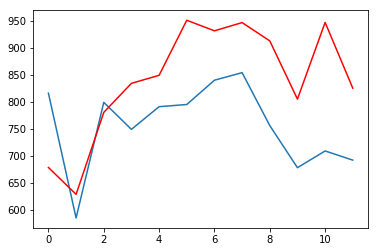

------Data extracted-----
------Data normalized-----
Community-44, Month-1, Year-2015: actual-446; preds-533.2563082849949
RMSE error: 87.25630828499493
------Data extracted-----
------Data normalized-----
Community-44, Month-2, Year-2015: actual-397; preds-396.51032886103565
RMSE error: 0.4896711389643542
------Data extracted-----
------Data normalized-----
Community-44, Month-3, Year-2015: actual-532; preds-575.1717616725334
RMSE error: 43.17176167253342
------Data extracted-----
------Data normalized-----
Community-44, Month-4, Year-2015: actual-496; preds-565.733130029995
RMSE error: 69.73313002999498
------Data extracted-----
------Data normalized-----
Community-44, Month-5, Year-2015: actual-548; preds-589.7476420723623
RMSE error: 41.74764207236228
------Data extracted-----
------Data normalized-----
Community-44, Month-6, Year-2015: actual-530; preds-628.8068128959651
RMSE error: 98.8068128959651
------Data extracted-----
------Data normalized-----
Community-44, Month-7, Year-2

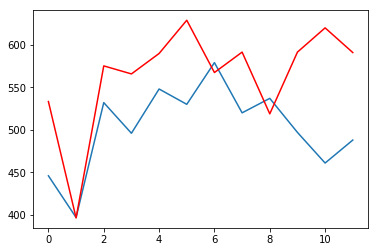

------Data extracted-----
------Data normalized-----
Community-45, Month-1, Year-2015: actual-101; preds-146.58040805574873
RMSE error: 45.580408055748734
------Data extracted-----
------Data normalized-----
Community-45, Month-2, Year-2015: actual-95; preds-113.83591378440487
RMSE error: 18.835913784404866
------Data extracted-----
------Data normalized-----
Community-45, Month-3, Year-2015: actual-151; preds-162.77593575246624
RMSE error: 11.77593575246624
------Data extracted-----
------Data normalized-----
Community-45, Month-4, Year-2015: actual-122; preds-130.47368756585863
RMSE error: 8.473687565858626
------Data extracted-----
------Data normalized-----
Community-45, Month-5, Year-2015: actual-120; preds-207.2143399069662
RMSE error: 87.21433990696619
------Data extracted-----
------Data normalized-----
Community-45, Month-6, Year-2015: actual-135; preds-161.00132654366834
RMSE error: 26.00132654366834
------Data extracted-----
------Data normalized-----
Community-45, Month-7, 

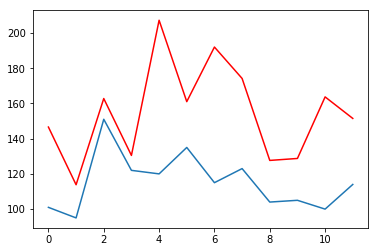

------Data extracted-----
------Data normalized-----
Community-46, Month-1, Year-2015: actual-400; preds-546.7380600214592
RMSE error: 146.7380600214592
------Data extracted-----
------Data normalized-----
Community-46, Month-2, Year-2015: actual-318; preds-358.8702672775898
RMSE error: 40.87026727758979
------Data extracted-----
------Data normalized-----
Community-46, Month-3, Year-2015: actual-406; preds-464.7540896096955
RMSE error: 58.754089609695484
------Data extracted-----
------Data normalized-----
Community-46, Month-4, Year-2015: actual-385; preds-562.962554232871
RMSE error: 177.96255423287096
------Data extracted-----
------Data normalized-----
Community-46, Month-5, Year-2015: actual-463; preds-508.03892463358494
RMSE error: 45.03892463358494
------Data extracted-----
------Data normalized-----
Community-46, Month-6, Year-2015: actual-441; preds-568.8876478933921
RMSE error: 127.88764789339211
------Data extracted-----
------Data normalized-----
Community-46, Month-7, Yea

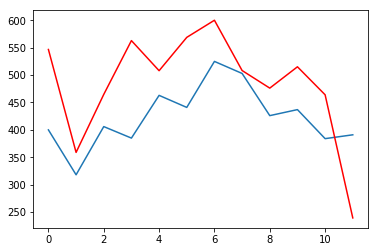

------Data extracted-----
------Data normalized-----
Community-47, Month-1, Year-2015: actual-20; preds-56.39021464836839
RMSE error: 36.39021464836839
------Data extracted-----
------Data normalized-----
Community-47, Month-2, Year-2015: actual-24; preds-25.170923123393422
RMSE error: 1.1709231233934219
------Data extracted-----
------Data normalized-----
Community-47, Month-3, Year-2015: actual-30; preds-36.60955051318481
RMSE error: 6.609550513184807
------Data extracted-----
------Data normalized-----
Community-47, Month-4, Year-2015: actual-34; preds-33.0880678053232
RMSE error: 0.9119321946768011
------Data extracted-----
------Data normalized-----
Community-47, Month-5, Year-2015: actual-40; preds-36.60477032521963
RMSE error: 3.395229674780367
------Data extracted-----
------Data normalized-----
Community-47, Month-6, Year-2015: actual-31; preds-43.31185829403731
RMSE error: 12.311858294037307
------Data extracted-----
------Data normalized-----
Community-47, Month-7, Year-2015

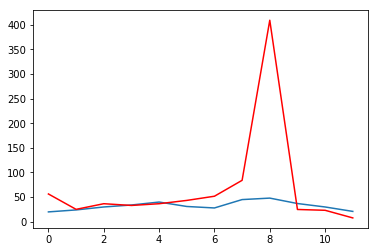

------Data extracted-----
------Data normalized-----
Community-48, Month-1, Year-2015: actual-106; preds-82.30769678629684
RMSE error: 23.692303213703156
------Data extracted-----
------Data normalized-----
Community-48, Month-2, Year-2015: actual-85; preds-129.38834686941811
RMSE error: 44.388346869418115
------Data extracted-----
------Data normalized-----
Community-48, Month-3, Year-2015: actual-100; preds-152.67365009531773
RMSE error: 52.673650095317726
------Data extracted-----
------Data normalized-----
Community-48, Month-4, Year-2015: actual-134; preds-243.10506381926385
RMSE error: 109.10506381926385
------Data extracted-----
------Data normalized-----
Community-48, Month-5, Year-2015: actual-132; preds-163.51690212210525
RMSE error: 31.51690212210525
------Data extracted-----
------Data normalized-----
Community-48, Month-6, Year-2015: actual-138; preds-92.07774528521354
RMSE error: 45.92225471478646
------Data extracted-----
------Data normalized-----
Community-48, Month-7,

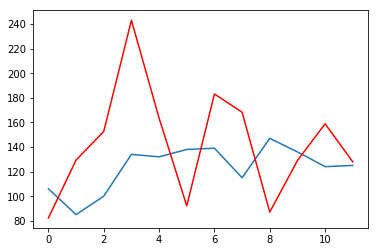

------Data extracted-----
------Data normalized-----
Community-49, Month-1, Year-2015: actual-595; preds-597.3861938083649
RMSE error: 2.386193808364851
------Data extracted-----
------Data normalized-----
Community-49, Month-2, Year-2015: actual-433; preds-573.696476451489
RMSE error: 140.69647645148905
------Data extracted-----
------Data normalized-----
Community-49, Month-3, Year-2015: actual-569; preds-278.1336084517063
RMSE error: 290.8663915482937
------Data extracted-----
------Data normalized-----
Community-49, Month-4, Year-2015: actual-572; preds-859.3947573118207
RMSE error: 287.39475731182074
------Data extracted-----
------Data normalized-----
Community-49, Month-5, Year-2015: actual-620; preds-721.269295485229
RMSE error: 101.26929548522901
------Data extracted-----
------Data normalized-----
Community-49, Month-6, Year-2015: actual-579; preds-737.0864036455887
RMSE error: 158.0864036455887
------Data extracted-----
------Data normalized-----
Community-49, Month-7, Year-

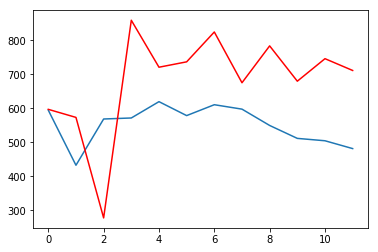

------Data extracted-----
------Data normalized-----
Community-50, Month-1, Year-2015: actual-104; preds-99.6134760262621
RMSE error: 4.386523973737894
------Data extracted-----
------Data normalized-----
Community-50, Month-2, Year-2015: actual-79; preds-80.27591987267216
RMSE error: 1.2759198726721621
------Data extracted-----
------Data normalized-----
Community-50, Month-3, Year-2015: actual-84; preds-90.13720566582123
RMSE error: 6.137205665821227
------Data extracted-----
------Data normalized-----
Community-50, Month-4, Year-2015: actual-107; preds-103.02522479395846
RMSE error: 3.974775206041542
------Data extracted-----
------Data normalized-----
Community-50, Month-5, Year-2015: actual-93; preds-91.03820595724217
RMSE error: 1.9617940427578304
------Data extracted-----
------Data normalized-----
Community-50, Month-6, Year-2015: actual-76; preds-118.533494367691
RMSE error: 42.533494367691006
------Data extracted-----
------Data normalized-----
Community-50, Month-7, Year-201

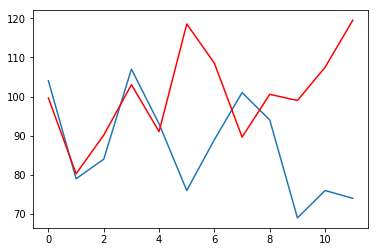

------Data extracted-----
------Data normalized-----
Community-51, Month-1, Year-2015: actual-175; preds-180.67546325240306
RMSE error: 5.675463252403063
------Data extracted-----
------Data normalized-----
Community-51, Month-2, Year-2015: actual-119; preds-158.12894749597837
RMSE error: 39.128947495978366
------Data extracted-----
------Data normalized-----
Community-51, Month-3, Year-2015: actual-159; preds-197.43248928008137
RMSE error: 38.43248928008137
------Data extracted-----
------Data normalized-----
Community-51, Month-4, Year-2015: actual-174; preds-178.95828521934516
RMSE error: 4.958285219345157
------Data extracted-----
------Data normalized-----
Community-51, Month-5, Year-2015: actual-165; preds-213.665151345852
RMSE error: 48.665151345851996
------Data extracted-----
------Data normalized-----
Community-51, Month-6, Year-2015: actual-162; preds-156.5614975931735
RMSE error: 5.438502406826501
------Data extracted-----
------Data normalized-----
Community-51, Month-7, Y

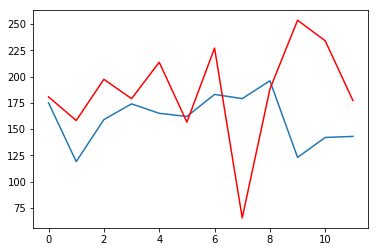

------Data extracted-----
------Data normalized-----
Community-52, Month-1, Year-2015: actual-132; preds-90.30472805306115
RMSE error: 41.695271946938846
------Data extracted-----
------Data normalized-----
Community-52, Month-2, Year-2015: actual-87; preds-91.6046698547525
RMSE error: 4.604669854752501
------Data extracted-----
------Data normalized-----
Community-52, Month-3, Year-2015: actual-95; preds-99.61065095275546
RMSE error: 4.6106509527554635
------Data extracted-----
------Data normalized-----
Community-52, Month-4, Year-2015: actual-109; preds-114.63694190462304
RMSE error: 5.636941904623043
------Data extracted-----
------Data normalized-----
Community-52, Month-5, Year-2015: actual-117; preds-157.41866126768912
RMSE error: 40.41866126768912
------Data extracted-----
------Data normalized-----
Community-52, Month-6, Year-2015: actual-141; preds-127.29278920829461
RMSE error: 13.707210791705393
------Data extracted-----
------Data normalized-----
Community-52, Month-7, Yea

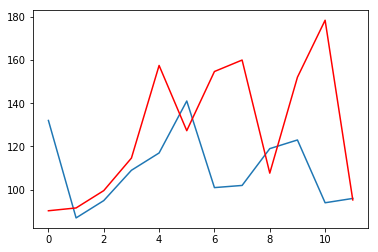

------Data extracted-----
------Data normalized-----
Community-53, Month-1, Year-2015: actual-333; preds-418.3870628316587
RMSE error: 85.38706283165868
------Data extracted-----
------Data normalized-----
Community-53, Month-2, Year-2015: actual-237; preds-385.5517885078584
RMSE error: 148.55178850785842
------Data extracted-----
------Data normalized-----
Community-53, Month-3, Year-2015: actual-327; preds-432.3155352207822
RMSE error: 105.31553522078218
------Data extracted-----
------Data normalized-----
Community-53, Month-4, Year-2015: actual-305; preds-378.8665163942641
RMSE error: 73.86651639426412
------Data extracted-----
------Data normalized-----
Community-53, Month-5, Year-2015: actual-388; preds-493.9223020515802
RMSE error: 105.92230205158017
------Data extracted-----
------Data normalized-----
Community-53, Month-6, Year-2015: actual-324; preds-482.7557032585989
RMSE error: 158.75570325859888
------Data extracted-----
------Data normalized-----
Community-53, Month-7, Ye

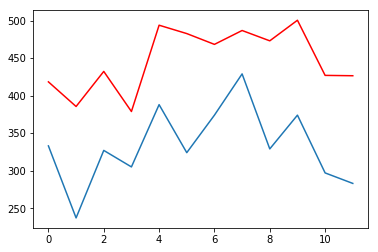

------Data extracted-----
------Data normalized-----
Community-54, Month-1, Year-2015: actual-100; preds-88.55275191560753
RMSE error: 11.44724808439247
------Data extracted-----
------Data normalized-----
Community-54, Month-2, Year-2015: actual-76; preds-51.46844722464169
RMSE error: 24.531552775358307
------Data extracted-----
------Data normalized-----
Community-54, Month-3, Year-2015: actual-104; preds-228.20256684245484
RMSE error: 124.20256684245484
------Data extracted-----
------Data normalized-----
Community-54, Month-4, Year-2015: actual-104; preds-124.19617283687137
RMSE error: 20.19617283687137
------Data extracted-----
------Data normalized-----
Community-54, Month-5, Year-2015: actual-103; preds-159.0961496758049
RMSE error: 56.096149675804895
------Data extracted-----
------Data normalized-----
Community-54, Month-6, Year-2015: actual-123; preds-161.84962780132284
RMSE error: 38.84962780132284
------Data extracted-----
------Data normalized-----
Community-54, Month-7, Y

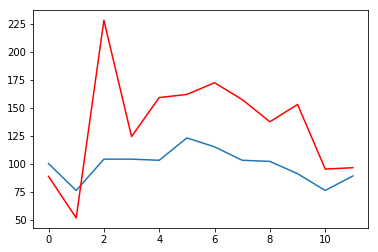

------Data extracted-----
------Data normalized-----
Community-55, Month-1, Year-2015: actual-42; preds-52.87264839796892
RMSE error: 10.872648397968923
------Data extracted-----
------Data normalized-----
Community-55, Month-2, Year-2015: actual-29; preds-50.400981717634544
RMSE error: 21.400981717634544
------Data extracted-----
------Data normalized-----
Community-55, Month-3, Year-2015: actual-39; preds-35.30708168480366
RMSE error: 3.692918315196337
------Data extracted-----
------Data normalized-----
Community-55, Month-4, Year-2015: actual-44; preds-62.372077144166155
RMSE error: 18.372077144166155
------Data extracted-----
------Data normalized-----
Community-55, Month-5, Year-2015: actual-43; preds-50.10457232078582
RMSE error: 7.10457232078582
------Data extracted-----
------Data normalized-----
Community-55, Month-6, Year-2015: actual-51; preds-72.75785872860898
RMSE error: 21.75785872860898
------Data extracted-----
------Data normalized-----
Community-55, Month-7, Year-201

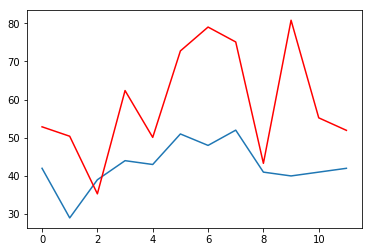

------Data extracted-----
------Data normalized-----
Community-56, Month-1, Year-2015: actual-183; preds-105.00698951153763
RMSE error: 77.99301048846237
------Data extracted-----
------Data normalized-----
Community-56, Month-2, Year-2015: actual-130; preds-173.5409239207482
RMSE error: 43.54092392074821
------Data extracted-----
------Data normalized-----
Community-56, Month-3, Year-2015: actual-174; preds-204.88397373239985
RMSE error: 30.883973732399852
------Data extracted-----
------Data normalized-----
Community-56, Month-4, Year-2015: actual-118; preds-174.42484060781476
RMSE error: 56.42484060781476
------Data extracted-----
------Data normalized-----
Community-56, Month-5, Year-2015: actual-154; preds-190.69150042327766
RMSE error: 36.69150042327766
------Data extracted-----
------Data normalized-----
Community-56, Month-6, Year-2015: actual-169; preds-207.5691757676445
RMSE error: 38.56917576764451
------Data extracted-----
------Data normalized-----
Community-56, Month-7, Y

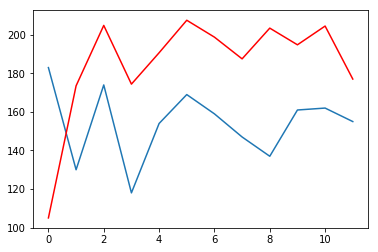

------Data extracted-----
------Data normalized-----
Community-57, Month-1, Year-2015: actual-85; preds-84.79170915701414
RMSE error: 0.20829084298586054
------Data extracted-----
------Data normalized-----
Community-57, Month-2, Year-2015: actual-82; preds-86.24920566854844
RMSE error: 4.249205668548441
------Data extracted-----
------Data normalized-----
Community-57, Month-3, Year-2015: actual-103; preds-68.44344126721755
RMSE error: 34.55655873278245
------Data extracted-----
------Data normalized-----
Community-57, Month-4, Year-2015: actual-89; preds-94.39345231970837
RMSE error: 5.3934523197083735
------Data extracted-----
------Data normalized-----
Community-57, Month-5, Year-2015: actual-100; preds-111.53487633650778
RMSE error: 11.534876336507779
------Data extracted-----
------Data normalized-----
Community-57, Month-6, Year-2015: actual-77; preds-62.92693230026191
RMSE error: 14.07306769973809
------Data extracted-----
------Data normalized-----
Community-57, Month-7, Year-

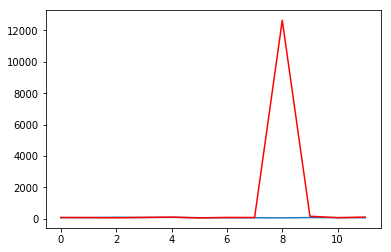

------Data extracted-----
------Data normalized-----
Community-58, Month-1, Year-2015: actual-236; preds-307.29309783661597
RMSE error: 71.29309783661597
------Data extracted-----
------Data normalized-----
Community-58, Month-2, Year-2015: actual-184; preds-228.25809491022721
RMSE error: 44.258094910227214
------Data extracted-----
------Data normalized-----
Community-58, Month-3, Year-2015: actual-245; preds-250.45517231023686
RMSE error: 5.455172310236861
------Data extracted-----
------Data normalized-----
Community-58, Month-4, Year-2015: actual-251; preds-194.63625354047633
RMSE error: 56.36374645952367
------Data extracted-----
------Data normalized-----
Community-58, Month-5, Year-2015: actual-230; preds-169.68577611391845
RMSE error: 60.31422388608155
------Data extracted-----
------Data normalized-----
Community-58, Month-6, Year-2015: actual-232; preds-275.97929429360903
RMSE error: 43.97929429360903
------Data extracted-----
------Data normalized-----
Community-58, Month-7,

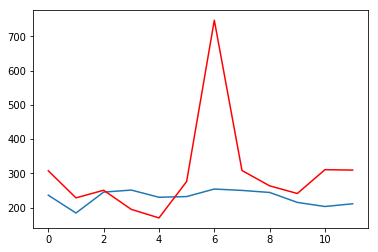

------Data extracted-----
------Data normalized-----
Community-59, Month-1, Year-2015: actual-88; preds-74.01820556237352
RMSE error: 13.981794437626476
------Data extracted-----
------Data normalized-----
Community-59, Month-2, Year-2015: actual-79; preds-93.26826286615821
RMSE error: 14.26826286615821
------Data extracted-----
------Data normalized-----
Community-59, Month-3, Year-2015: actual-75; preds-103.93215008797974
RMSE error: 28.932150087979736
------Data extracted-----
------Data normalized-----
Community-59, Month-4, Year-2015: actual-81; preds-115.90789963037214
RMSE error: 34.90789963037214
------Data extracted-----
------Data normalized-----
Community-59, Month-5, Year-2015: actual-108; preds-112.25460332773076
RMSE error: 4.254603327730763
------Data extracted-----
------Data normalized-----
Community-59, Month-6, Year-2015: actual-109; preds-109.33644046256707
RMSE error: 0.3364404625670687
------Data extracted-----
------Data normalized-----
Community-59, Month-7, Yea

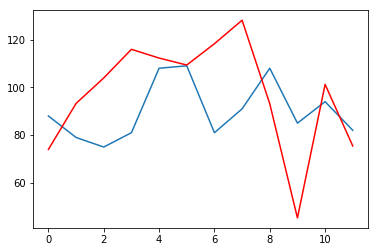

------Data extracted-----
------Data normalized-----
Community-60, Month-1, Year-2015: actual-133; preds-190.07778102942044
RMSE error: 57.077781029420436
------Data extracted-----
------Data normalized-----
Community-60, Month-2, Year-2015: actual-86; preds-71.4428886765427
RMSE error: 14.557111323457306
------Data extracted-----
------Data normalized-----
Community-60, Month-3, Year-2015: actual-151; preds-199.04220059034483
RMSE error: 48.042200590344834
------Data extracted-----
------Data normalized-----
Community-60, Month-4, Year-2015: actual-119; preds-159.07151289121913
RMSE error: 40.07151289121913
------Data extracted-----
------Data normalized-----
Community-60, Month-5, Year-2015: actual-129; preds-216.32923297297492
RMSE error: 87.32923297297492
------Data extracted-----
------Data normalized-----
Community-60, Month-6, Year-2015: actual-156; preds-207.41496022088847
RMSE error: 51.414960220888474
------Data extracted-----
------Data normalized-----
Community-60, Month-7,

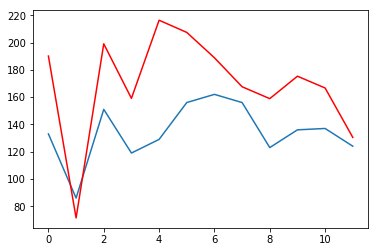

------Data extracted-----
------Data normalized-----
Community-61, Month-1, Year-2015: actual-377; preds-446.3370563590511
RMSE error: 69.33705635905108
------Data extracted-----
------Data normalized-----
Community-61, Month-2, Year-2015: actual-306; preds-432.85498521402695
RMSE error: 126.85498521402695
------Data extracted-----
------Data normalized-----
Community-61, Month-3, Year-2015: actual-394; preds-474.87416049615405
RMSE error: 80.87416049615405
------Data extracted-----
------Data normalized-----
Community-61, Month-4, Year-2015: actual-417; preds-511.7401985222678
RMSE error: 94.7401985222678
------Data extracted-----
------Data normalized-----
Community-61, Month-5, Year-2015: actual-444; preds-548.6111644331635
RMSE error: 104.61116443316348
------Data extracted-----
------Data normalized-----
Community-61, Month-6, Year-2015: actual-438; preds-629.9524506112666
RMSE error: 191.9524506112666
------Data extracted-----
------Data normalized-----
Community-61, Month-7, Yea

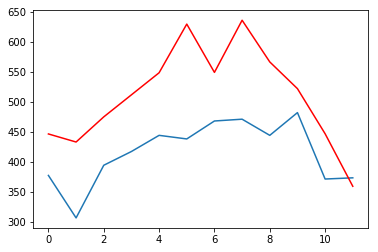

------Data extracted-----
------Data normalized-----
Community-62, Month-1, Year-2015: actual-70; preds-90.66789036371941
RMSE error: 20.66789036371941
------Data extracted-----
------Data normalized-----
Community-62, Month-2, Year-2015: actual-71; preds-76.13625781205411
RMSE error: 5.136257812054112
------Data extracted-----
------Data normalized-----
Community-62, Month-3, Year-2015: actual-81; preds-105.4447657055708
RMSE error: 24.444765705570802
------Data extracted-----
------Data normalized-----
Community-62, Month-4, Year-2015: actual-71; preds-102.31405487194478
RMSE error: 31.314054871944776
------Data extracted-----
------Data normalized-----
Community-62, Month-5, Year-2015: actual-75; preds-110.3564859130723
RMSE error: 35.356485913072305
------Data extracted-----
------Data normalized-----
Community-62, Month-6, Year-2015: actual-80; preds-120.52044787373201
RMSE error: 40.52044787373201
------Data extracted-----
------Data normalized-----
Community-62, Month-7, Year-20

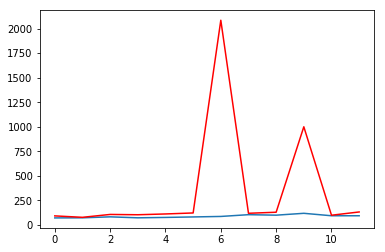

------Data extracted-----
------Data normalized-----
Community-63, Month-1, Year-2015: actual-193; preds-164.7912011296164
RMSE error: 28.20879887038359
------Data extracted-----
------Data normalized-----
Community-63, Month-2, Year-2015: actual-139; preds-153.75753613420386
RMSE error: 14.75753613420386
------Data extracted-----
------Data normalized-----
Community-63, Month-3, Year-2015: actual-187; preds-221.5431315791368
RMSE error: 34.5431315791368
------Data extracted-----
------Data normalized-----
Community-63, Month-4, Year-2015: actual-200; preds-234.8486396843288
RMSE error: 34.84863968432879
------Data extracted-----
------Data normalized-----
Community-63, Month-5, Year-2015: actual-221; preds-209.79028964686754
RMSE error: 11.209710353132465
------Data extracted-----
------Data normalized-----
Community-63, Month-6, Year-2015: actual-249; preds-280.15967878995343
RMSE error: 31.159678789953432
------Data extracted-----
------Data normalized-----
Community-63, Month-7, Ye

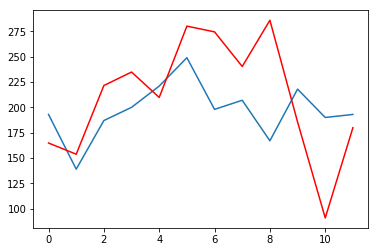

------Data extracted-----
------Data normalized-----
Community-64, Month-1, Year-2015: actual-78; preds-71.3707275560608
RMSE error: 6.6292724439392
------Data extracted-----
------Data normalized-----
Community-64, Month-2, Year-2015: actual-52; preds-53.327582354869655
RMSE error: 1.327582354869655
------Data extracted-----
------Data normalized-----
Community-64, Month-3, Year-2015: actual-71; preds-102.22419517529607
RMSE error: 31.224195175296074
------Data extracted-----
------Data normalized-----
Community-64, Month-4, Year-2015: actual-70; preds-89.80452542986987
RMSE error: 19.80452542986987
------Data extracted-----
------Data normalized-----
Community-64, Month-5, Year-2015: actual-80; preds-114.03320040266425
RMSE error: 34.03320040266425
------Data extracted-----
------Data normalized-----
Community-64, Month-6, Year-2015: actual-81; preds-100.5139589254722
RMSE error: 19.513958925472195
------Data extracted-----
------Data normalized-----
Community-64, Month-7, Year-2015:

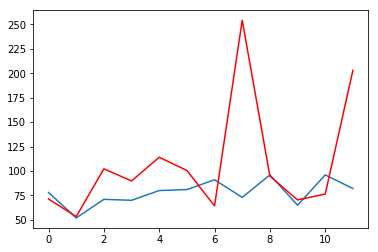

------Data extracted-----
------Data normalized-----
Community-65, Month-1, Year-2015: actual-145; preds-215.88021820083355
RMSE error: 70.88021820083355
------Data extracted-----
------Data normalized-----
Community-65, Month-2, Year-2015: actual-139; preds-163.24068636661173
RMSE error: 24.240686366611726
------Data extracted-----
------Data normalized-----
Community-65, Month-3, Year-2015: actual-186; preds-172.60452589178342
RMSE error: 13.395474108216575
------Data extracted-----
------Data normalized-----
Community-65, Month-4, Year-2015: actual-154; preds-195.71084842192113
RMSE error: 41.71084842192113
------Data extracted-----
------Data normalized-----
Community-65, Month-5, Year-2015: actual-201; preds-213.14873513542926
RMSE error: 12.148735135429263
------Data extracted-----
------Data normalized-----
Community-65, Month-6, Year-2015: actual-192; preds-204.4679175769365
RMSE error: 12.467917576936486
------Data extracted-----
------Data normalized-----
Community-65, Month-

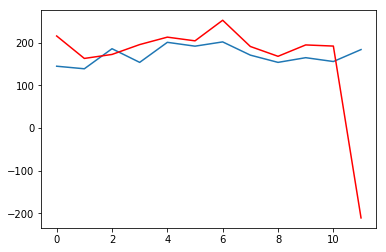

------Data extracted-----
------Data normalized-----
Community-66, Month-1, Year-2015: actual-494; preds-396.7751296036272
RMSE error: 97.22487039637281
------Data extracted-----
------Data normalized-----
Community-66, Month-2, Year-2015: actual-394; preds-456.9356463637453
RMSE error: 62.93564636374532
------Data extracted-----
------Data normalized-----
Community-66, Month-3, Year-2015: actual-496; preds-708.1777836855761
RMSE error: 212.17778368557606
------Data extracted-----
------Data normalized-----
Community-66, Month-4, Year-2015: actual-542; preds-664.605962300549
RMSE error: 122.60596230054898
------Data extracted-----
------Data normalized-----
Community-66, Month-5, Year-2015: actual-615; preds-757.6460449104832
RMSE error: 142.64604491048317
------Data extracted-----
------Data normalized-----
Community-66, Month-6, Year-2015: actual-603; preds-786.1864492483561
RMSE error: 183.1864492483561
------Data extracted-----
------Data normalized-----
Community-66, Month-7, Year

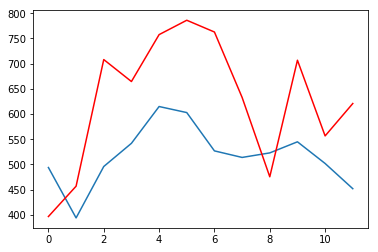

------Data extracted-----
------Data normalized-----
Community-67, Month-1, Year-2015: actual-527; preds-682.5574627394385
RMSE error: 155.5574627394385
------Data extracted-----
------Data normalized-----
Community-67, Month-2, Year-2015: actual-417; preds-598.0393750928744
RMSE error: 181.03937509287437
------Data extracted-----
------Data normalized-----
Community-67, Month-3, Year-2015: actual-622; preds-688.064160902327
RMSE error: 66.06416090232699
------Data extracted-----
------Data normalized-----
Community-67, Month-4, Year-2015: actual-689; preds-763.9701830895169
RMSE error: 74.97018308951692
------Data extracted-----
------Data normalized-----
Community-67, Month-5, Year-2015: actual-796; preds-784.1681478100467
RMSE error: 11.831852189953338
------Data extracted-----
------Data normalized-----
Community-67, Month-6, Year-2015: actual-663; preds-870.8024218208211
RMSE error: 207.8024218208211
------Data extracted-----
------Data normalized-----
Community-67, Month-7, Year-

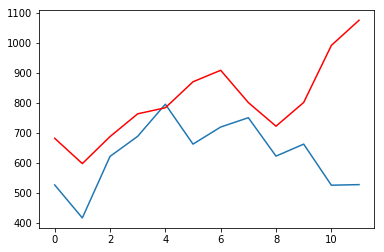

------Data extracted-----
------Data normalized-----
Community-68, Month-1, Year-2015: actual-545; preds-632.3783930057741
RMSE error: 87.37839300577411
------Data extracted-----
------Data normalized-----
Community-68, Month-2, Year-2015: actual-398; preds-502.8828484811921
RMSE error: 104.88284848119213
------Data extracted-----
------Data normalized-----
Community-68, Month-3, Year-2015: actual-565; preds-740.792532662594
RMSE error: 175.792532662594
------Data extracted-----
------Data normalized-----
Community-68, Month-4, Year-2015: actual-703; preds-1116.759373024221
RMSE error: 413.7593730242211
------Data extracted-----
------Data normalized-----
Community-68, Month-5, Year-2015: actual-787; preds-767.2331258598263
RMSE error: 19.76687414017374
------Data extracted-----
------Data normalized-----
Community-68, Month-6, Year-2015: actual-647; preds-742.672434957326
RMSE error: 95.672434957326
------Data extracted-----
------Data normalized-----
Community-68, Month-7, Year-2015:

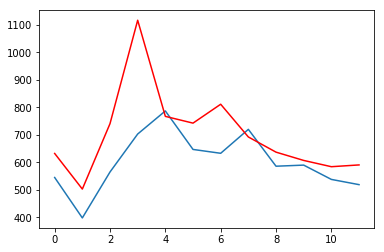

------Data extracted-----
------Data normalized-----
Community-69, Month-1, Year-2015: actual-478; preds-615.7657650871757
RMSE error: 137.76576508717574
------Data extracted-----
------Data normalized-----
Community-69, Month-2, Year-2015: actual-359; preds-641.8438739316271
RMSE error: 282.84387393162706
------Data extracted-----
------Data normalized-----
Community-69, Month-3, Year-2015: actual-592; preds-727.7474396674313
RMSE error: 135.7474396674313
------Data extracted-----
------Data normalized-----
Community-69, Month-4, Year-2015: actual-583; preds-641.9560260827354
RMSE error: 58.956026082735434
------Data extracted-----
------Data normalized-----
Community-69, Month-5, Year-2015: actual-617; preds-668.1170914030938
RMSE error: 51.11709140309381
------Data extracted-----
------Data normalized-----
Community-69, Month-6, Year-2015: actual-617; preds-723.8447008425713
RMSE error: 106.84470084257134
------Data extracted-----
------Data normalized-----
Community-69, Month-7, Ye

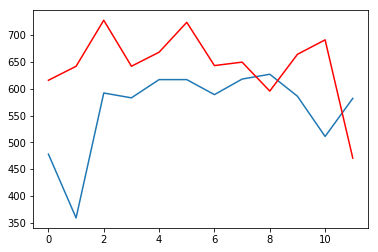

------Data extracted-----
------Data normalized-----
Community-70, Month-1, Year-2015: actual-207; preds-82.34061773806721
RMSE error: 124.65938226193279
------Data extracted-----
------Data normalized-----
Community-70, Month-2, Year-2015: actual-143; preds-234.81377089766048
RMSE error: 91.81377089766048
------Data extracted-----
------Data normalized-----
Community-70, Month-3, Year-2015: actual-170; preds-177.98272339831018
RMSE error: 7.982723398310185
------Data extracted-----
------Data normalized-----
Community-70, Month-4, Year-2015: actual-182; preds-222.29042426080065
RMSE error: 40.29042426080065
------Data extracted-----
------Data normalized-----
Community-70, Month-5, Year-2015: actual-183; preds-421.6874104185483
RMSE error: 238.68741041854832
------Data extracted-----
------Data normalized-----
Community-70, Month-6, Year-2015: actual-224; preds-198.1866282504164
RMSE error: 25.81337174958361
------Data extracted-----
------Data normalized-----
Community-70, Month-7, Y

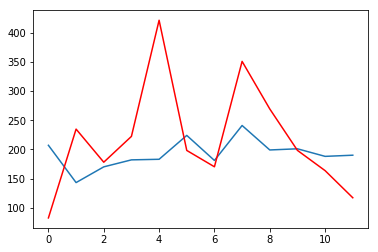

------Data extracted-----
------Data normalized-----
Community-71, Month-1, Year-2015: actual-621; preds-669.4022419689425
RMSE error: 48.40224196894246
------Data extracted-----
------Data normalized-----
Community-71, Month-2, Year-2015: actual-511; preds-639.5620712678974
RMSE error: 128.5620712678974
------Data extracted-----
------Data normalized-----
Community-71, Month-3, Year-2015: actual-633; preds-573.5991572287355
RMSE error: 59.40084277126448
------Data extracted-----
------Data normalized-----
Community-71, Month-4, Year-2015: actual-651; preds-690.2470416385577
RMSE error: 39.247041638557675
------Data extracted-----
------Data normalized-----
Community-71, Month-5, Year-2015: actual-675; preds-755.5165879952682
RMSE error: 80.5165879952682
------Data extracted-----
------Data normalized-----
Community-71, Month-6, Year-2015: actual-669; preds-747.0820071278177
RMSE error: 78.08200712781775
------Data extracted-----
------Data normalized-----
Community-71, Month-7, Year-2

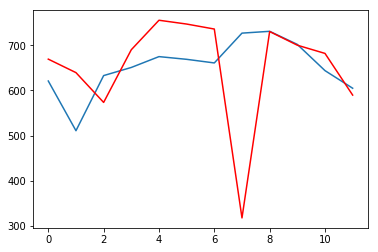

------Data extracted-----
------Data normalized-----
Community-72, Month-1, Year-2015: actual-61; preds-68.40188575946038
RMSE error: 7.401885759460384
------Data extracted-----
------Data normalized-----
Community-72, Month-2, Year-2015: actual-61; preds-63.274706713728435
RMSE error: 2.2747067137284347
------Data extracted-----
------Data normalized-----
Community-72, Month-3, Year-2015: actual-88; preds-100.30524690997044
RMSE error: 12.305246909970435
------Data extracted-----
------Data normalized-----
Community-72, Month-4, Year-2015: actual-89; preds-78.37501457729662
RMSE error: 10.624985422703375
------Data extracted-----
------Data normalized-----
Community-72, Month-5, Year-2015: actual-133; preds-91.92281912444314
RMSE error: 41.07718087555686
------Data extracted-----
------Data normalized-----
Community-72, Month-6, Year-2015: actual-115; preds-174.57556072514427
RMSE error: 59.57556072514427
------Data extracted-----
------Data normalized-----
Community-72, Month-7, Year

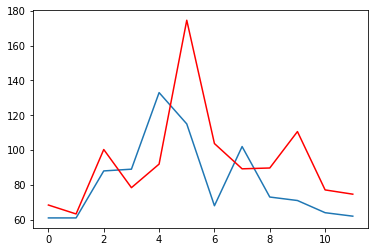

------Data extracted-----
------Data normalized-----
Community-73, Month-1, Year-2015: actual-217; preds-249.61138067998036
RMSE error: 32.61138067998036
------Data extracted-----
------Data normalized-----
Community-73, Month-2, Year-2015: actual-210; preds-239.00723273891867
RMSE error: 29.007232738918674
------Data extracted-----
------Data normalized-----
Community-73, Month-3, Year-2015: actual-270; preds-361.8076955308472
RMSE error: 91.80769553084718
------Data extracted-----
------Data normalized-----
Community-73, Month-4, Year-2015: actual-260; preds-310.3216236754378
RMSE error: 50.32162367543782
------Data extracted-----
------Data normalized-----
Community-73, Month-5, Year-2015: actual-312; preds-331.0086886429749
RMSE error: 19.008688642974903
------Data extracted-----
------Data normalized-----
Community-73, Month-6, Year-2015: actual-291; preds-357.70778572168285
RMSE error: 66.70778572168285
------Data extracted-----
------Data normalized-----
Community-73, Month-7, Y

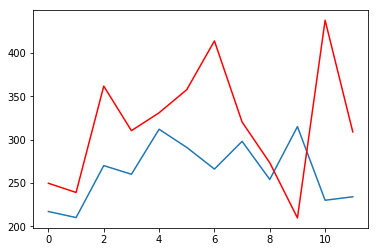

------Data extracted-----
------Data normalized-----
Community-74, Month-1, Year-2015: actual-33; preds-50.1123771378658
RMSE error: 17.1123771378658
------Data extracted-----
------Data normalized-----
Community-74, Month-2, Year-2015: actual-41; preds-44.914791030911395
RMSE error: 3.9147910309113954
------Data extracted-----
------Data normalized-----
Community-74, Month-3, Year-2015: actual-59; preds-47.84746000987073
RMSE error: 11.15253999012927
------Data extracted-----
------Data normalized-----
Community-74, Month-4, Year-2015: actual-52; preds-60.736554967241474
RMSE error: 8.736554967241474
------Data extracted-----
------Data normalized-----
Community-74, Month-5, Year-2015: actual-65; preds-87.49213980627879
RMSE error: 22.492139806278786
------Data extracted-----
------Data normalized-----
Community-74, Month-6, Year-2015: actual-38; preds-58.809489995618506
RMSE error: 20.809489995618506
------Data extracted-----
------Data normalized-----
Community-74, Month-7, Year-201

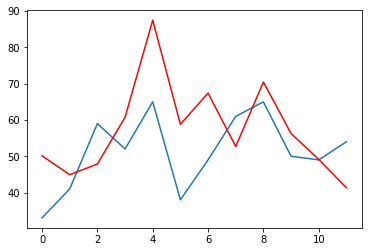

------Data extracted-----
------Data normalized-----
Community-75, Month-1, Year-2015: actual-165; preds-152.0909364056353
RMSE error: 12.90906359436471
------Data extracted-----
------Data normalized-----
Community-75, Month-2, Year-2015: actual-116; preds-174.53828609722692
RMSE error: 58.538286097226916
------Data extracted-----
------Data normalized-----
Community-75, Month-3, Year-2015: actual-162; preds-156.05951412592987
RMSE error: 5.940485874070134
------Data extracted-----
------Data normalized-----
Community-75, Month-4, Year-2015: actual-171; preds-175.1701700858706
RMSE error: 4.170170085870609
------Data extracted-----
------Data normalized-----
Community-75, Month-5, Year-2015: actual-194; preds-223.7037300852823
RMSE error: 29.703730085282302
------Data extracted-----
------Data normalized-----
Community-75, Month-6, Year-2015: actual-192; preds-272.7455408114553
RMSE error: 80.74554081145533
------Data extracted-----
------Data normalized-----
Community-75, Month-7, Ye

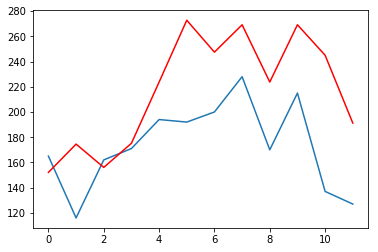

------Data extracted-----
------Data normalized-----
Community-76, Month-1, Year-2015: actual-150; preds-178.052811212086
RMSE error: 28.052811212086
------Data extracted-----
------Data normalized-----
Community-76, Month-2, Year-2015: actual-137; preds-117.90165481574445
RMSE error: 19.09834518425555
------Data extracted-----
------Data normalized-----
Community-76, Month-3, Year-2015: actual-147; preds-149.89359123028768
RMSE error: 2.893591230287683
------Data extracted-----
------Data normalized-----
Community-76, Month-4, Year-2015: actual-141; preds-156.05290212464934
RMSE error: 15.052902124649336
------Data extracted-----
------Data normalized-----
Community-76, Month-5, Year-2015: actual-151; preds-163.316438165703
RMSE error: 12.316438165703005
------Data extracted-----
------Data normalized-----
Community-76, Month-6, Year-2015: actual-161; preds-156.21003413511255
RMSE error: 4.789965864887449
------Data extracted-----
------Data normalized-----
Community-76, Month-7, Year

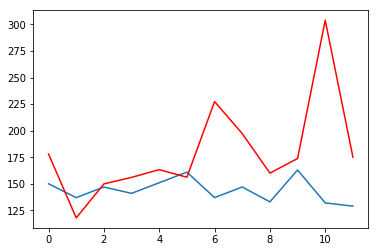

------Data extracted-----
------Data normalized-----
Community-77, Month-1, Year-2015: actual-153; preds-246.50226576677034
RMSE error: 93.50226576677034
------Data extracted-----
------Data normalized-----
Community-77, Month-2, Year-2015: actual-139; preds-188.43188545900722
RMSE error: 49.43188545900722
------Data extracted-----
------Data normalized-----
Community-77, Month-3, Year-2015: actual-191; preds-155.7888180449102
RMSE error: 35.21118195508981
------Data extracted-----
------Data normalized-----
Community-77, Month-4, Year-2015: actual-183; preds-290.59396671708384
RMSE error: 107.59396671708384
------Data extracted-----
------Data normalized-----
Community-77, Month-5, Year-2015: actual-198; preds-261.13570105741474
RMSE error: 63.135701057414735
------Data extracted-----
------Data normalized-----
Community-77, Month-6, Year-2015: actual-163; preds-250.04885317523417
RMSE error: 87.04885317523417
------Data extracted-----
------Data normalized-----
Community-77, Month-7,

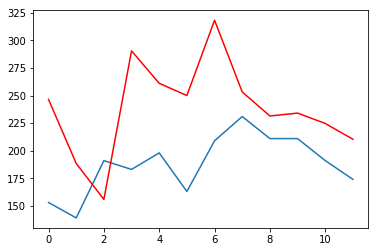

In [56]:
tot_tr = []
tot_pred = []

for c in tqdm_notebook(range(1,78), leave=False):
    
    c_tr = []
    c_pd = []
    for month in tqdm_notebook(range(1,13)):
        
        X_train = X_tot[month-1][c-1]
        y_train = y_tot[month-1][c-1]
        
        X_test = get_features(c, 2015, month, top, sim_method)
        y_test = get_ys(c, 2015, month)
        
        X_test = np.array(X_test)
        y_test = np.array(y_test, ndmin=1)
        
        print('------Data extracted-----')
        
        sc = MinMaxScaler(feature_range=(0, 1))
        X_train_norm = sc.fit_transform(X_train)
        X_test_norm = sc.transform(X_test.reshape(1, -1))
        
        print('------Data normalized-----')
        
        
        #Polynomial regression with degree 2
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train_norm)
        X_test_poly = poly.transform(X_test_norm)
        
        
        clf = LinearRegression ()
        clf.fit(X_train_poly, y_train)
        
        preds = clf.predict(X_test_poly.reshape(1, -1))
        
        print('Community-{}, Month-{}, Year-{}: actual-{}; preds-{}'.format(c, month, 2015, y_test[0], preds[0]))
        print('RMSE error: {}'.format(mean_squared_error(y_test, preds) ** .5))
        
        c_tr.append(y_test[0])
        c_pd.append(preds[0])
        
    plt.plot(c_tr)
    plt.plot(c_pd, color='red')
    plt.show()
    
    tot_tr = tot_tr + c_tr
    tot_pred = tot_pred + c_pd

In [57]:
rmse_1 = mean_squared_error(tot_tr, tot_pred) ** .5
rmse_1

432.73124269823427

## SVR

In [ ]:
top = 2
sim_method = 'jacc'

tot_tr_1 = []
tot_pred_1 = []

for c in tqdm_notebook(range(1,78), leave=False):
    
    c_tr = []
    c_pd = []
    for month in tqdm_notebook(range(1,13)):
        
        X_train = X_tot[month-1][c-1]
        y_train = y_tot[month-1][c-1]
        
        X_test = get_features(c, 2015, month, top, sim_method)
        y_test = get_ys(c, 2015, month)
        
        X_test = np.array(X_test)
        y_test = np.array(y_test, ndmin=1)
        
        print('------Data extracted-----')
        
        sc = MinMaxScaler(feature_range=(0, 1))
        X_train_norm = sc.fit_transform(X_train)
        X_test_norm = sc.transform(X_test.reshape(1, -1))
        
        print('------Data normalized-----')
        
        
        clf = SVR()
        clf.fit(X_train_norm, y_train)
        
        preds = clf.predict(X_test_norm.reshape(1, -1))
        
        print('Community-{}, Month-{}, Year-{}: actual-{}; preds-{}'.format(c, month, 2015, y_test[0], preds[0]))
        print('RMSE error: {}'.format(mean_squared_error(y_test, preds) ** .5))
        
        c_tr.append(y_test[0])
        c_pd.append(preds[0])
        
    plt.plot(c_tr)
    plt.plot(c_pd, color='red')
    plt.show()
    
    tot_tr_1 = tot_tr_1 + c_tr
    tot_pred_1 = tot_pred_1 + c_pd

In [59]:
rmse_2 = mean_squared_error(tot_tr_1, tot_pred_1) ** .5
rmse_2

80.70302551474397

## Random Forest

In [60]:
#using January data to hyper-parameter tune our regressor

n_estimators = [5, 10, 50, 100, 200, 250]
max_depth = [2, 3, 4, 5, 6, 7, 8]

results = {}

for n in tqdm_notebook(n_estimators):
    
    results[n] = {}
    for d in tqdm_notebook(max_depth, leave=False):
        
        tru = []
        pde = []
        for c in range(1,78):
    
            X_train = X_tot[0][c-1]
            y_train = y_tot[0][c-1]

            X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

            sc = MinMaxScaler(feature_range=(0, 1))
            X_train_norm = sc.fit_transform(X_train)
            X_cv_norm = sc.transform(X_cv.reshape(1, -1))

            clf = RandomForestRegressor(n_estimators=n, max_depth=d)
            clf.fit(X_train_norm, y_train)

            preds = clf.predict(X_cv_norm)

            tru.extend(y_cv)
            pde.extend(preds)
        
        err = mean_squared_error(tru, pde) ** .5
        
        results[n][d] = err

In [61]:
error = 100000
for key in results:
    for key1 in results[key]:
        if results[key][key1] < error:
            best_n = key
            best_d = key1
            error = results[key][key1]

In [62]:
print('Best est: {}, Best depth: {}'.format(best_n, best_d))

Best est: 5, Best depth: 5


------Data extracted-----
------Data normalized-----
Community-1, Month-1, Year-2015: actual-292; preds-318.8
RMSE error: 26.80000000000001
------Data extracted-----
------Data normalized-----
Community-1, Month-2, Year-2015: actual-244; preds-252.6
RMSE error: 8.599999999999994
------Data extracted-----
------Data normalized-----
Community-1, Month-3, Year-2015: actual-291; preds-364.6
RMSE error: 73.60000000000002
------Data extracted-----
------Data normalized-----
Community-1, Month-4, Year-2015: actual-237; preds-397.6
RMSE error: 160.60000000000002
------Data extracted-----
------Data normalized-----
Community-1, Month-5, Year-2015: actual-331; preds-442.2
RMSE error: 111.19999999999999
------Data extracted-----
------Data normalized-----
Community-1, Month-6, Year-2015: actual-298; preds-410.2
RMSE error: 112.19999999999999
------Data extracted-----
------Data normalized-----
Community-1, Month-7, Year-2015: actual-361; preds-457.8
RMSE error: 96.80000000000001
------Data extrac

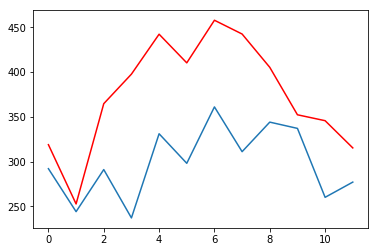

------Data extracted-----
------Data normalized-----
Community-2, Month-1, Year-2015: actual-248; preds-319.6
RMSE error: 71.60000000000002
------Data extracted-----
------Data normalized-----
Community-2, Month-2, Year-2015: actual-220; preds-258.2
RMSE error: 38.19999999999999
------Data extracted-----
------Data normalized-----
Community-2, Month-3, Year-2015: actual-239; preds-277.0
RMSE error: 38.0
------Data extracted-----
------Data normalized-----
Community-2, Month-4, Year-2015: actual-240; preds-270.8
RMSE error: 30.80000000000001
------Data extracted-----
------Data normalized-----
Community-2, Month-5, Year-2015: actual-280; preds-356.8
RMSE error: 76.80000000000001
------Data extracted-----
------Data normalized-----
Community-2, Month-6, Year-2015: actual-260; preds-335.0
RMSE error: 75.0
------Data extracted-----
------Data normalized-----
Community-2, Month-7, Year-2015: actual-260; preds-364.6
RMSE error: 104.60000000000002
------Data extracted-----
------Data normaliz

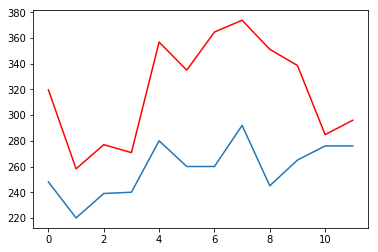

------Data extracted-----
------Data normalized-----
Community-3, Month-1, Year-2015: actual-242; preds-367.4
RMSE error: 125.39999999999998
------Data extracted-----
------Data normalized-----
Community-3, Month-2, Year-2015: actual-208; preds-281.2
RMSE error: 73.19999999999999
------Data extracted-----
------Data normalized-----
Community-3, Month-3, Year-2015: actual-275; preds-356.0
RMSE error: 81.0
------Data extracted-----
------Data normalized-----
Community-3, Month-4, Year-2015: actual-311; preds-337.2
RMSE error: 26.19999999999999
------Data extracted-----
------Data normalized-----
Community-3, Month-5, Year-2015: actual-315; preds-338.2
RMSE error: 23.19999999999999
------Data extracted-----
------Data normalized-----
Community-3, Month-6, Year-2015: actual-316; preds-446.0
RMSE error: 130.0
------Data extracted-----
------Data normalized-----
Community-3, Month-7, Year-2015: actual-338; preds-538.2
RMSE error: 200.20000000000005
------Data extracted-----
------Data normal

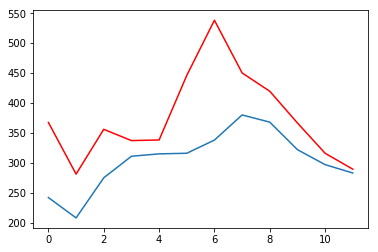

------Data extracted-----
------Data normalized-----
Community-4, Month-1, Year-2015: actual-156; preds-164.4
RMSE error: 8.400000000000006
------Data extracted-----
------Data normalized-----
Community-4, Month-2, Year-2015: actual-110; preds-163.2
RMSE error: 53.19999999999999
------Data extracted-----
------Data normalized-----
Community-4, Month-3, Year-2015: actual-134; preds-183.6
RMSE error: 49.599999999999994
------Data extracted-----
------Data normalized-----
Community-4, Month-4, Year-2015: actual-134; preds-177.8
RMSE error: 43.80000000000001
------Data extracted-----
------Data normalized-----
Community-4, Month-5, Year-2015: actual-158; preds-182.2
RMSE error: 24.19999999999999
------Data extracted-----
------Data normalized-----
Community-4, Month-6, Year-2015: actual-180; preds-202.2
RMSE error: 22.19999999999999
------Data extracted-----
------Data normalized-----
Community-4, Month-7, Year-2015: actual-149; preds-153.2
RMSE error: 4.199999999999989
------Data extracte

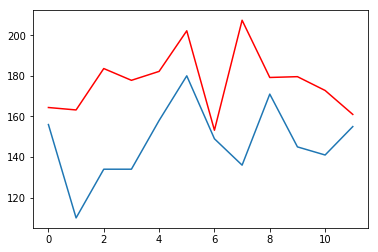

------Data extracted-----
------Data normalized-----
Community-5, Month-1, Year-2015: actual-112; preds-128.6
RMSE error: 16.599999999999994
------Data extracted-----
------Data normalized-----
Community-5, Month-2, Year-2015: actual-93; preds-119.6
RMSE error: 26.599999999999994
------Data extracted-----
------Data normalized-----
Community-5, Month-3, Year-2015: actual-105; preds-139.8
RMSE error: 34.80000000000001
------Data extracted-----
------Data normalized-----
Community-5, Month-4, Year-2015: actual-120; preds-142.0
RMSE error: 22.0
------Data extracted-----
------Data normalized-----
Community-5, Month-5, Year-2015: actual-107; preds-138.4
RMSE error: 31.400000000000006
------Data extracted-----
------Data normalized-----
Community-5, Month-6, Year-2015: actual-138; preds-152.2
RMSE error: 14.199999999999989
------Data extracted-----
------Data normalized-----
Community-5, Month-7, Year-2015: actual-126; preds-151.2
RMSE error: 25.19999999999999
------Data extracted-----
----

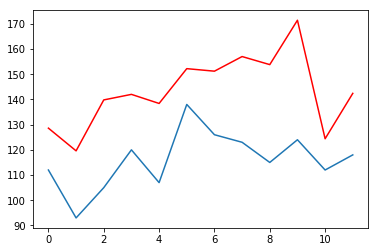

------Data extracted-----
------Data normalized-----
Community-6, Month-1, Year-2015: actual-378; preds-392.4
RMSE error: 14.399999999999977
------Data extracted-----
------Data normalized-----
Community-6, Month-2, Year-2015: actual-279; preds-416.2
RMSE error: 137.2
------Data extracted-----
------Data normalized-----
Community-6, Month-3, Year-2015: actual-398; preds-466.6
RMSE error: 68.60000000000002
------Data extracted-----
------Data normalized-----
Community-6, Month-4, Year-2015: actual-397; preds-516.0
RMSE error: 119.0
------Data extracted-----
------Data normalized-----
Community-6, Month-5, Year-2015: actual-455; preds-534.6
RMSE error: 79.60000000000002
------Data extracted-----
------Data normalized-----
Community-6, Month-6, Year-2015: actual-575; preds-747.4
RMSE error: 172.39999999999998
------Data extracted-----
------Data normalized-----
Community-6, Month-7, Year-2015: actual-505; preds-691.6
RMSE error: 186.60000000000002
------Data extracted-----
------Data norm

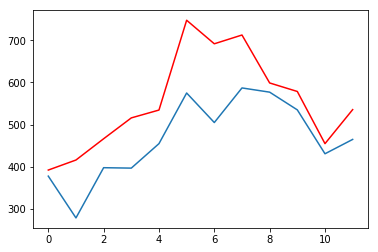

------Data extracted-----
------Data normalized-----
Community-7, Month-1, Year-2015: actual-255; preds-374.8
RMSE error: 119.80000000000001
------Data extracted-----
------Data normalized-----
Community-7, Month-2, Year-2015: actual-225; preds-282.2
RMSE error: 57.19999999999999
------Data extracted-----
------Data normalized-----
Community-7, Month-3, Year-2015: actual-304; preds-305.8
RMSE error: 1.8000000000000114
------Data extracted-----
------Data normalized-----
Community-7, Month-4, Year-2015: actual-296; preds-332.8
RMSE error: 36.80000000000001
------Data extracted-----
------Data normalized-----
Community-7, Month-5, Year-2015: actual-347; preds-435.4
RMSE error: 88.39999999999998
------Data extracted-----
------Data normalized-----
Community-7, Month-6, Year-2015: actual-310; preds-469.0
RMSE error: 159.0
------Data extracted-----
------Data normalized-----
Community-7, Month-7, Year-2015: actual-359; preds-505.0
RMSE error: 146.0
------Data extracted-----
------Data norma

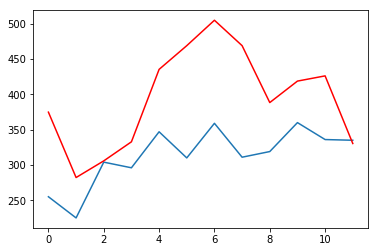

------Data extracted-----
------Data normalized-----
Community-8, Month-1, Year-2015: actual-685; preds-778.2
RMSE error: 93.20000000000005
------Data extracted-----
------Data normalized-----
Community-8, Month-2, Year-2015: actual-534; preds-691.2
RMSE error: 157.20000000000005
------Data extracted-----
------Data normalized-----
Community-8, Month-3, Year-2015: actual-666; preds-887.8
RMSE error: 221.79999999999995
------Data extracted-----
------Data normalized-----
Community-8, Month-4, Year-2015: actual-696; preds-770.0
RMSE error: 74.0
------Data extracted-----
------Data normalized-----
Community-8, Month-5, Year-2015: actual-790; preds-865.2
RMSE error: 75.20000000000005
------Data extracted-----
------Data normalized-----
Community-8, Month-6, Year-2015: actual-766; preds-1044.2
RMSE error: 278.20000000000005
------Data extracted-----
------Data normalized-----
Community-8, Month-7, Year-2015: actual-893; preds-1002.4
RMSE error: 109.39999999999998
------Data extracted-----
-

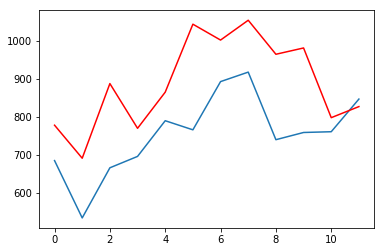

------Data extracted-----
------Data normalized-----
Community-9, Month-1, Year-2015: actual-19; preds-25.8
RMSE error: 6.800000000000001
------Data extracted-----
------Data normalized-----
Community-9, Month-2, Year-2015: actual-14; preds-30.8
RMSE error: 16.8
------Data extracted-----
------Data normalized-----
Community-9, Month-3, Year-2015: actual-33; preds-26.4
RMSE error: 6.600000000000001
------Data extracted-----
------Data normalized-----
Community-9, Month-4, Year-2015: actual-16; preds-23.6
RMSE error: 7.600000000000001
------Data extracted-----
------Data normalized-----
Community-9, Month-5, Year-2015: actual-19; preds-24.6
RMSE error: 5.600000000000001
------Data extracted-----
------Data normalized-----
Community-9, Month-6, Year-2015: actual-26; preds-25.8
RMSE error: 0.1999999999999993
------Data extracted-----
------Data normalized-----
Community-9, Month-7, Year-2015: actual-18; preds-25.0
RMSE error: 7.0
------Data extracted-----
------Data normalized-----
Communi

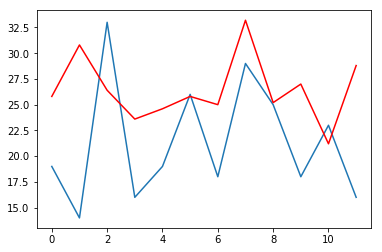

------Data extracted-----
------Data normalized-----
Community-10, Month-1, Year-2015: actual-105; preds-87.4
RMSE error: 17.599999999999994
------Data extracted-----
------Data normalized-----
Community-10, Month-2, Year-2015: actual-76; preds-85.4
RMSE error: 9.400000000000006
------Data extracted-----
------Data normalized-----
Community-10, Month-3, Year-2015: actual-106; preds-124.8
RMSE error: 18.799999999999997
------Data extracted-----
------Data normalized-----
Community-10, Month-4, Year-2015: actual-114; preds-123.4
RMSE error: 9.400000000000006
------Data extracted-----
------Data normalized-----
Community-10, Month-5, Year-2015: actual-111; preds-119.6
RMSE error: 8.599999999999994
------Data extracted-----
------Data normalized-----
Community-10, Month-6, Year-2015: actual-101; preds-122.8
RMSE error: 21.799999999999997
------Data extracted-----
------Data normalized-----
Community-10, Month-7, Year-2015: actual-139; preds-120.8
RMSE error: 18.200000000000003
------Data e

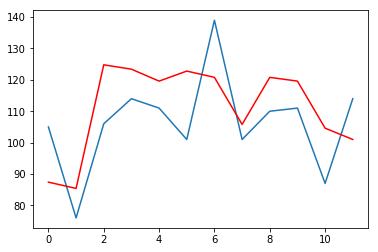

------Data extracted-----
------Data normalized-----
Community-11, Month-1, Year-2015: actual-91; preds-108.0
RMSE error: 17.0
------Data extracted-----
------Data normalized-----
Community-11, Month-2, Year-2015: actual-88; preds-86.2
RMSE error: 1.7999999999999972
------Data extracted-----
------Data normalized-----
Community-11, Month-3, Year-2015: actual-87; preds-96.0
RMSE error: 9.0
------Data extracted-----
------Data normalized-----
Community-11, Month-4, Year-2015: actual-86; preds-109.2
RMSE error: 23.200000000000003
------Data extracted-----
------Data normalized-----
Community-11, Month-5, Year-2015: actual-103; preds-109.8
RMSE error: 6.799999999999997
------Data extracted-----
------Data normalized-----
Community-11, Month-6, Year-2015: actual-93; preds-112.2
RMSE error: 19.200000000000003
------Data extracted-----
------Data normalized-----
Community-11, Month-7, Year-2015: actual-112; preds-118.6
RMSE error: 6.599999999999994
------Data extracted-----
------Data normali

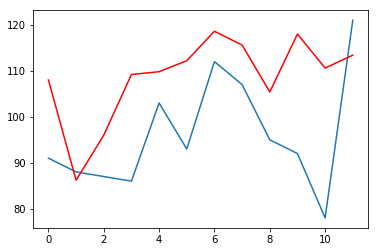

------Data extracted-----
------Data normalized-----
Community-12, Month-1, Year-2015: actual-36; preds-44.4
RMSE error: 8.399999999999999
------Data extracted-----
------Data normalized-----
Community-12, Month-2, Year-2015: actual-28; preds-37.2
RMSE error: 9.200000000000003
------Data extracted-----
------Data normalized-----
Community-12, Month-3, Year-2015: actual-30; preds-45.6
RMSE error: 15.600000000000001
------Data extracted-----
------Data normalized-----
Community-12, Month-4, Year-2015: actual-42; preds-36.4
RMSE error: 5.600000000000001
------Data extracted-----
------Data normalized-----
Community-12, Month-5, Year-2015: actual-35; preds-49.8
RMSE error: 14.799999999999997
------Data extracted-----
------Data normalized-----
Community-12, Month-6, Year-2015: actual-41; preds-38.6
RMSE error: 2.3999999999999986
------Data extracted-----
------Data normalized-----
Community-12, Month-7, Year-2015: actual-41; preds-48.0
RMSE error: 7.0
------Data extracted-----
------Data n

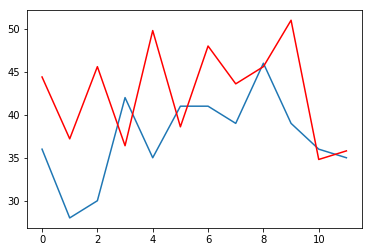

------Data extracted-----
------Data normalized-----
Community-13, Month-1, Year-2015: actual-76; preds-77.4
RMSE error: 1.4000000000000057
------Data extracted-----
------Data normalized-----
Community-13, Month-2, Year-2015: actual-61; preds-64.6
RMSE error: 3.5999999999999943
------Data extracted-----
------Data normalized-----
Community-13, Month-3, Year-2015: actual-59; preds-87.4
RMSE error: 28.400000000000006
------Data extracted-----
------Data normalized-----
Community-13, Month-4, Year-2015: actual-71; preds-72.6
RMSE error: 1.5999999999999943
------Data extracted-----
------Data normalized-----
Community-13, Month-5, Year-2015: actual-79; preds-82.2
RMSE error: 3.200000000000003
------Data extracted-----
------Data normalized-----
Community-13, Month-6, Year-2015: actual-52; preds-78.4
RMSE error: 26.400000000000006
------Data extracted-----
------Data normalized-----
Community-13, Month-7, Year-2015: actual-60; preds-87.2
RMSE error: 27.200000000000003
------Data extracted-

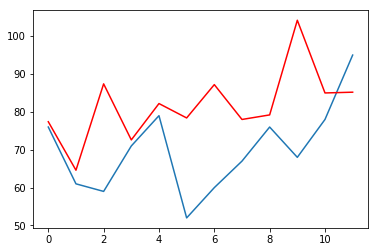

------Data extracted-----
------Data normalized-----
Community-14, Month-1, Year-2015: actual-183; preds-210.0
RMSE error: 27.0
------Data extracted-----
------Data normalized-----
Community-14, Month-2, Year-2015: actual-189; preds-205.2
RMSE error: 16.19999999999999
------Data extracted-----
------Data normalized-----
Community-14, Month-3, Year-2015: actual-221; preds-231.6
RMSE error: 10.599999999999994
------Data extracted-----
------Data normalized-----
Community-14, Month-4, Year-2015: actual-193; preds-227.2
RMSE error: 34.19999999999999
------Data extracted-----
------Data normalized-----
Community-14, Month-5, Year-2015: actual-260; preds-250.0
RMSE error: 10.0
------Data extracted-----
------Data normalized-----
Community-14, Month-6, Year-2015: actual-226; preds-210.0
RMSE error: 16.0
------Data extracted-----
------Data normalized-----
Community-14, Month-7, Year-2015: actual-197; preds-232.0
RMSE error: 35.0
------Data extracted-----
------Data normalized-----
Community-1

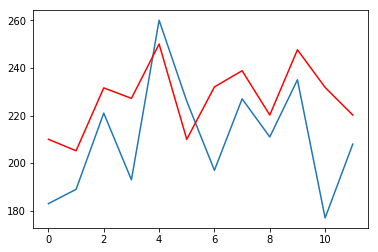

------Data extracted-----
------Data normalized-----
Community-15, Month-1, Year-2015: actual-313; preds-312.4
RMSE error: 0.6000000000000227
------Data extracted-----
------Data normalized-----
Community-15, Month-2, Year-2015: actual-234; preds-262.2
RMSE error: 28.19999999999999
------Data extracted-----
------Data normalized-----
Community-15, Month-3, Year-2015: actual-285; preds-326.8
RMSE error: 41.80000000000001
------Data extracted-----
------Data normalized-----
Community-15, Month-4, Year-2015: actual-275; preds-262.2
RMSE error: 12.800000000000011
------Data extracted-----
------Data normalized-----
Community-15, Month-5, Year-2015: actual-315; preds-303.6
RMSE error: 11.399999999999977
------Data extracted-----
------Data normalized-----
Community-15, Month-6, Year-2015: actual-284; preds-355.4
RMSE error: 71.39999999999998
------Data extracted-----
------Data normalized-----
Community-15, Month-7, Year-2015: actual-297; preds-384.6
RMSE error: 87.60000000000002
------Data

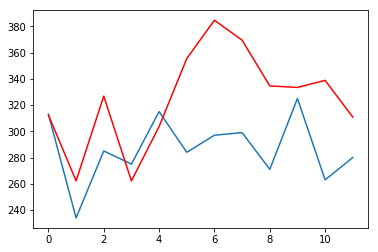

------Data extracted-----
------Data normalized-----
Community-16, Month-1, Year-2015: actual-245; preds-272.8
RMSE error: 27.80000000000001
------Data extracted-----
------Data normalized-----
Community-16, Month-2, Year-2015: actual-233; preds-239.4
RMSE error: 6.400000000000006
------Data extracted-----
------Data normalized-----
Community-16, Month-3, Year-2015: actual-261; preds-338.2
RMSE error: 77.19999999999999
------Data extracted-----
------Data normalized-----
Community-16, Month-4, Year-2015: actual-218; preds-265.6
RMSE error: 47.60000000000002
------Data extracted-----
------Data normalized-----
Community-16, Month-5, Year-2015: actual-255; preds-341.6
RMSE error: 86.60000000000002
------Data extracted-----
------Data normalized-----
Community-16, Month-6, Year-2015: actual-251; preds-293.6
RMSE error: 42.60000000000002
------Data extracted-----
------Data normalized-----
Community-16, Month-7, Year-2015: actual-256; preds-314.8
RMSE error: 58.80000000000001
------Data ex

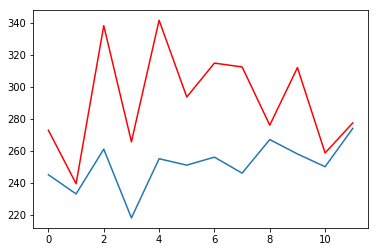

------Data extracted-----
------Data normalized-----
Community-17, Month-1, Year-2015: actual-146; preds-141.2
RMSE error: 4.800000000000011
------Data extracted-----
------Data normalized-----
Community-17, Month-2, Year-2015: actual-111; preds-117.0
RMSE error: 6.0
------Data extracted-----
------Data normalized-----
Community-17, Month-3, Year-2015: actual-135; preds-135.2
RMSE error: 0.19999999999998863
------Data extracted-----
------Data normalized-----
Community-17, Month-4, Year-2015: actual-138; preds-145.6
RMSE error: 7.599999999999994
------Data extracted-----
------Data normalized-----
Community-17, Month-5, Year-2015: actual-133; preds-152.2
RMSE error: 19.19999999999999
------Data extracted-----
------Data normalized-----
Community-17, Month-6, Year-2015: actual-137; preds-147.6
RMSE error: 10.599999999999994
------Data extracted-----
------Data normalized-----
Community-17, Month-7, Year-2015: actual-137; preds-167.8
RMSE error: 30.80000000000001
------Data extracted----

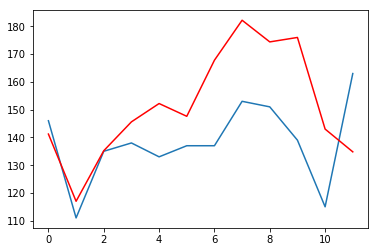

------Data extracted-----
------Data normalized-----
Community-18, Month-1, Year-2015: actual-48; preds-42.6
RMSE error: 5.399999999999999
------Data extracted-----
------Data normalized-----
Community-18, Month-2, Year-2015: actual-36; preds-53.4
RMSE error: 17.4
------Data extracted-----
------Data normalized-----
Community-18, Month-3, Year-2015: actual-59; preds-54.6
RMSE error: 4.399999999999999
------Data extracted-----
------Data normalized-----
Community-18, Month-4, Year-2015: actual-48; preds-55.4
RMSE error: 7.399999999999999
------Data extracted-----
------Data normalized-----
Community-18, Month-5, Year-2015: actual-41; preds-60.6
RMSE error: 19.6
------Data extracted-----
------Data normalized-----
Community-18, Month-6, Year-2015: actual-49; preds-64.0
RMSE error: 15.0
------Data extracted-----
------Data normalized-----
Community-18, Month-7, Year-2015: actual-56; preds-70.2
RMSE error: 14.200000000000003
------Data extracted-----
------Data normalized-----
Community-18

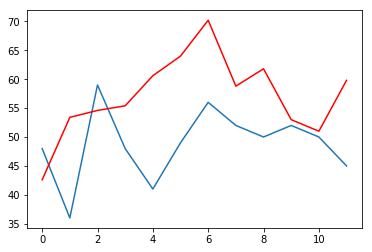

------Data extracted-----
------Data normalized-----
Community-19, Month-1, Year-2015: actual-407; preds-500.8
RMSE error: 93.80000000000001
------Data extracted-----
------Data normalized-----
Community-19, Month-2, Year-2015: actual-309; preds-416.4
RMSE error: 107.39999999999998
------Data extracted-----
------Data normalized-----
Community-19, Month-3, Year-2015: actual-414; preds-500.0
RMSE error: 86.0
------Data extracted-----
------Data normalized-----
Community-19, Month-4, Year-2015: actual-385; preds-479.0
RMSE error: 94.0
------Data extracted-----
------Data normalized-----
Community-19, Month-5, Year-2015: actual-425; preds-539.2
RMSE error: 114.20000000000005
------Data extracted-----
------Data normalized-----
Community-19, Month-6, Year-2015: actual-361; preds-540.0
RMSE error: 179.0
------Data extracted-----
------Data normalized-----
Community-19, Month-7, Year-2015: actual-433; preds-533.0
RMSE error: 100.0
------Data extracted-----
------Data normalized-----
Communit

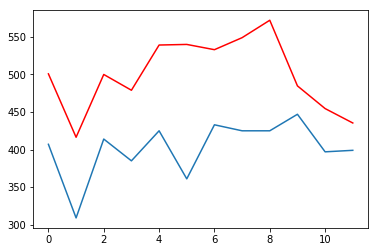

------Data extracted-----
------Data normalized-----
Community-20, Month-1, Year-2015: actual-174; preds-169.4
RMSE error: 4.599999999999994
------Data extracted-----
------Data normalized-----
Community-20, Month-2, Year-2015: actual-106; preds-136.8
RMSE error: 30.80000000000001
------Data extracted-----
------Data normalized-----
Community-20, Month-3, Year-2015: actual-150; preds-153.2
RMSE error: 3.1999999999999886
------Data extracted-----
------Data normalized-----
Community-20, Month-4, Year-2015: actual-131; preds-181.0
RMSE error: 50.0
------Data extracted-----
------Data normalized-----
Community-20, Month-5, Year-2015: actual-151; preds-180.2
RMSE error: 29.19999999999999
------Data extracted-----
------Data normalized-----
Community-20, Month-6, Year-2015: actual-156; preds-185.8
RMSE error: 29.80000000000001
------Data extracted-----
------Data normalized-----
Community-20, Month-7, Year-2015: actual-134; preds-161.4
RMSE error: 27.400000000000006
------Data extracted----

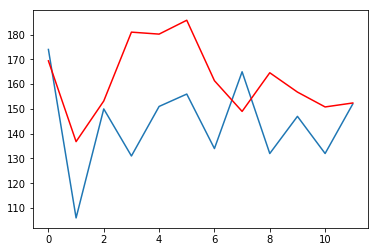

------Data extracted-----
------Data normalized-----
Community-21, Month-1, Year-2015: actual-218; preds-233.8
RMSE error: 15.800000000000011
------Data extracted-----
------Data normalized-----
Community-21, Month-2, Year-2015: actual-164; preds-204.2
RMSE error: 40.19999999999999
------Data extracted-----
------Data normalized-----
Community-21, Month-3, Year-2015: actual-180; preds-253.2
RMSE error: 73.19999999999999
------Data extracted-----
------Data normalized-----
Community-21, Month-4, Year-2015: actual-181; preds-256.2
RMSE error: 75.19999999999999
------Data extracted-----
------Data normalized-----
Community-21, Month-5, Year-2015: actual-188; preds-286.6
RMSE error: 98.60000000000002
------Data extracted-----
------Data normalized-----
Community-21, Month-6, Year-2015: actual-192; preds-279.2
RMSE error: 87.19999999999999
------Data extracted-----
------Data normalized-----
Community-21, Month-7, Year-2015: actual-200; preds-266.2
RMSE error: 66.19999999999999
------Data e

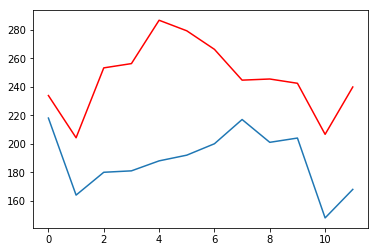

------Data extracted-----
------Data normalized-----
Community-22, Month-1, Year-2015: actual-383; preds-549.0
RMSE error: 166.0
------Data extracted-----
------Data normalized-----
Community-22, Month-2, Year-2015: actual-324; preds-394.8
RMSE error: 70.80000000000001
------Data extracted-----
------Data normalized-----
Community-22, Month-3, Year-2015: actual-391; preds-519.2
RMSE error: 128.20000000000005
------Data extracted-----
------Data normalized-----
Community-22, Month-4, Year-2015: actual-402; preds-471.4
RMSE error: 69.39999999999998
------Data extracted-----
------Data normalized-----
Community-22, Month-5, Year-2015: actual-401; preds-569.6
RMSE error: 168.60000000000002
------Data extracted-----
------Data normalized-----
Community-22, Month-6, Year-2015: actual-378; preds-546.2
RMSE error: 168.20000000000005
------Data extracted-----
------Data normalized-----
Community-22, Month-7, Year-2015: actual-436; preds-634.2
RMSE error: 198.20000000000005
------Data extracted-

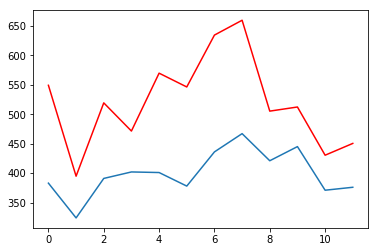

------Data extracted-----
------Data normalized-----
Community-23, Month-1, Year-2015: actual-684; preds-801.2
RMSE error: 117.20000000000005
------Data extracted-----
------Data normalized-----
Community-23, Month-2, Year-2015: actual-549; preds-777.0
RMSE error: 228.0
------Data extracted-----
------Data normalized-----
Community-23, Month-3, Year-2015: actual-739; preds-811.2
RMSE error: 72.20000000000005
------Data extracted-----
------Data normalized-----
Community-23, Month-4, Year-2015: actual-716; preds-764.4
RMSE error: 48.39999999999998
------Data extracted-----
------Data normalized-----
Community-23, Month-5, Year-2015: actual-733; preds-920.4
RMSE error: 187.39999999999998
------Data extracted-----
------Data normalized-----
Community-23, Month-6, Year-2015: actual-668; preds-906.2
RMSE error: 238.20000000000005
------Data extracted-----
------Data normalized-----
Community-23, Month-7, Year-2015: actual-760; preds-990.0
RMSE error: 230.0
------Data extracted-----
------Da

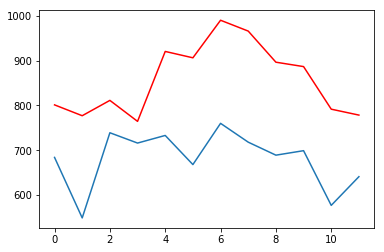

------Data extracted-----
------Data normalized-----
Community-24, Month-1, Year-2015: actual-517; preds-717.2
RMSE error: 200.20000000000005
------Data extracted-----
------Data normalized-----
Community-24, Month-2, Year-2015: actual-419; preds-498.4
RMSE error: 79.39999999999998
------Data extracted-----
------Data normalized-----
Community-24, Month-3, Year-2015: actual-483; preds-771.6
RMSE error: 288.6
------Data extracted-----
------Data normalized-----
Community-24, Month-4, Year-2015: actual-524; preds-701.4
RMSE error: 177.39999999999998
------Data extracted-----
------Data normalized-----
Community-24, Month-5, Year-2015: actual-585; preds-783.6
RMSE error: 198.60000000000002
------Data extracted-----
------Data normalized-----
Community-24, Month-6, Year-2015: actual-653; preds-836.6
RMSE error: 183.60000000000002
------Data extracted-----
------Data normalized-----
Community-24, Month-7, Year-2015: actual-638; preds-888.6
RMSE error: 250.60000000000002
------Data extracted

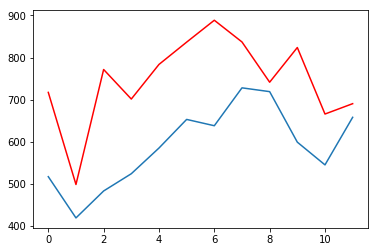

------Data extracted-----
------Data normalized-----
Community-25, Month-1, Year-2015: actual-1442; preds-1416.8
RMSE error: 25.200000000000045
------Data extracted-----
------Data normalized-----
Community-25, Month-2, Year-2015: actual-1123; preds-1390.6
RMSE error: 267.5999999999999
------Data extracted-----
------Data normalized-----
Community-25, Month-3, Year-2015: actual-1418; preds-1887.0
RMSE error: 469.0
------Data extracted-----
------Data normalized-----
Community-25, Month-4, Year-2015: actual-1475; preds-1684.8
RMSE error: 209.79999999999995
------Data extracted-----
------Data normalized-----
Community-25, Month-5, Year-2015: actual-1545; preds-1889.0
RMSE error: 344.0
------Data extracted-----
------Data normalized-----
Community-25, Month-6, Year-2015: actual-1506; preds-1836.8
RMSE error: 330.79999999999995
------Data extracted-----
------Data normalized-----
Community-25, Month-7, Year-2015: actual-1651; preds-1850.0
RMSE error: 199.0
------Data extracted-----
------

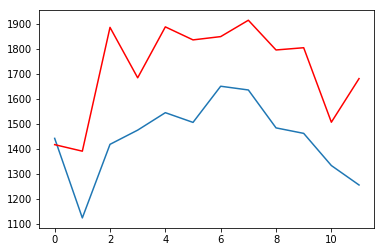

------Data extracted-----
------Data normalized-----
Community-26, Month-1, Year-2015: actual-549; preds-495.8
RMSE error: 53.19999999999999
------Data extracted-----
------Data normalized-----
Community-26, Month-2, Year-2015: actual-419; preds-398.2
RMSE error: 20.80000000000001
------Data extracted-----
------Data normalized-----
Community-26, Month-3, Year-2015: actual-563; preds-561.8
RMSE error: 1.2000000000000455
------Data extracted-----
------Data normalized-----
Community-26, Month-4, Year-2015: actual-531; preds-535.2
RMSE error: 4.2000000000000455
------Data extracted-----
------Data normalized-----
Community-26, Month-5, Year-2015: actual-462; preds-565.2
RMSE error: 103.20000000000005
------Data extracted-----
------Data normalized-----
Community-26, Month-6, Year-2015: actual-485; preds-554.2
RMSE error: 69.20000000000005
------Data extracted-----
------Data normalized-----
Community-26, Month-7, Year-2015: actual-507; preds-579.6
RMSE error: 72.60000000000002
------Data

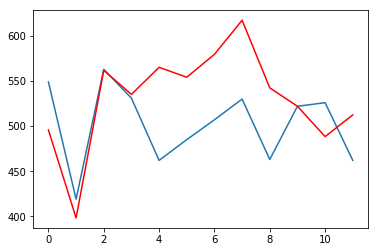

------Data extracted-----
------Data normalized-----
Community-27, Month-1, Year-2015: actual-410; preds-486.2
RMSE error: 76.19999999999999
------Data extracted-----
------Data normalized-----
Community-27, Month-2, Year-2015: actual-340; preds-448.6
RMSE error: 108.60000000000002
------Data extracted-----
------Data normalized-----
Community-27, Month-3, Year-2015: actual-480; preds-484.2
RMSE error: 4.199999999999989
------Data extracted-----
------Data normalized-----
Community-27, Month-4, Year-2015: actual-439; preds-524.6
RMSE error: 85.60000000000002
------Data extracted-----
------Data normalized-----
Community-27, Month-5, Year-2015: actual-493; preds-572.4
RMSE error: 79.39999999999998
------Data extracted-----
------Data normalized-----
Community-27, Month-6, Year-2015: actual-469; preds-548.0
RMSE error: 79.0
------Data extracted-----
------Data normalized-----
Community-27, Month-7, Year-2015: actual-531; preds-533.4
RMSE error: 2.3999999999999773
------Data extracted----

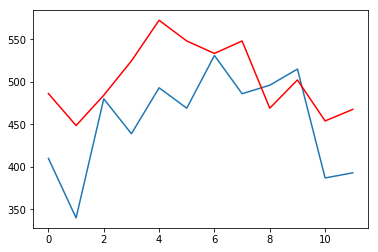

------Data extracted-----
------Data normalized-----
Community-28, Month-1, Year-2015: actual-576; preds-699.4
RMSE error: 123.39999999999998
------Data extracted-----
------Data normalized-----
Community-28, Month-2, Year-2015: actual-428; preds-563.4
RMSE error: 135.39999999999998
------Data extracted-----
------Data normalized-----
Community-28, Month-3, Year-2015: actual-610; preds-732.0
RMSE error: 122.0
------Data extracted-----
------Data normalized-----
Community-28, Month-4, Year-2015: actual-691; preds-684.6
RMSE error: 6.399999999999977
------Data extracted-----
------Data normalized-----
Community-28, Month-5, Year-2015: actual-726; preds-707.2
RMSE error: 18.799999999999955
------Data extracted-----
------Data normalized-----
Community-28, Month-6, Year-2015: actual-726; preds-763.4
RMSE error: 37.39999999999998
------Data extracted-----
------Data normalized-----
Community-28, Month-7, Year-2015: actual-707; preds-818.4
RMSE error: 111.39999999999998
------Data extracted-

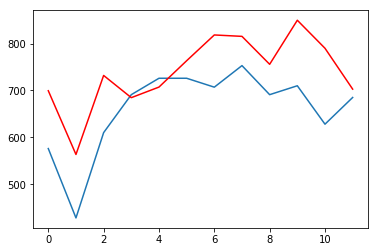

------Data extracted-----
------Data normalized-----
Community-29, Month-1, Year-2015: actual-614; preds-709.6
RMSE error: 95.60000000000002
------Data extracted-----
------Data normalized-----
Community-29, Month-2, Year-2015: actual-481; preds-648.8
RMSE error: 167.79999999999995
------Data extracted-----
------Data normalized-----
Community-29, Month-3, Year-2015: actual-718; preds-816.6
RMSE error: 98.60000000000002
------Data extracted-----
------Data normalized-----
Community-29, Month-4, Year-2015: actual-686; preds-861.6
RMSE error: 175.60000000000002
------Data extracted-----
------Data normalized-----
Community-29, Month-5, Year-2015: actual-782; preds-836.6
RMSE error: 54.60000000000002
------Data extracted-----
------Data normalized-----
Community-29, Month-6, Year-2015: actual-746; preds-895.2
RMSE error: 149.20000000000005
------Data extracted-----
------Data normalized-----
Community-29, Month-7, Year-2015: actual-792; preds-876.8
RMSE error: 84.79999999999995
------Data

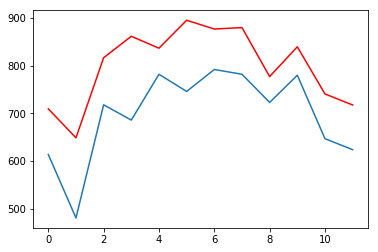

------Data extracted-----
------Data normalized-----
Community-30, Month-1, Year-2015: actual-308; preds-429.2
RMSE error: 121.19999999999999
------Data extracted-----
------Data normalized-----
Community-30, Month-2, Year-2015: actual-247; preds-364.0
RMSE error: 117.0
------Data extracted-----
------Data normalized-----
Community-30, Month-3, Year-2015: actual-389; preds-452.2
RMSE error: 63.19999999999999
------Data extracted-----
------Data normalized-----
Community-30, Month-4, Year-2015: actual-413; preds-455.8
RMSE error: 42.80000000000001
------Data extracted-----
------Data normalized-----
Community-30, Month-5, Year-2015: actual-396; preds-540.0
RMSE error: 144.0
------Data extracted-----
------Data normalized-----
Community-30, Month-6, Year-2015: actual-371; preds-497.0
RMSE error: 126.0
------Data extracted-----
------Data normalized-----
Community-30, Month-7, Year-2015: actual-389; preds-513.6
RMSE error: 124.60000000000002
------Data extracted-----
------Data normalized

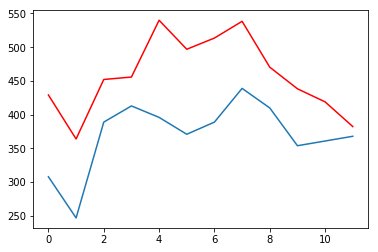

------Data extracted-----
------Data normalized-----
Community-31, Month-1, Year-2015: actual-171; preds-257.0
RMSE error: 86.0
------Data extracted-----
------Data normalized-----
Community-31, Month-2, Year-2015: actual-168; preds-198.2
RMSE error: 30.19999999999999
------Data extracted-----
------Data normalized-----
Community-31, Month-3, Year-2015: actual-202; preds-262.4
RMSE error: 60.39999999999998
------Data extracted-----
------Data normalized-----
Community-31, Month-4, Year-2015: actual-173; preds-261.4
RMSE error: 88.39999999999998
------Data extracted-----
------Data normalized-----
Community-31, Month-5, Year-2015: actual-248; preds-306.2
RMSE error: 58.19999999999999
------Data extracted-----
------Data normalized-----
Community-31, Month-6, Year-2015: actual-270; preds-256.2
RMSE error: 13.800000000000011
------Data extracted-----
------Data normalized-----
Community-31, Month-7, Year-2015: actual-235; preds-269.4
RMSE error: 34.39999999999998
------Data extracted-----

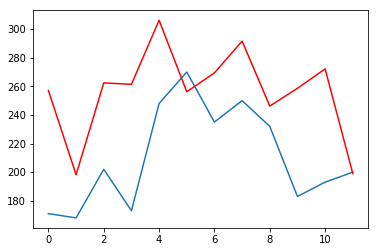

------Data extracted-----
------Data normalized-----
Community-32, Month-1, Year-2015: actual-531; preds-574.0
RMSE error: 43.0
------Data extracted-----
------Data normalized-----
Community-32, Month-2, Year-2015: actual-397; preds-486.0
RMSE error: 89.0
------Data extracted-----
------Data normalized-----
Community-32, Month-3, Year-2015: actual-573; preds-593.4
RMSE error: 20.399999999999977
------Data extracted-----
------Data normalized-----
Community-32, Month-4, Year-2015: actual-584; preds-546.0
RMSE error: 38.0
------Data extracted-----
------Data normalized-----
Community-32, Month-5, Year-2015: actual-550; preds-597.2
RMSE error: 47.200000000000045
------Data extracted-----
------Data normalized-----
Community-32, Month-6, Year-2015: actual-612; preds-657.8
RMSE error: 45.799999999999955
------Data extracted-----
------Data normalized-----
Community-32, Month-7, Year-2015: actual-771; preds-672.8
RMSE error: 98.20000000000005
------Data extracted-----
------Data normalized--

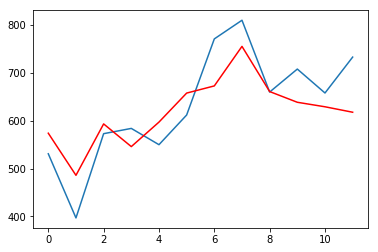

------Data extracted-----
------Data normalized-----
Community-33, Month-1, Year-2015: actual-157; preds-126.0
RMSE error: 31.0
------Data extracted-----
------Data normalized-----
Community-33, Month-2, Year-2015: actual-117; preds-125.4
RMSE error: 8.400000000000006
------Data extracted-----
------Data normalized-----
Community-33, Month-3, Year-2015: actual-131; preds-134.8
RMSE error: 3.8000000000000114
------Data extracted-----
------Data normalized-----
Community-33, Month-4, Year-2015: actual-116; preds-133.2
RMSE error: 17.19999999999999
------Data extracted-----
------Data normalized-----
Community-33, Month-5, Year-2015: actual-141; preds-147.2
RMSE error: 6.199999999999989
------Data extracted-----
------Data normalized-----
Community-33, Month-6, Year-2015: actual-202; preds-190.6
RMSE error: 11.400000000000006
------Data extracted-----
------Data normalized-----
Community-33, Month-7, Year-2015: actual-196; preds-179.2
RMSE error: 16.80000000000001
------Data extracted----

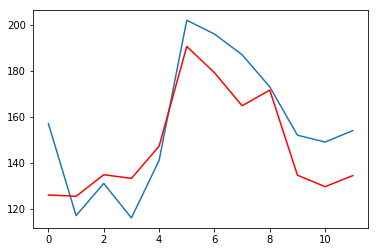

------Data extracted-----
------Data normalized-----
Community-34, Month-1, Year-2015: actual-90; preds-98.2
RMSE error: 8.200000000000003
------Data extracted-----
------Data normalized-----
Community-34, Month-2, Year-2015: actual-61; preds-87.0
RMSE error: 26.0
------Data extracted-----
------Data normalized-----
Community-34, Month-3, Year-2015: actual-81; preds-108.4
RMSE error: 27.400000000000006
------Data extracted-----
------Data normalized-----
Community-34, Month-4, Year-2015: actual-78; preds-112.2
RMSE error: 34.2
------Data extracted-----
------Data normalized-----
Community-34, Month-5, Year-2015: actual-91; preds-141.0
RMSE error: 50.0
------Data extracted-----
------Data normalized-----
Community-34, Month-6, Year-2015: actual-94; preds-137.8
RMSE error: 43.80000000000001
------Data extracted-----
------Data normalized-----
Community-34, Month-7, Year-2015: actual-110; preds-119.6
RMSE error: 9.599999999999994
------Data extracted-----
------Data normalized-----
Commun

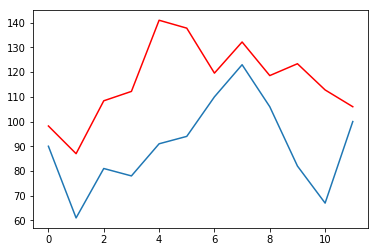

------Data extracted-----
------Data normalized-----
Community-35, Month-1, Year-2015: actual-202; preds-199.2
RMSE error: 2.8000000000000114
------Data extracted-----
------Data normalized-----
Community-35, Month-2, Year-2015: actual-143; preds-178.2
RMSE error: 35.19999999999999
------Data extracted-----
------Data normalized-----
Community-35, Month-3, Year-2015: actual-212; preds-222.8
RMSE error: 10.800000000000011
------Data extracted-----
------Data normalized-----
Community-35, Month-4, Year-2015: actual-195; preds-199.6
RMSE error: 4.599999999999994
------Data extracted-----
------Data normalized-----
Community-35, Month-5, Year-2015: actual-246; preds-237.6
RMSE error: 8.400000000000006
------Data extracted-----
------Data normalized-----
Community-35, Month-6, Year-2015: actual-211; preds-257.6
RMSE error: 46.60000000000002
------Data extracted-----
------Data normalized-----
Community-35, Month-7, Year-2015: actual-235; preds-247.0
RMSE error: 12.0
------Data extracted----

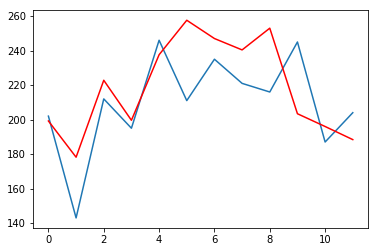

------Data extracted-----
------Data normalized-----
Community-36, Month-1, Year-2015: actual-49; preds-54.6
RMSE error: 5.600000000000001
------Data extracted-----
------Data normalized-----
Community-36, Month-2, Year-2015: actual-23; preds-40.0
RMSE error: 17.0
------Data extracted-----
------Data normalized-----
Community-36, Month-3, Year-2015: actual-48; preds-51.0
RMSE error: 3.0
------Data extracted-----
------Data normalized-----
Community-36, Month-4, Year-2015: actual-50; preds-64.4
RMSE error: 14.400000000000006
------Data extracted-----
------Data normalized-----
Community-36, Month-5, Year-2015: actual-54; preds-61.0
RMSE error: 7.0
------Data extracted-----
------Data normalized-----
Community-36, Month-6, Year-2015: actual-48; preds-69.0
RMSE error: 21.0
------Data extracted-----
------Data normalized-----
Community-36, Month-7, Year-2015: actual-71; preds-84.8
RMSE error: 13.799999999999997
------Data extracted-----
------Data normalized-----
Community-36, Month-8, Yea

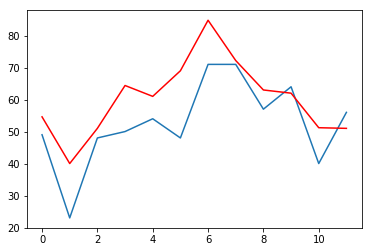

------Data extracted-----
------Data normalized-----
Community-37, Month-1, Year-2015: actual-62; preds-91.4
RMSE error: 29.400000000000006
------Data extracted-----
------Data normalized-----
Community-37, Month-2, Year-2015: actual-51; preds-77.4
RMSE error: 26.400000000000006
------Data extracted-----
------Data normalized-----
Community-37, Month-3, Year-2015: actual-67; preds-88.4
RMSE error: 21.400000000000006
------Data extracted-----
------Data normalized-----
Community-37, Month-4, Year-2015: actual-64; preds-76.8
RMSE error: 12.799999999999997
------Data extracted-----
------Data normalized-----
Community-37, Month-5, Year-2015: actual-88; preds-109.2
RMSE error: 21.200000000000003
------Data extracted-----
------Data normalized-----
Community-37, Month-6, Year-2015: actual-79; preds-100.4
RMSE error: 21.400000000000006
------Data extracted-----
------Data normalized-----
Community-37, Month-7, Year-2015: actual-98; preds-108.8
RMSE error: 10.799999999999997
------Data extrac

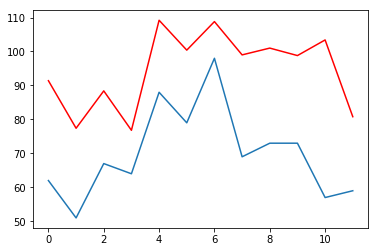

------Data extracted-----
------Data normalized-----
Community-38, Month-1, Year-2015: actual-224; preds-292.8
RMSE error: 68.80000000000001
------Data extracted-----
------Data normalized-----
Community-38, Month-2, Year-2015: actual-196; preds-204.0
RMSE error: 8.0
------Data extracted-----
------Data normalized-----
Community-38, Month-3, Year-2015: actual-234; preds-343.8
RMSE error: 109.80000000000001
------Data extracted-----
------Data normalized-----
Community-38, Month-4, Year-2015: actual-248; preds-326.0
RMSE error: 78.0
------Data extracted-----
------Data normalized-----
Community-38, Month-5, Year-2015: actual-282; preds-394.8
RMSE error: 112.80000000000001
------Data extracted-----
------Data normalized-----
Community-38, Month-6, Year-2015: actual-271; preds-372.2
RMSE error: 101.19999999999999
------Data extracted-----
------Data normalized-----
Community-38, Month-7, Year-2015: actual-266; preds-351.2
RMSE error: 85.19999999999999
------Data extracted-----
------Data 

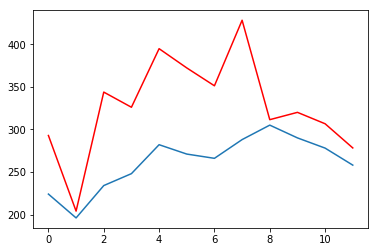

------Data extracted-----
------Data normalized-----
Community-39, Month-1, Year-2015: actual-115; preds-164.8
RMSE error: 49.80000000000001
------Data extracted-----
------Data normalized-----
Community-39, Month-2, Year-2015: actual-80; preds-107.8
RMSE error: 27.799999999999997
------Data extracted-----
------Data normalized-----
Community-39, Month-3, Year-2015: actual-119; preds-134.0
RMSE error: 15.0
------Data extracted-----
------Data normalized-----
Community-39, Month-4, Year-2015: actual-107; preds-145.2
RMSE error: 38.19999999999999
------Data extracted-----
------Data normalized-----
Community-39, Month-5, Year-2015: actual-130; preds-162.2
RMSE error: 32.19999999999999
------Data extracted-----
------Data normalized-----
Community-39, Month-6, Year-2015: actual-120; preds-173.0
RMSE error: 53.0
------Data extracted-----
------Data normalized-----
Community-39, Month-7, Year-2015: actual-153; preds-144.2
RMSE error: 8.800000000000011
------Data extracted-----
------Data no

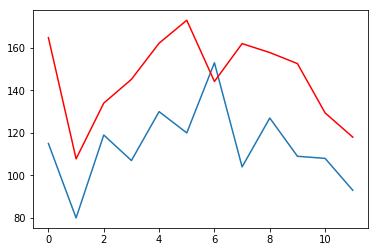

------Data extracted-----
------Data normalized-----
Community-40, Month-1, Year-2015: actual-206; preds-223.2
RMSE error: 17.19999999999999
------Data extracted-----
------Data normalized-----
Community-40, Month-2, Year-2015: actual-150; preds-221.4
RMSE error: 71.4
------Data extracted-----
------Data normalized-----
Community-40, Month-3, Year-2015: actual-219; preds-278.0
RMSE error: 59.0
------Data extracted-----
------Data normalized-----
Community-40, Month-4, Year-2015: actual-238; preds-299.2
RMSE error: 61.19999999999999
------Data extracted-----
------Data normalized-----
Community-40, Month-5, Year-2015: actual-221; preds-320.6
RMSE error: 99.60000000000002
------Data extracted-----
------Data normalized-----
Community-40, Month-6, Year-2015: actual-204; preds-342.0
RMSE error: 138.0
------Data extracted-----
------Data normalized-----
Community-40, Month-7, Year-2015: actual-232; preds-348.4
RMSE error: 116.39999999999998
------Data extracted-----
------Data normalized---

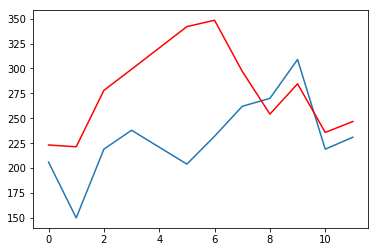

------Data extracted-----
------Data normalized-----
Community-41, Month-1, Year-2015: actual-115; preds-148.6
RMSE error: 33.599999999999994
------Data extracted-----
------Data normalized-----
Community-41, Month-2, Year-2015: actual-72; preds-122.4
RMSE error: 50.400000000000006
------Data extracted-----
------Data normalized-----
Community-41, Month-3, Year-2015: actual-117; preds-136.4
RMSE error: 19.400000000000006
------Data extracted-----
------Data normalized-----
Community-41, Month-4, Year-2015: actual-115; preds-126.0
RMSE error: 11.0
------Data extracted-----
------Data normalized-----
Community-41, Month-5, Year-2015: actual-122; preds-165.8
RMSE error: 43.80000000000001
------Data extracted-----
------Data normalized-----
Community-41, Month-6, Year-2015: actual-141; preds-209.6
RMSE error: 68.6
------Data extracted-----
------Data normalized-----
Community-41, Month-7, Year-2015: actual-160; preds-188.0
RMSE error: 28.0
------Data extracted-----
------Data normalized---

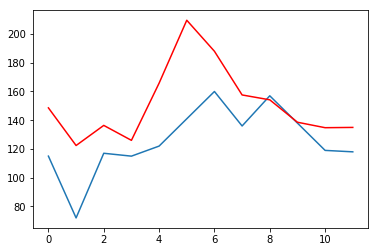

------Data extracted-----
------Data normalized-----
Community-42, Month-1, Year-2015: actual-295; preds-344.2
RMSE error: 49.19999999999999
------Data extracted-----
------Data normalized-----
Community-42, Month-2, Year-2015: actual-204; preds-272.6
RMSE error: 68.60000000000002
------Data extracted-----
------Data normalized-----
Community-42, Month-3, Year-2015: actual-314; preds-433.6
RMSE error: 119.60000000000002
------Data extracted-----
------Data normalized-----
Community-42, Month-4, Year-2015: actual-321; preds-359.8
RMSE error: 38.80000000000001
------Data extracted-----
------Data normalized-----
Community-42, Month-5, Year-2015: actual-318; preds-503.2
RMSE error: 185.2
------Data extracted-----
------Data normalized-----
Community-42, Month-6, Year-2015: actual-334; preds-449.6
RMSE error: 115.60000000000002
------Data extracted-----
------Data normalized-----
Community-42, Month-7, Year-2015: actual-371; preds-539.4
RMSE error: 168.39999999999998
------Data extracted--

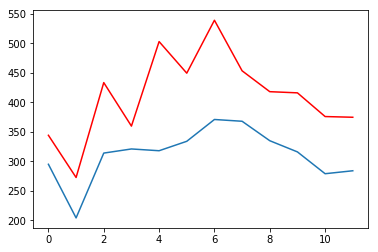

------Data extracted-----
------Data normalized-----
Community-43, Month-1, Year-2015: actual-816; preds-863.4
RMSE error: 47.39999999999998
------Data extracted-----
------Data normalized-----
Community-43, Month-2, Year-2015: actual-585; preds-669.8
RMSE error: 84.79999999999995
------Data extracted-----
------Data normalized-----
Community-43, Month-3, Year-2015: actual-799; preds-869.2
RMSE error: 70.20000000000005
------Data extracted-----
------Data normalized-----
Community-43, Month-4, Year-2015: actual-749; preds-855.6
RMSE error: 106.60000000000002
------Data extracted-----
------Data normalized-----
Community-43, Month-5, Year-2015: actual-791; preds-954.4
RMSE error: 163.39999999999998
------Data extracted-----
------Data normalized-----
Community-43, Month-6, Year-2015: actual-795; preds-1108.4
RMSE error: 313.4000000000001
------Data extracted-----
------Data normalized-----
Community-43, Month-7, Year-2015: actual-840; preds-958.8
RMSE error: 118.79999999999995
------Dat

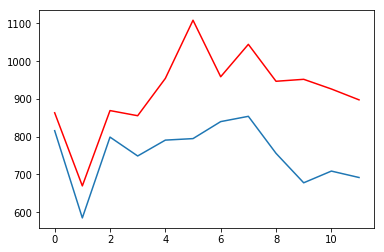

------Data extracted-----
------Data normalized-----
Community-44, Month-1, Year-2015: actual-446; preds-523.0
RMSE error: 77.0
------Data extracted-----
------Data normalized-----
Community-44, Month-2, Year-2015: actual-397; preds-441.6
RMSE error: 44.60000000000002
------Data extracted-----
------Data normalized-----
Community-44, Month-3, Year-2015: actual-532; preds-598.6
RMSE error: 66.60000000000002
------Data extracted-----
------Data normalized-----
Community-44, Month-4, Year-2015: actual-496; preds-612.4
RMSE error: 116.39999999999998
------Data extracted-----
------Data normalized-----
Community-44, Month-5, Year-2015: actual-548; preds-664.6
RMSE error: 116.60000000000002
------Data extracted-----
------Data normalized-----
Community-44, Month-6, Year-2015: actual-530; preds-630.8
RMSE error: 100.79999999999995
------Data extracted-----
------Data normalized-----
Community-44, Month-7, Year-2015: actual-579; preds-651.2
RMSE error: 72.20000000000005
------Data extracted---

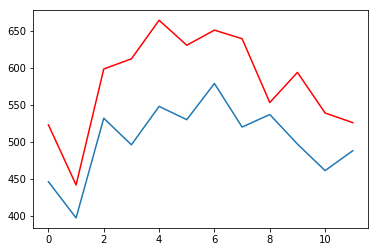

------Data extracted-----
------Data normalized-----
Community-45, Month-1, Year-2015: actual-101; preds-140.4
RMSE error: 39.400000000000006
------Data extracted-----
------Data normalized-----
Community-45, Month-2, Year-2015: actual-95; preds-110.6
RMSE error: 15.599999999999994
------Data extracted-----
------Data normalized-----
Community-45, Month-3, Year-2015: actual-151; preds-144.0
RMSE error: 7.0
------Data extracted-----
------Data normalized-----
Community-45, Month-4, Year-2015: actual-122; preds-137.2
RMSE error: 15.199999999999989
------Data extracted-----
------Data normalized-----
Community-45, Month-5, Year-2015: actual-120; preds-168.2
RMSE error: 48.19999999999999
------Data extracted-----
------Data normalized-----
Community-45, Month-6, Year-2015: actual-135; preds-160.0
RMSE error: 25.0
------Data extracted-----
------Data normalized-----
Community-45, Month-7, Year-2015: actual-115; preds-156.8
RMSE error: 41.80000000000001
------Data extracted-----
------Data n

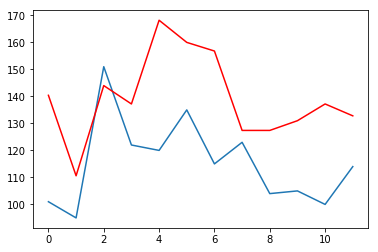

------Data extracted-----
------Data normalized-----
Community-46, Month-1, Year-2015: actual-400; preds-420.0
RMSE error: 20.0
------Data extracted-----
------Data normalized-----
Community-46, Month-2, Year-2015: actual-318; preds-439.6
RMSE error: 121.60000000000002
------Data extracted-----
------Data normalized-----
Community-46, Month-3, Year-2015: actual-406; preds-499.6
RMSE error: 93.60000000000002
------Data extracted-----
------Data normalized-----
Community-46, Month-4, Year-2015: actual-385; preds-535.2
RMSE error: 150.20000000000005
------Data extracted-----
------Data normalized-----
Community-46, Month-5, Year-2015: actual-463; preds-543.6
RMSE error: 80.60000000000002
------Data extracted-----
------Data normalized-----
Community-46, Month-6, Year-2015: actual-441; preds-593.2
RMSE error: 152.20000000000005
------Data extracted-----
------Data normalized-----
Community-46, Month-7, Year-2015: actual-525; preds-590.0
RMSE error: 65.0
------Data extracted-----
------Data

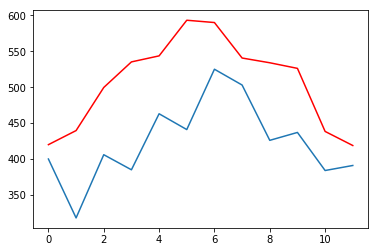

------Data extracted-----
------Data normalized-----
Community-47, Month-1, Year-2015: actual-20; preds-29.8
RMSE error: 9.8
------Data extracted-----
------Data normalized-----
Community-47, Month-2, Year-2015: actual-24; preds-26.2
RMSE error: 2.1999999999999993
------Data extracted-----
------Data normalized-----
Community-47, Month-3, Year-2015: actual-30; preds-38.4
RMSE error: 8.399999999999999
------Data extracted-----
------Data normalized-----
Community-47, Month-4, Year-2015: actual-34; preds-33.4
RMSE error: 0.6000000000000014
------Data extracted-----
------Data normalized-----
Community-47, Month-5, Year-2015: actual-40; preds-31.6
RMSE error: 8.399999999999999
------Data extracted-----
------Data normalized-----
Community-47, Month-6, Year-2015: actual-31; preds-44.8
RMSE error: 13.799999999999997
------Data extracted-----
------Data normalized-----
Community-47, Month-7, Year-2015: actual-28; preds-47.0
RMSE error: 19.0
------Data extracted-----
------Data normalized----

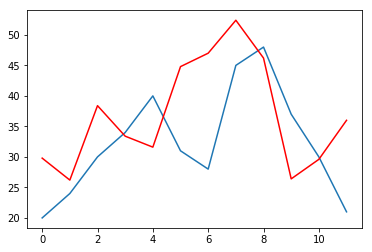

------Data extracted-----
------Data normalized-----
Community-48, Month-1, Year-2015: actual-106; preds-127.4
RMSE error: 21.400000000000006
------Data extracted-----
------Data normalized-----
Community-48, Month-2, Year-2015: actual-85; preds-112.0
RMSE error: 27.0
------Data extracted-----
------Data normalized-----
Community-48, Month-3, Year-2015: actual-100; preds-162.0
RMSE error: 62.0
------Data extracted-----
------Data normalized-----
Community-48, Month-4, Year-2015: actual-134; preds-146.4
RMSE error: 12.400000000000006
------Data extracted-----
------Data normalized-----
Community-48, Month-5, Year-2015: actual-132; preds-186.6
RMSE error: 54.599999999999994
------Data extracted-----
------Data normalized-----
Community-48, Month-6, Year-2015: actual-138; preds-160.6
RMSE error: 22.599999999999994
------Data extracted-----
------Data normalized-----
Community-48, Month-7, Year-2015: actual-139; preds-175.6
RMSE error: 36.599999999999994
------Data extracted-----
------Dat

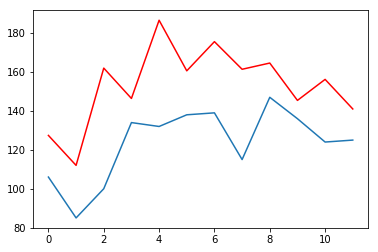

------Data extracted-----
------Data normalized-----
Community-49, Month-1, Year-2015: actual-595; preds-583.4
RMSE error: 11.600000000000023
------Data extracted-----
------Data normalized-----
Community-49, Month-2, Year-2015: actual-433; preds-577.2
RMSE error: 144.20000000000005
------Data extracted-----
------Data normalized-----
Community-49, Month-3, Year-2015: actual-569; preds-689.6
RMSE error: 120.60000000000002
------Data extracted-----
------Data normalized-----
Community-49, Month-4, Year-2015: actual-572; preds-790.6
RMSE error: 218.60000000000002
------Data extracted-----
------Data normalized-----
Community-49, Month-5, Year-2015: actual-620; preds-816.4
RMSE error: 196.39999999999998
------Data extracted-----
------Data normalized-----
Community-49, Month-6, Year-2015: actual-579; preds-769.4
RMSE error: 190.39999999999998
------Data extracted-----
------Data normalized-----
Community-49, Month-7, Year-2015: actual-611; preds-788.4
RMSE error: 177.39999999999998
------

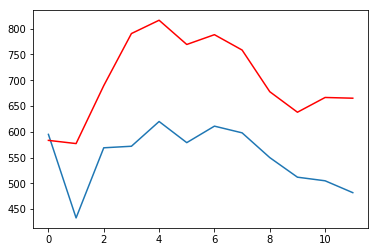

------Data extracted-----
------Data normalized-----
Community-50, Month-1, Year-2015: actual-104; preds-99.8
RMSE error: 4.200000000000003
------Data extracted-----
------Data normalized-----
Community-50, Month-2, Year-2015: actual-79; preds-79.8
RMSE error: 0.7999999999999972
------Data extracted-----
------Data normalized-----
Community-50, Month-3, Year-2015: actual-84; preds-97.8
RMSE error: 13.799999999999997
------Data extracted-----
------Data normalized-----
Community-50, Month-4, Year-2015: actual-107; preds-94.4
RMSE error: 12.599999999999994
------Data extracted-----
------Data normalized-----
Community-50, Month-5, Year-2015: actual-93; preds-102.2
RMSE error: 9.200000000000003
------Data extracted-----
------Data normalized-----
Community-50, Month-6, Year-2015: actual-76; preds-118.0
RMSE error: 42.0
------Data extracted-----
------Data normalized-----
Community-50, Month-7, Year-2015: actual-89; preds-91.8
RMSE error: 2.799999999999997
------Data extracted-----
------D

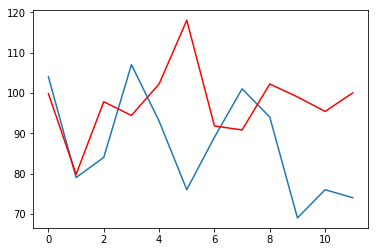

------Data extracted-----
------Data normalized-----
Community-51, Month-1, Year-2015: actual-175; preds-175.2
RMSE error: 0.19999999999998863
------Data extracted-----
------Data normalized-----
Community-51, Month-2, Year-2015: actual-119; preds-140.8
RMSE error: 21.80000000000001
------Data extracted-----
------Data normalized-----
Community-51, Month-3, Year-2015: actual-159; preds-178.4
RMSE error: 19.400000000000006
------Data extracted-----
------Data normalized-----
Community-51, Month-4, Year-2015: actual-174; preds-179.4
RMSE error: 5.400000000000006
------Data extracted-----
------Data normalized-----
Community-51, Month-5, Year-2015: actual-165; preds-198.6
RMSE error: 33.599999999999994
------Data extracted-----
------Data normalized-----
Community-51, Month-6, Year-2015: actual-162; preds-227.8
RMSE error: 65.80000000000001
------Data extracted-----
------Data normalized-----
Community-51, Month-7, Year-2015: actual-183; preds-241.8
RMSE error: 58.80000000000001
------Dat

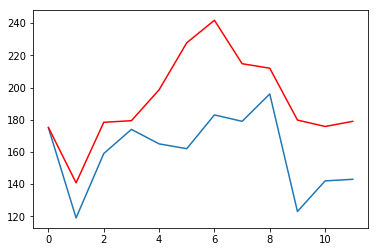

------Data extracted-----
------Data normalized-----
Community-52, Month-1, Year-2015: actual-132; preds-88.4
RMSE error: 43.599999999999994
------Data extracted-----
------Data normalized-----
Community-52, Month-2, Year-2015: actual-87; preds-111.2
RMSE error: 24.200000000000003
------Data extracted-----
------Data normalized-----
Community-52, Month-3, Year-2015: actual-95; preds-131.8
RMSE error: 36.80000000000001
------Data extracted-----
------Data normalized-----
Community-52, Month-4, Year-2015: actual-109; preds-123.4
RMSE error: 14.400000000000006
------Data extracted-----
------Data normalized-----
Community-52, Month-5, Year-2015: actual-117; preds-167.2
RMSE error: 50.19999999999999
------Data extracted-----
------Data normalized-----
Community-52, Month-6, Year-2015: actual-141; preds-150.6
RMSE error: 9.599999999999994
------Data extracted-----
------Data normalized-----
Community-52, Month-7, Year-2015: actual-101; preds-137.4
RMSE error: 36.400000000000006
------Data e

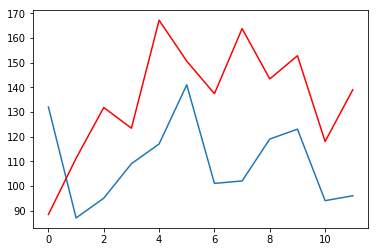

------Data extracted-----
------Data normalized-----
Community-53, Month-1, Year-2015: actual-333; preds-374.8
RMSE error: 41.80000000000001
------Data extracted-----
------Data normalized-----
Community-53, Month-2, Year-2015: actual-237; preds-370.2
RMSE error: 133.2
------Data extracted-----
------Data normalized-----
Community-53, Month-3, Year-2015: actual-327; preds-427.8
RMSE error: 100.80000000000001
------Data extracted-----
------Data normalized-----
Community-53, Month-4, Year-2015: actual-305; preds-461.8
RMSE error: 156.8
------Data extracted-----
------Data normalized-----
Community-53, Month-5, Year-2015: actual-388; preds-501.2
RMSE error: 113.19999999999999
------Data extracted-----
------Data normalized-----
Community-53, Month-6, Year-2015: actual-324; preds-514.8
RMSE error: 190.79999999999995
------Data extracted-----
------Data normalized-----
Community-53, Month-7, Year-2015: actual-374; preds-501.2
RMSE error: 127.19999999999999
------Data extracted-----
------D

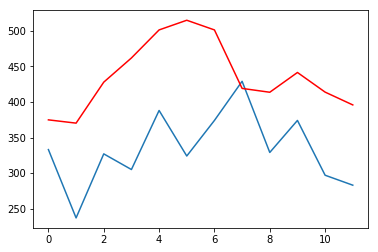

------Data extracted-----
------Data normalized-----
Community-54, Month-1, Year-2015: actual-100; preds-106.2
RMSE error: 6.200000000000003
------Data extracted-----
------Data normalized-----
Community-54, Month-2, Year-2015: actual-76; preds-84.0
RMSE error: 8.0
------Data extracted-----
------Data normalized-----
Community-54, Month-3, Year-2015: actual-104; preds-120.2
RMSE error: 16.200000000000003
------Data extracted-----
------Data normalized-----
Community-54, Month-4, Year-2015: actual-104; preds-125.6
RMSE error: 21.599999999999994
------Data extracted-----
------Data normalized-----
Community-54, Month-5, Year-2015: actual-103; preds-150.8
RMSE error: 47.80000000000001
------Data extracted-----
------Data normalized-----
Community-54, Month-6, Year-2015: actual-123; preds-138.8
RMSE error: 15.800000000000011
------Data extracted-----
------Data normalized-----
Community-54, Month-7, Year-2015: actual-115; preds-136.2
RMSE error: 21.19999999999999
------Data extracted-----


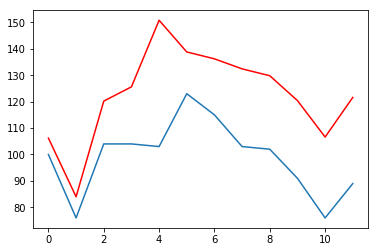

------Data extracted-----
------Data normalized-----
Community-55, Month-1, Year-2015: actual-42; preds-49.2
RMSE error: 7.200000000000003
------Data extracted-----
------Data normalized-----
Community-55, Month-2, Year-2015: actual-29; preds-44.8
RMSE error: 15.799999999999997
------Data extracted-----
------Data normalized-----
Community-55, Month-3, Year-2015: actual-39; preds-55.4
RMSE error: 16.4
------Data extracted-----
------Data normalized-----
Community-55, Month-4, Year-2015: actual-44; preds-67.6
RMSE error: 23.599999999999994
------Data extracted-----
------Data normalized-----
Community-55, Month-5, Year-2015: actual-43; preds-71.2
RMSE error: 28.200000000000003
------Data extracted-----
------Data normalized-----
Community-55, Month-6, Year-2015: actual-51; preds-68.8
RMSE error: 17.799999999999997
------Data extracted-----
------Data normalized-----
Community-55, Month-7, Year-2015: actual-48; preds-76.6
RMSE error: 28.599999999999994
------Data extracted-----
------Dat

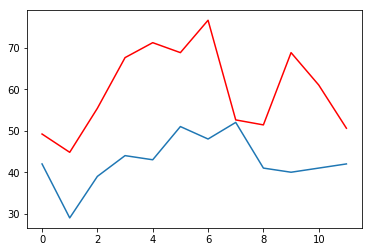

------Data extracted-----
------Data normalized-----
Community-56, Month-1, Year-2015: actual-183; preds-161.6
RMSE error: 21.400000000000006
------Data extracted-----
------Data normalized-----
Community-56, Month-2, Year-2015: actual-130; preds-149.4
RMSE error: 19.400000000000006
------Data extracted-----
------Data normalized-----
Community-56, Month-3, Year-2015: actual-174; preds-190.8
RMSE error: 16.80000000000001
------Data extracted-----
------Data normalized-----
Community-56, Month-4, Year-2015: actual-118; preds-191.8
RMSE error: 73.80000000000001
------Data extracted-----
------Data normalized-----
Community-56, Month-5, Year-2015: actual-154; preds-210.2
RMSE error: 56.19999999999999
------Data extracted-----
------Data normalized-----
Community-56, Month-6, Year-2015: actual-169; preds-212.8
RMSE error: 43.80000000000001
------Data extracted-----
------Data normalized-----
Community-56, Month-7, Year-2015: actual-159; preds-217.0
RMSE error: 58.0
------Data extracted----

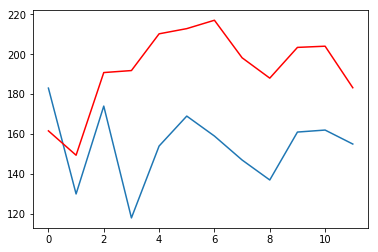

------Data extracted-----
------Data normalized-----
Community-57, Month-1, Year-2015: actual-85; preds-84.4
RMSE error: 0.5999999999999943
------Data extracted-----
------Data normalized-----
Community-57, Month-2, Year-2015: actual-82; preds-89.2
RMSE error: 7.200000000000003
------Data extracted-----
------Data normalized-----
Community-57, Month-3, Year-2015: actual-103; preds-91.6
RMSE error: 11.400000000000006
------Data extracted-----
------Data normalized-----
Community-57, Month-4, Year-2015: actual-89; preds-95.4
RMSE error: 6.400000000000006
------Data extracted-----
------Data normalized-----
Community-57, Month-5, Year-2015: actual-100; preds-109.6
RMSE error: 9.599999999999994
------Data extracted-----
------Data normalized-----
Community-57, Month-6, Year-2015: actual-77; preds-97.2
RMSE error: 20.200000000000003
------Data extracted-----
------Data normalized-----
Community-57, Month-7, Year-2015: actual-75; preds-102.2
RMSE error: 27.200000000000003
------Data extracte

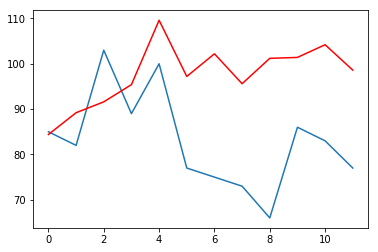

------Data extracted-----
------Data normalized-----
Community-58, Month-1, Year-2015: actual-236; preds-271.8
RMSE error: 35.80000000000001
------Data extracted-----
------Data normalized-----
Community-58, Month-2, Year-2015: actual-184; preds-237.4
RMSE error: 53.400000000000006
------Data extracted-----
------Data normalized-----
Community-58, Month-3, Year-2015: actual-245; preds-291.4
RMSE error: 46.39999999999998
------Data extracted-----
------Data normalized-----
Community-58, Month-4, Year-2015: actual-251; preds-235.4
RMSE error: 15.599999999999994
------Data extracted-----
------Data normalized-----
Community-58, Month-5, Year-2015: actual-230; preds-278.4
RMSE error: 48.39999999999998
------Data extracted-----
------Data normalized-----
Community-58, Month-6, Year-2015: actual-232; preds-297.0
RMSE error: 65.0
------Data extracted-----
------Data normalized-----
Community-58, Month-7, Year-2015: actual-254; preds-312.0
RMSE error: 58.0
------Data extracted-----
------Data 

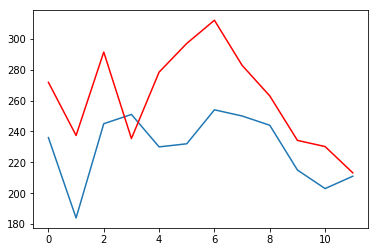

------Data extracted-----
------Data normalized-----
Community-59, Month-1, Year-2015: actual-88; preds-81.0
RMSE error: 7.0
------Data extracted-----
------Data normalized-----
Community-59, Month-2, Year-2015: actual-79; preds-93.4
RMSE error: 14.400000000000006
------Data extracted-----
------Data normalized-----
Community-59, Month-3, Year-2015: actual-75; preds-103.8
RMSE error: 28.799999999999997
------Data extracted-----
------Data normalized-----
Community-59, Month-4, Year-2015: actual-81; preds-105.2
RMSE error: 24.200000000000003
------Data extracted-----
------Data normalized-----
Community-59, Month-5, Year-2015: actual-108; preds-121.4
RMSE error: 13.400000000000006
------Data extracted-----
------Data normalized-----
Community-59, Month-6, Year-2015: actual-109; preds-109.8
RMSE error: 0.7999999999999972
------Data extracted-----
------Data normalized-----
Community-59, Month-7, Year-2015: actual-81; preds-122.2
RMSE error: 41.2
------Data extracted-----
------Data norma

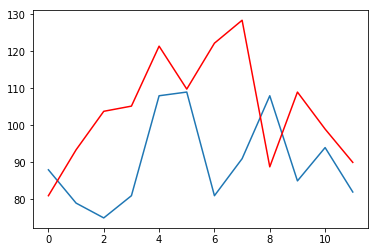

------Data extracted-----
------Data normalized-----
Community-60, Month-1, Year-2015: actual-133; preds-167.4
RMSE error: 34.400000000000006
------Data extracted-----
------Data normalized-----
Community-60, Month-2, Year-2015: actual-86; preds-146.4
RMSE error: 60.400000000000006
------Data extracted-----
------Data normalized-----
Community-60, Month-3, Year-2015: actual-151; preds-148.4
RMSE error: 2.5999999999999943
------Data extracted-----
------Data normalized-----
Community-60, Month-4, Year-2015: actual-119; preds-187.8
RMSE error: 68.80000000000001
------Data extracted-----
------Data normalized-----
Community-60, Month-5, Year-2015: actual-129; preds-197.4
RMSE error: 68.4
------Data extracted-----
------Data normalized-----
Community-60, Month-6, Year-2015: actual-156; preds-175.2
RMSE error: 19.19999999999999
------Data extracted-----
------Data normalized-----
Community-60, Month-7, Year-2015: actual-162; preds-195.8
RMSE error: 33.80000000000001
------Data extracted----

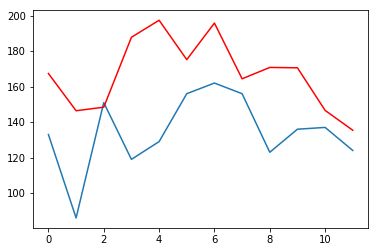

------Data extracted-----
------Data normalized-----
Community-61, Month-1, Year-2015: actual-377; preds-483.4
RMSE error: 106.39999999999998
------Data extracted-----
------Data normalized-----
Community-61, Month-2, Year-2015: actual-306; preds-449.2
RMSE error: 143.2
------Data extracted-----
------Data normalized-----
Community-61, Month-3, Year-2015: actual-394; preds-464.4
RMSE error: 70.39999999999998
------Data extracted-----
------Data normalized-----
Community-61, Month-4, Year-2015: actual-417; preds-535.0
RMSE error: 118.0
------Data extracted-----
------Data normalized-----
Community-61, Month-5, Year-2015: actual-444; preds-570.0
RMSE error: 126.0
------Data extracted-----
------Data normalized-----
Community-61, Month-6, Year-2015: actual-438; preds-533.4
RMSE error: 95.39999999999998
------Data extracted-----
------Data normalized-----
Community-61, Month-7, Year-2015: actual-468; preds-633.0
RMSE error: 165.0
------Data extracted-----
------Data normalized-----
Communi

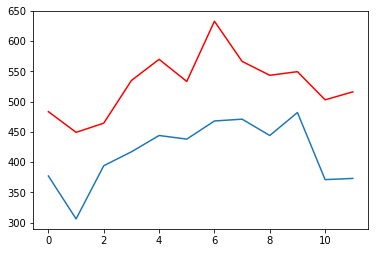

------Data extracted-----
------Data normalized-----
Community-62, Month-1, Year-2015: actual-70; preds-101.8
RMSE error: 31.799999999999997
------Data extracted-----
------Data normalized-----
Community-62, Month-2, Year-2015: actual-71; preds-80.0
RMSE error: 9.0
------Data extracted-----
------Data normalized-----
Community-62, Month-3, Year-2015: actual-81; preds-102.6
RMSE error: 21.599999999999994
------Data extracted-----
------Data normalized-----
Community-62, Month-4, Year-2015: actual-71; preds-125.4
RMSE error: 54.400000000000006
------Data extracted-----
------Data normalized-----
Community-62, Month-5, Year-2015: actual-75; preds-107.0
RMSE error: 32.0
------Data extracted-----
------Data normalized-----
Community-62, Month-6, Year-2015: actual-80; preds-125.4
RMSE error: 45.400000000000006
------Data extracted-----
------Data normalized-----
Community-62, Month-7, Year-2015: actual-85; preds-127.8
RMSE error: 42.8
------Data extracted-----
------Data normalized-----
Comm

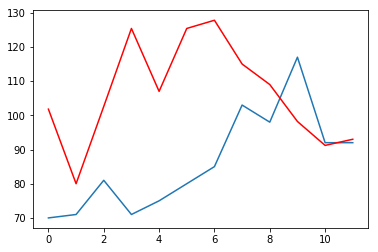

------Data extracted-----
------Data normalized-----
Community-63, Month-1, Year-2015: actual-193; preds-293.4
RMSE error: 100.39999999999998
------Data extracted-----
------Data normalized-----
Community-63, Month-2, Year-2015: actual-139; preds-211.0
RMSE error: 72.0
------Data extracted-----
------Data normalized-----
Community-63, Month-3, Year-2015: actual-187; preds-258.0
RMSE error: 71.0
------Data extracted-----
------Data normalized-----
Community-63, Month-4, Year-2015: actual-200; preds-213.4
RMSE error: 13.400000000000006
------Data extracted-----
------Data normalized-----
Community-63, Month-5, Year-2015: actual-221; preds-300.2
RMSE error: 79.19999999999999
------Data extracted-----
------Data normalized-----
Community-63, Month-6, Year-2015: actual-249; preds-290.6
RMSE error: 41.60000000000002
------Data extracted-----
------Data normalized-----
Community-63, Month-7, Year-2015: actual-198; preds-308.2
RMSE error: 110.19999999999999
------Data extracted-----
------Data

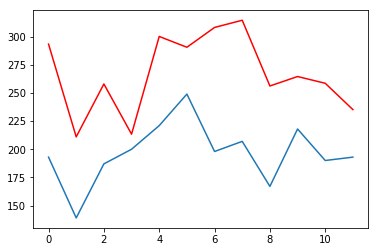

------Data extracted-----
------Data normalized-----
Community-64, Month-1, Year-2015: actual-78; preds-72.0
RMSE error: 6.0
------Data extracted-----
------Data normalized-----
Community-64, Month-2, Year-2015: actual-52; preds-68.0
RMSE error: 16.0
------Data extracted-----
------Data normalized-----
Community-64, Month-3, Year-2015: actual-71; preds-101.8
RMSE error: 30.799999999999997
------Data extracted-----
------Data normalized-----
Community-64, Month-4, Year-2015: actual-70; preds-85.8
RMSE error: 15.799999999999997
------Data extracted-----
------Data normalized-----
Community-64, Month-5, Year-2015: actual-80; preds-94.8
RMSE error: 14.799999999999997
------Data extracted-----
------Data normalized-----
Community-64, Month-6, Year-2015: actual-81; preds-93.6
RMSE error: 12.599999999999994
------Data extracted-----
------Data normalized-----
Community-64, Month-7, Year-2015: actual-91; preds-122.4
RMSE error: 31.400000000000006
------Data extracted-----
------Data normalized

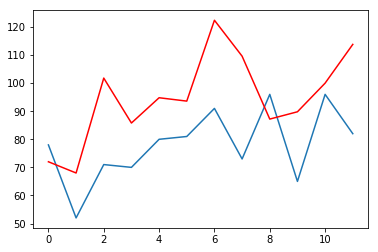

------Data extracted-----
------Data normalized-----
Community-65, Month-1, Year-2015: actual-145; preds-212.0
RMSE error: 67.0
------Data extracted-----
------Data normalized-----
Community-65, Month-2, Year-2015: actual-139; preds-164.2
RMSE error: 25.19999999999999
------Data extracted-----
------Data normalized-----
Community-65, Month-3, Year-2015: actual-186; preds-174.8
RMSE error: 11.199999999999989
------Data extracted-----
------Data normalized-----
Community-65, Month-4, Year-2015: actual-154; preds-174.0
RMSE error: 20.0
------Data extracted-----
------Data normalized-----
Community-65, Month-5, Year-2015: actual-201; preds-220.0
RMSE error: 19.0
------Data extracted-----
------Data normalized-----
Community-65, Month-6, Year-2015: actual-192; preds-204.6
RMSE error: 12.599999999999994
------Data extracted-----
------Data normalized-----
Community-65, Month-7, Year-2015: actual-202; preds-215.2
RMSE error: 13.199999999999989
------Data extracted-----
------Data normalized--

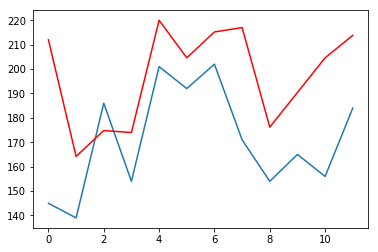

------Data extracted-----
------Data normalized-----
Community-66, Month-1, Year-2015: actual-494; preds-675.6
RMSE error: 181.60000000000002
------Data extracted-----
------Data normalized-----
Community-66, Month-2, Year-2015: actual-394; preds-513.0
RMSE error: 119.0
------Data extracted-----
------Data normalized-----
Community-66, Month-3, Year-2015: actual-496; preds-769.6
RMSE error: 273.6
------Data extracted-----
------Data normalized-----
Community-66, Month-4, Year-2015: actual-542; preds-701.0
RMSE error: 159.0
------Data extracted-----
------Data normalized-----
Community-66, Month-5, Year-2015: actual-615; preds-681.6
RMSE error: 66.60000000000002
------Data extracted-----
------Data normalized-----
Community-66, Month-6, Year-2015: actual-603; preds-739.0
RMSE error: 136.0
------Data extracted-----
------Data normalized-----
Community-66, Month-7, Year-2015: actual-527; preds-782.4
RMSE error: 255.39999999999998
------Data extracted-----
------Data normalized-----
Commun

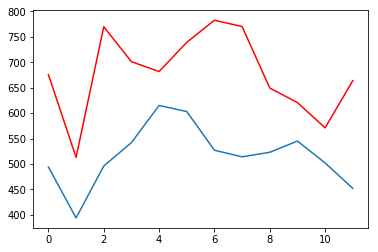

------Data extracted-----
------Data normalized-----
Community-67, Month-1, Year-2015: actual-527; preds-663.4
RMSE error: 136.39999999999998
------Data extracted-----
------Data normalized-----
Community-67, Month-2, Year-2015: actual-417; preds-586.4
RMSE error: 169.39999999999998
------Data extracted-----
------Data normalized-----
Community-67, Month-3, Year-2015: actual-622; preds-873.2
RMSE error: 251.20000000000005
------Data extracted-----
------Data normalized-----
Community-67, Month-4, Year-2015: actual-689; preds-803.4
RMSE error: 114.39999999999998
------Data extracted-----
------Data normalized-----
Community-67, Month-5, Year-2015: actual-796; preds-881.2
RMSE error: 85.20000000000005
------Data extracted-----
------Data normalized-----
Community-67, Month-6, Year-2015: actual-663; preds-742.8
RMSE error: 79.79999999999995
------Data extracted-----
------Data normalized-----
Community-67, Month-7, Year-2015: actual-720; preds-887.2
RMSE error: 167.20000000000005
------Da

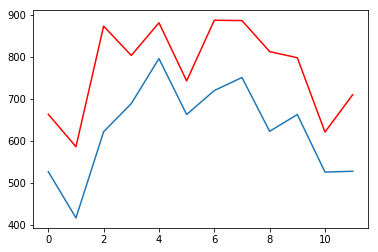

------Data extracted-----
------Data normalized-----
Community-68, Month-1, Year-2015: actual-545; preds-603.0
RMSE error: 58.0
------Data extracted-----
------Data normalized-----
Community-68, Month-2, Year-2015: actual-398; preds-542.6
RMSE error: 144.60000000000002
------Data extracted-----
------Data normalized-----
Community-68, Month-3, Year-2015: actual-565; preds-746.2
RMSE error: 181.20000000000005
------Data extracted-----
------Data normalized-----
Community-68, Month-4, Year-2015: actual-703; preds-714.2
RMSE error: 11.200000000000045
------Data extracted-----
------Data normalized-----
Community-68, Month-5, Year-2015: actual-787; preds-773.2
RMSE error: 13.799999999999955
------Data extracted-----
------Data normalized-----
Community-68, Month-6, Year-2015: actual-647; preds-798.2
RMSE error: 151.20000000000005
------Data extracted-----
------Data normalized-----
Community-68, Month-7, Year-2015: actual-633; preds-708.4
RMSE error: 75.39999999999998
------Data extracted-

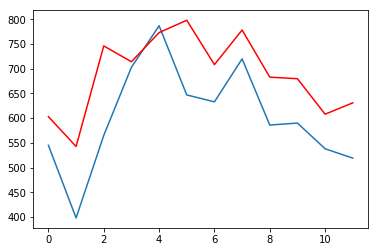

------Data extracted-----
------Data normalized-----
Community-69, Month-1, Year-2015: actual-478; preds-605.8
RMSE error: 127.79999999999995
------Data extracted-----
------Data normalized-----
Community-69, Month-2, Year-2015: actual-359; preds-594.4
RMSE error: 235.39999999999998
------Data extracted-----
------Data normalized-----
Community-69, Month-3, Year-2015: actual-592; preds-622.2
RMSE error: 30.200000000000045
------Data extracted-----
------Data normalized-----
Community-69, Month-4, Year-2015: actual-583; preds-630.2
RMSE error: 47.200000000000045
------Data extracted-----
------Data normalized-----
Community-69, Month-5, Year-2015: actual-617; preds-647.4
RMSE error: 30.399999999999977
------Data extracted-----
------Data normalized-----
Community-69, Month-6, Year-2015: actual-617; preds-699.4
RMSE error: 82.39999999999998
------Data extracted-----
------Data normalized-----
Community-69, Month-7, Year-2015: actual-589; preds-837.8
RMSE error: 248.79999999999995
------D

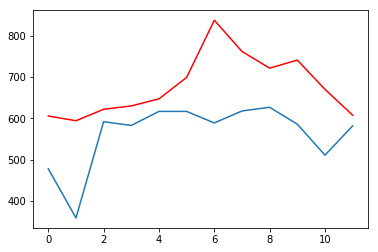

------Data extracted-----
------Data normalized-----
Community-70, Month-1, Year-2015: actual-207; preds-214.4
RMSE error: 7.400000000000006
------Data extracted-----
------Data normalized-----
Community-70, Month-2, Year-2015: actual-143; preds-183.2
RMSE error: 40.19999999999999
------Data extracted-----
------Data normalized-----
Community-70, Month-3, Year-2015: actual-170; preds-241.8
RMSE error: 71.80000000000001
------Data extracted-----
------Data normalized-----
Community-70, Month-4, Year-2015: actual-182; preds-235.4
RMSE error: 53.400000000000006
------Data extracted-----
------Data normalized-----
Community-70, Month-5, Year-2015: actual-183; preds-263.4
RMSE error: 80.39999999999998
------Data extracted-----
------Data normalized-----
Community-70, Month-6, Year-2015: actual-224; preds-263.6
RMSE error: 39.60000000000002
------Data extracted-----
------Data normalized-----
Community-70, Month-7, Year-2015: actual-181; preds-240.6
RMSE error: 59.599999999999994
------Data 

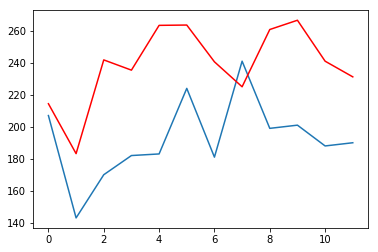

------Data extracted-----
------Data normalized-----
Community-71, Month-1, Year-2015: actual-621; preds-666.2
RMSE error: 45.200000000000045
------Data extracted-----
------Data normalized-----
Community-71, Month-2, Year-2015: actual-511; preds-591.2
RMSE error: 80.20000000000005
------Data extracted-----
------Data normalized-----
Community-71, Month-3, Year-2015: actual-633; preds-744.6
RMSE error: 111.60000000000002
------Data extracted-----
------Data normalized-----
Community-71, Month-4, Year-2015: actual-651; preds-809.4
RMSE error: 158.39999999999998
------Data extracted-----
------Data normalized-----
Community-71, Month-5, Year-2015: actual-675; preds-766.4
RMSE error: 91.39999999999998
------Data extracted-----
------Data normalized-----
Community-71, Month-6, Year-2015: actual-669; preds-802.2
RMSE error: 133.20000000000005
------Data extracted-----
------Data normalized-----
Community-71, Month-7, Year-2015: actual-661; preds-890.6
RMSE error: 229.60000000000002
------Da

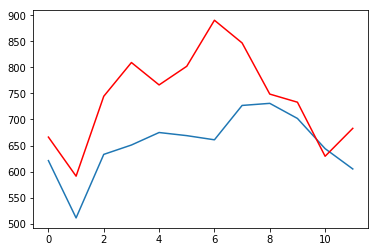

------Data extracted-----
------Data normalized-----
Community-72, Month-1, Year-2015: actual-61; preds-63.6
RMSE error: 2.6000000000000014
------Data extracted-----
------Data normalized-----
Community-72, Month-2, Year-2015: actual-61; preds-59.2
RMSE error: 1.7999999999999972
------Data extracted-----
------Data normalized-----
Community-72, Month-3, Year-2015: actual-88; preds-77.8
RMSE error: 10.200000000000003
------Data extracted-----
------Data normalized-----
Community-72, Month-4, Year-2015: actual-89; preds-81.6
RMSE error: 7.400000000000006
------Data extracted-----
------Data normalized-----
Community-72, Month-5, Year-2015: actual-133; preds-94.4
RMSE error: 38.599999999999994
------Data extracted-----
------Data normalized-----
Community-72, Month-6, Year-2015: actual-115; preds-93.6
RMSE error: 21.400000000000006
------Data extracted-----
------Data normalized-----
Community-72, Month-7, Year-2015: actual-68; preds-119.8
RMSE error: 51.8
------Data extracted-----
------

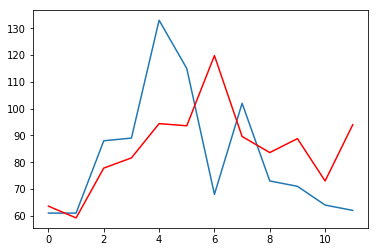

------Data extracted-----
------Data normalized-----
Community-73, Month-1, Year-2015: actual-217; preds-269.0
RMSE error: 52.0
------Data extracted-----
------Data normalized-----
Community-73, Month-2, Year-2015: actual-210; preds-237.0
RMSE error: 27.0
------Data extracted-----
------Data normalized-----
Community-73, Month-3, Year-2015: actual-270; preds-319.4
RMSE error: 49.39999999999998
------Data extracted-----
------Data normalized-----
Community-73, Month-4, Year-2015: actual-260; preds-295.6
RMSE error: 35.60000000000002
------Data extracted-----
------Data normalized-----
Community-73, Month-5, Year-2015: actual-312; preds-303.8
RMSE error: 8.199999999999989
------Data extracted-----
------Data normalized-----
Community-73, Month-6, Year-2015: actual-291; preds-318.4
RMSE error: 27.399999999999977
------Data extracted-----
------Data normalized-----
Community-73, Month-7, Year-2015: actual-266; preds-356.4
RMSE error: 90.39999999999998
------Data extracted-----
------Data n

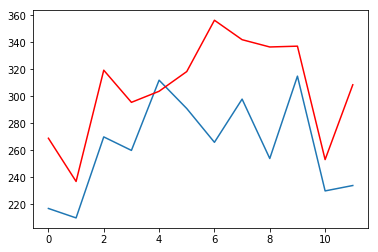

------Data extracted-----
------Data normalized-----
Community-74, Month-1, Year-2015: actual-33; preds-57.8
RMSE error: 24.799999999999997
------Data extracted-----
------Data normalized-----
Community-74, Month-2, Year-2015: actual-41; preds-41.6
RMSE error: 0.6000000000000014
------Data extracted-----
------Data normalized-----
Community-74, Month-3, Year-2015: actual-59; preds-53.0
RMSE error: 6.0
------Data extracted-----
------Data normalized-----
Community-74, Month-4, Year-2015: actual-52; preds-52.0
RMSE error: 0.0
------Data extracted-----
------Data normalized-----
Community-74, Month-5, Year-2015: actual-65; preds-66.8
RMSE error: 1.7999999999999972
------Data extracted-----
------Data normalized-----
Community-74, Month-6, Year-2015: actual-38; preds-56.8
RMSE error: 18.799999999999997
------Data extracted-----
------Data normalized-----
Community-74, Month-7, Year-2015: actual-49; preds-67.6
RMSE error: 18.599999999999994
------Data extracted-----
------Data normalized---

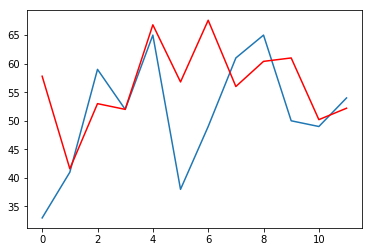

------Data extracted-----
------Data normalized-----
Community-75, Month-1, Year-2015: actual-165; preds-191.8
RMSE error: 26.80000000000001
------Data extracted-----
------Data normalized-----
Community-75, Month-2, Year-2015: actual-116; preds-162.4
RMSE error: 46.400000000000006
------Data extracted-----
------Data normalized-----
Community-75, Month-3, Year-2015: actual-162; preds-190.2
RMSE error: 28.19999999999999
------Data extracted-----
------Data normalized-----
Community-75, Month-4, Year-2015: actual-171; preds-218.2
RMSE error: 47.19999999999999
------Data extracted-----
------Data normalized-----
Community-75, Month-5, Year-2015: actual-194; preds-254.2
RMSE error: 60.19999999999999
------Data extracted-----
------Data normalized-----
Community-75, Month-6, Year-2015: actual-192; preds-241.8
RMSE error: 49.80000000000001
------Data extracted-----
------Data normalized-----
Community-75, Month-7, Year-2015: actual-200; preds-250.0
RMSE error: 50.0
------Data extracted-----

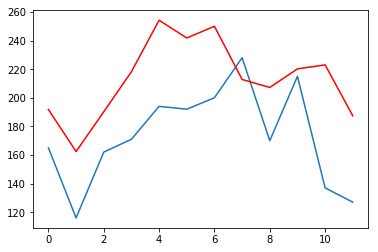

------Data extracted-----
------Data normalized-----
Community-76, Month-1, Year-2015: actual-150; preds-143.6
RMSE error: 6.400000000000006
------Data extracted-----
------Data normalized-----
Community-76, Month-2, Year-2015: actual-137; preds-131.2
RMSE error: 5.800000000000011
------Data extracted-----
------Data normalized-----
Community-76, Month-3, Year-2015: actual-147; preds-156.2
RMSE error: 9.199999999999989
------Data extracted-----
------Data normalized-----
Community-76, Month-4, Year-2015: actual-141; preds-141.0
RMSE error: 0.0
------Data extracted-----
------Data normalized-----
Community-76, Month-5, Year-2015: actual-151; preds-156.2
RMSE error: 5.199999999999989
------Data extracted-----
------Data normalized-----
Community-76, Month-6, Year-2015: actual-161; preds-177.8
RMSE error: 16.80000000000001
------Data extracted-----
------Data normalized-----
Community-76, Month-7, Year-2015: actual-137; preds-185.0
RMSE error: 48.0
------Data extracted-----
------Data nor

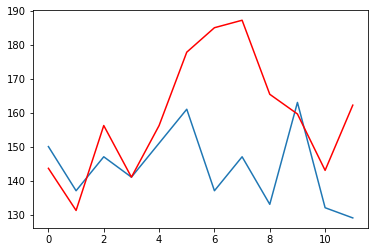

------Data extracted-----
------Data normalized-----
Community-77, Month-1, Year-2015: actual-153; preds-266.6
RMSE error: 113.60000000000002
------Data extracted-----
------Data normalized-----
Community-77, Month-2, Year-2015: actual-139; preds-231.4
RMSE error: 92.4
------Data extracted-----
------Data normalized-----
Community-77, Month-3, Year-2015: actual-191; preds-197.8
RMSE error: 6.800000000000011
------Data extracted-----
------Data normalized-----
Community-77, Month-4, Year-2015: actual-183; preds-267.2
RMSE error: 84.19999999999999
------Data extracted-----
------Data normalized-----
Community-77, Month-5, Year-2015: actual-198; preds-247.0
RMSE error: 49.0
------Data extracted-----
------Data normalized-----
Community-77, Month-6, Year-2015: actual-163; preds-223.2
RMSE error: 60.19999999999999
------Data extracted-----
------Data normalized-----
Community-77, Month-7, Year-2015: actual-209; preds-248.8
RMSE error: 39.80000000000001
------Data extracted-----
------Data n

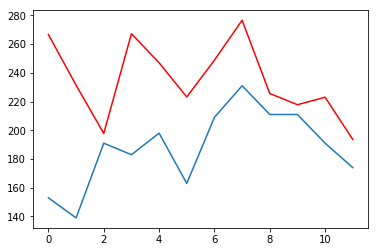

In [63]:
tot_tr_2 = []
tot_pred_2 = []

for c in tqdm_notebook(range(1,78), leave=False):
    
    c_tr = []
    c_pd = []
    for month in tqdm_notebook(range(1,13)):
        
        X_train = X_tot[month-1][c-1]
        y_train = y_tot[month-1][c-1]
        
        X_test = get_features(c, 2015, month, top, sim_method)
        y_test = get_ys(c, 2015, month)
        
        X_test = np.array(X_test)
        y_test = np.array(y_test, ndmin=1)
        
        print('------Data extracted-----')
        
        sc = MinMaxScaler(feature_range=(0, 1))
        X_train_norm = sc.fit_transform(X_train)
        X_test_norm = sc.transform(X_test.reshape(1, -1))
        
        print('------Data normalized-----')
        
        clf = RandomForestRegressor(max_depth=best_d, n_estimators=best_n)
        clf.fit(X_train_poly, y_train)
        
        preds = clf.predict(X_test_poly.reshape(1, -1))
        
        print('Community-{}, Month-{}, Year-{}: actual-{}; preds-{}'.format(c, month, 2015, y_test[0], preds[0]))
        print('RMSE error: {}'.format(mean_squared_error(y_test, preds) ** .5))
        
        c_tr.append(y_test[0])
        c_pd.append(preds[0])
        
    plt.plot(c_tr)
    plt.plot(c_pd, color='red')
    plt.show()
    
    tot_tr_2 = tot_tr_2 + c_tr
    tot_pred_2 = tot_pred_2 + c_pd

In [64]:
rmse_3 = mean_squared_error(tot_tr_2, tot_pred_2) ** .5
rmse_3

86.19998669157499

## XG BOOST

In [66]:
#using January data to hyper-parameter tune our regressor

n_estimators = [5, 10, 50, 100, 200, 250]
max_depth = [2, 3, 4, 5, 6, 7, 8]

results = {}

for n in tqdm_notebook(n_estimators):
    
    results[n] = {}
    for d in tqdm_notebook(max_depth, leave=False):
        
        tru = []
        pde = []
        for c in range(1,78):
    
            X_train = X_tot[0][c-1]
            y_train = y_tot[0][c-1]

            X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

            sc = MinMaxScaler(feature_range=(0, 1))
            X_train_norm = sc.fit_transform(X_train)
            X_cv_norm = sc.transform(X_cv.reshape(1, -1))

            clf = xgb.XGBRegressor(n_estimators=n, max_depth=d, objective='reg:squarederror')
            clf.fit(X_train_norm, y_train)

            preds = clf.predict(X_cv_norm)

            tru.extend(y_cv)
            pde.extend(preds)
        
        err = mean_squared_error(tru, pde) ** .5
        
        results[n][d] = err

In [67]:
error = 100000
for key in results:
    for key1 in results[key]:
        if results[key][key1] < error:
            best_n = key
            best_d = key1
            error = results[key][key1]

In [68]:
print('Best est: {}, Best depth: {}'.format(best_n, best_d))

Best est: 100, Best depth: 2


------Data extracted-----
------Data normalized-----
[04:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-1, Month-1, Year-2015: actual-292; preds-283.439453125
RMSE error: 8.560546875
------Data extracted-----
------Data normalized-----
[04:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-1, Month-2, Year-2015: actual-244; preds-249.00596618652344
RMSE error: 5.0059661865234375
------Data extracted-----
------Data normalized-----
[04:37:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-1, Month-3, Year-2015: actual-291; preds-359.5906677246094
RMSE error: 68.59066772460938
------Data extracted-----
------Data normalized-----
[04:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

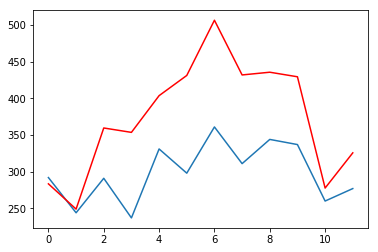

------Data extracted-----
------Data normalized-----
[04:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-2, Month-1, Year-2015: actual-248; preds-331.12310791015625
RMSE error: 83.12310791015625
------Data extracted-----
------Data normalized-----
[04:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-2, Month-2, Year-2015: actual-220; preds-278.60906982421875
RMSE error: 58.60906982421875
------Data extracted-----
------Data normalized-----
[04:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-2, Month-3, Year-2015: actual-239; preds-344.2587585449219
RMSE error: 105.25875854492188
------Data extracted-----
------Data normalized-----
[04:39:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

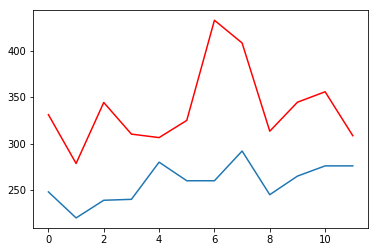

------Data extracted-----
------Data normalized-----
[04:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-3, Month-1, Year-2015: actual-242; preds-308.65576171875
RMSE error: 66.65576171875
------Data extracted-----
------Data normalized-----
[04:41:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-3, Month-2, Year-2015: actual-208; preds-253.96461486816406
RMSE error: 45.96461486816406
------Data extracted-----
------Data normalized-----
[04:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-3, Month-3, Year-2015: actual-275; preds-307.9486083984375
RMSE error: 32.9486083984375
------Data extracted-----
------Data normalized-----
[04:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:sq

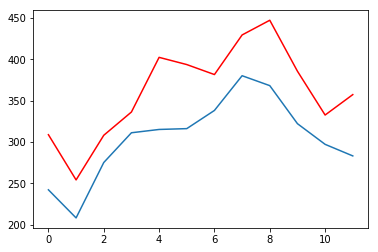

------Data extracted-----
------Data normalized-----
[04:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-4, Month-1, Year-2015: actual-156; preds-145.33570861816406
RMSE error: 10.664291381835938
------Data extracted-----
------Data normalized-----
[04:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-4, Month-2, Year-2015: actual-110; preds-169.22689819335938
RMSE error: 59.226898193359375
------Data extracted-----
------Data normalized-----
[04:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-4, Month-3, Year-2015: actual-134; preds-148.67918395996094
RMSE error: 14.679183959960938
------Data extracted-----
------Data normalized-----
[04:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

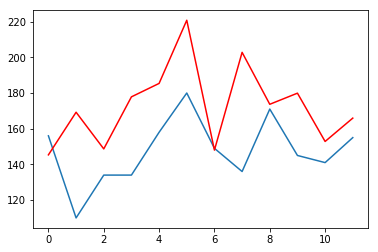

------Data extracted-----
------Data normalized-----
[04:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-5, Month-1, Year-2015: actual-112; preds-121.75688934326172
RMSE error: 9.756889343261719
------Data extracted-----
------Data normalized-----
[04:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-5, Month-2, Year-2015: actual-93; preds-140.2292022705078
RMSE error: 47.22920227050781
------Data extracted-----
------Data normalized-----
[04:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-5, Month-3, Year-2015: actual-105; preds-120.45012664794922
RMSE error: 15.450126647949219
------Data extracted-----
------Data normalized-----
[04:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

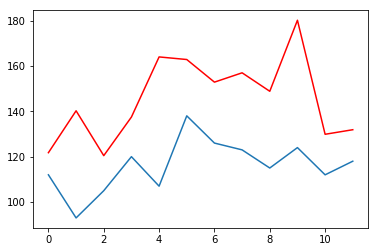

------Data extracted-----
------Data normalized-----
[04:46:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-6, Month-1, Year-2015: actual-378; preds-361.5024108886719
RMSE error: 16.497589111328125
------Data extracted-----
------Data normalized-----
[04:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-6, Month-2, Year-2015: actual-279; preds-326.0552673339844
RMSE error: 47.055267333984375
------Data extracted-----
------Data normalized-----
[04:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-6, Month-3, Year-2015: actual-398; preds-485.38385009765625
RMSE error: 87.38385009765625
------Data extracted-----
------Data normalized-----
[04:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

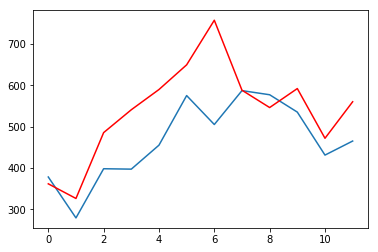

------Data extracted-----
------Data normalized-----
[04:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-7, Month-1, Year-2015: actual-255; preds-316.9541931152344
RMSE error: 61.954193115234375
------Data extracted-----
------Data normalized-----
[04:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-7, Month-2, Year-2015: actual-225; preds-308.5491943359375
RMSE error: 83.5491943359375
------Data extracted-----
------Data normalized-----
[04:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-7, Month-3, Year-2015: actual-304; preds-317.31219482421875
RMSE error: 13.31219482421875
------Data extracted-----
------Data normalized-----
[04:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

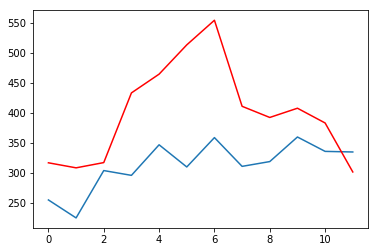

------Data extracted-----
------Data normalized-----
[04:50:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-8, Month-1, Year-2015: actual-685; preds-694.5877075195312
RMSE error: 9.58770751953125
------Data extracted-----
------Data normalized-----
[04:50:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-8, Month-2, Year-2015: actual-534; preds-633.018310546875
RMSE error: 99.018310546875
------Data extracted-----
------Data normalized-----
[04:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-8, Month-3, Year-2015: actual-666; preds-810.5941772460938
RMSE error: 144.59417724609375
------Data extracted-----
------Data normalized-----
[04:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:

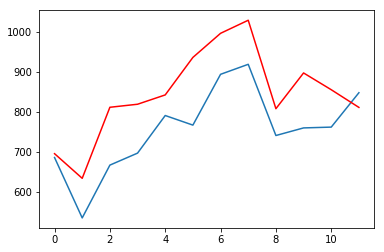

------Data extracted-----
------Data normalized-----
[04:52:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-9, Month-1, Year-2015: actual-19; preds-29.82138442993164
RMSE error: 10.82138442993164
------Data extracted-----
------Data normalized-----
[04:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-9, Month-2, Year-2015: actual-14; preds-28.197277069091797
RMSE error: 14.197277069091797
------Data extracted-----
------Data normalized-----
[04:53:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-9, Month-3, Year-2015: actual-33; preds-19.97519874572754
RMSE error: 13.024801254272461
------Data extracted-----
------Data normalized-----
[04:53:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of r

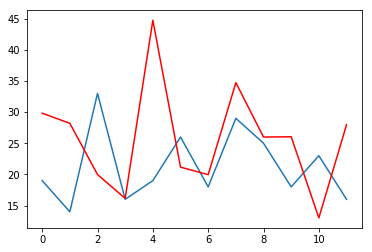

------Data extracted-----
------Data normalized-----
[04:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-10, Month-1, Year-2015: actual-105; preds-74.26941680908203
RMSE error: 30.73058319091797
------Data extracted-----
------Data normalized-----
[04:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-10, Month-2, Year-2015: actual-76; preds-87.91777038574219
RMSE error: 11.917770385742188
------Data extracted-----
------Data normalized-----
[04:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-10, Month-3, Year-2015: actual-106; preds-135.37200927734375
RMSE error: 29.37200927734375
------Data extracted-----
------Data normalized-----
[04:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

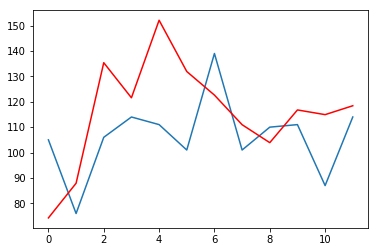

------Data extracted-----
------Data normalized-----
[04:56:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-11, Month-1, Year-2015: actual-91; preds-101.99555969238281
RMSE error: 10.995559692382812
------Data extracted-----
------Data normalized-----
[04:56:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-11, Month-2, Year-2015: actual-88; preds-75.64823913574219
RMSE error: 12.351760864257812
------Data extracted-----
------Data normalized-----
[04:57:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-11, Month-3, Year-2015: actual-87; preds-84.9864730834961
RMSE error: 2.0135269165039062
------Data extracted-----
------Data normalized-----
[04:57:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

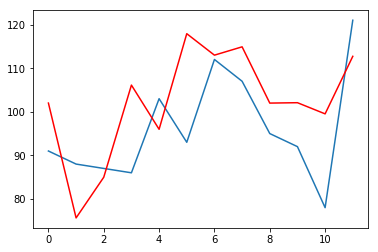

------Data extracted-----
------Data normalized-----
[04:58:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-12, Month-1, Year-2015: actual-36; preds-59.6246337890625
RMSE error: 23.6246337890625
------Data extracted-----
------Data normalized-----
[04:58:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-12, Month-2, Year-2015: actual-28; preds-46.7298583984375
RMSE error: 18.7298583984375
------Data extracted-----
------Data normalized-----
[04:59:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-12, Month-3, Year-2015: actual-30; preds-47.2091178894043
RMSE error: 17.209117889404297
------Data extracted-----
------Data normalized-----
[04:59:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:s

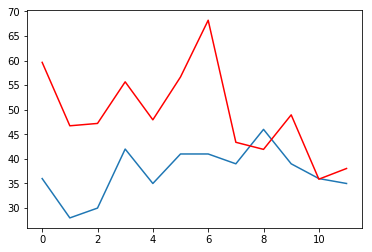

------Data extracted-----
------Data normalized-----
[05:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-13, Month-1, Year-2015: actual-76; preds-70.56700897216797
RMSE error: 5.432991027832031
------Data extracted-----
------Data normalized-----
[05:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-13, Month-2, Year-2015: actual-61; preds-56.98995590209961
RMSE error: 4.010044097900391
------Data extracted-----
------Data normalized-----
[05:01:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-13, Month-3, Year-2015: actual-59; preds-87.06900024414062
RMSE error: 28.069000244140625
------Data extracted-----
------Data normalized-----
[05:01:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

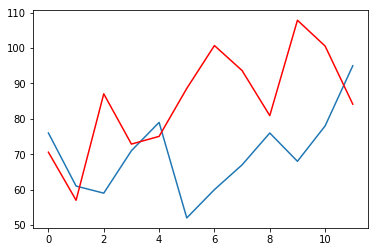

------Data extracted-----
------Data normalized-----
[05:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-14, Month-1, Year-2015: actual-183; preds-171.8861541748047
RMSE error: 11.113845825195312
------Data extracted-----
------Data normalized-----
[05:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-14, Month-2, Year-2015: actual-189; preds-196.86312866210938
RMSE error: 7.863128662109375
------Data extracted-----
------Data normalized-----
[05:03:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-14, Month-3, Year-2015: actual-221; preds-212.6969451904297
RMSE error: 8.303054809570312
------Data extracted-----
------Data normalized-----
[05:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

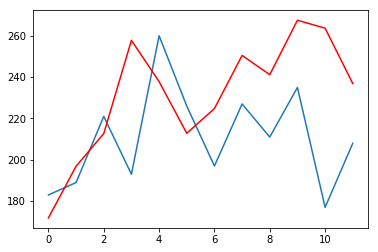

------Data extracted-----
------Data normalized-----
[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-15, Month-1, Year-2015: actual-313; preds-287.25848388671875
RMSE error: 25.74151611328125
------Data extracted-----
------Data normalized-----
[05:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-15, Month-2, Year-2015: actual-234; preds-226.81263732910156
RMSE error: 7.1873626708984375
------Data extracted-----
------Data normalized-----
[05:05:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-15, Month-3, Year-2015: actual-285; preds-288.2483215332031
RMSE error: 3.248321533203125
------Data extracted-----
------Data normalized-----
[05:05:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

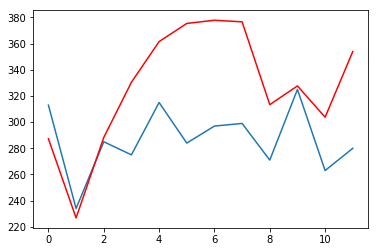

------Data extracted-----
------Data normalized-----
[05:06:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-16, Month-1, Year-2015: actual-245; preds-255.3894500732422
RMSE error: 10.389450073242188
------Data extracted-----
------Data normalized-----
[05:06:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-16, Month-2, Year-2015: actual-233; preds-264.0189514160156
RMSE error: 31.018951416015625
------Data extracted-----
------Data normalized-----
[05:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-16, Month-3, Year-2015: actual-261; preds-314.53411865234375
RMSE error: 53.53411865234375
------Data extracted-----
------Data normalized-----
[05:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

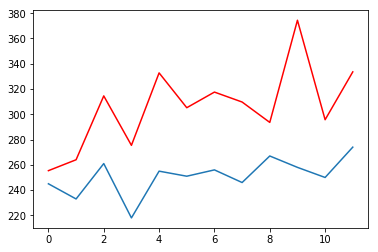

------Data extracted-----
------Data normalized-----
[05:08:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-17, Month-1, Year-2015: actual-146; preds-124.85433197021484
RMSE error: 21.145668029785156
------Data extracted-----
------Data normalized-----
[05:08:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-17, Month-2, Year-2015: actual-111; preds-111.1327133178711
RMSE error: 0.13271331787109375
------Data extracted-----
------Data normalized-----
[05:08:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-17, Month-3, Year-2015: actual-135; preds-159.8651580810547
RMSE error: 24.865158081054688
------Data extracted-----
------Data normalized-----
[05:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fa

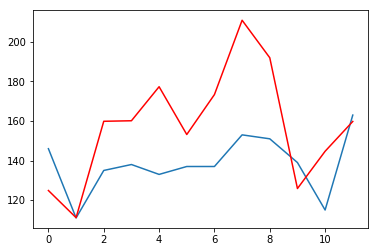

------Data extracted-----
------Data normalized-----
[05:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-18, Month-1, Year-2015: actual-48; preds-33.944053649902344
RMSE error: 14.055946350097656
------Data extracted-----
------Data normalized-----
[05:10:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-18, Month-2, Year-2015: actual-36; preds-43.03165817260742
RMSE error: 7.031658172607422
------Data extracted-----
------Data normalized-----
[05:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-18, Month-3, Year-2015: actual-59; preds-44.855594635009766
RMSE error: 14.144405364990234
------Data extracted-----
------Data normalized-----
[05:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

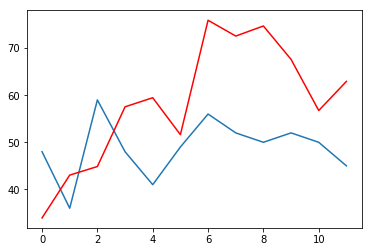

------Data extracted-----
------Data normalized-----
[05:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-19, Month-1, Year-2015: actual-407; preds-404.6129150390625
RMSE error: 2.3870849609375
------Data extracted-----
------Data normalized-----
[05:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-19, Month-2, Year-2015: actual-309; preds-315.68817138671875
RMSE error: 6.68817138671875
------Data extracted-----
------Data normalized-----
[05:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-19, Month-3, Year-2015: actual-414; preds-426.16510009765625
RMSE error: 12.16510009765625
------Data extracted-----
------Data normalized-----
[05:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

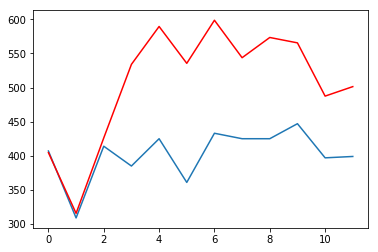

------Data extracted-----
------Data normalized-----
[05:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-20, Month-1, Year-2015: actual-174; preds-149.11305236816406
RMSE error: 24.886947631835938
------Data extracted-----
------Data normalized-----
[05:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-20, Month-2, Year-2015: actual-106; preds-124.02262115478516
RMSE error: 18.022621154785156
------Data extracted-----
------Data normalized-----
[05:14:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-20, Month-3, Year-2015: actual-150; preds-159.8907012939453
RMSE error: 9.890701293945312
------Data extracted-----
------Data normalized-----
[05:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

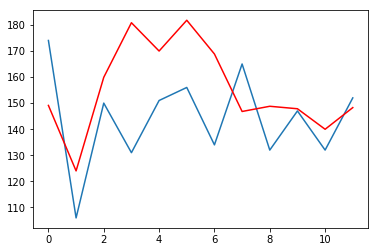

------Data extracted-----
------Data normalized-----
[05:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-21, Month-1, Year-2015: actual-218; preds-194.51605224609375
RMSE error: 23.48394775390625
------Data extracted-----
------Data normalized-----
[05:16:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-21, Month-2, Year-2015: actual-164; preds-148.98745727539062
RMSE error: 15.012542724609375
------Data extracted-----
------Data normalized-----
[05:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-21, Month-3, Year-2015: actual-180; preds-283.4292907714844
RMSE error: 103.42929077148438
------Data extracted-----
------Data normalized-----
[05:17:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

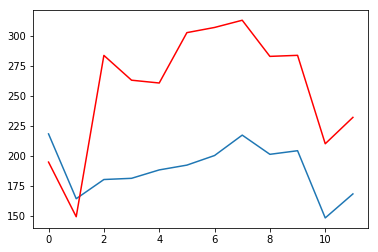

------Data extracted-----
------Data normalized-----
[05:18:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-22, Month-1, Year-2015: actual-383; preds-426.1625671386719
RMSE error: 43.162567138671875
------Data extracted-----
------Data normalized-----
[05:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-22, Month-2, Year-2015: actual-324; preds-459.812744140625
RMSE error: 135.812744140625
------Data extracted-----
------Data normalized-----
[05:18:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-22, Month-3, Year-2015: actual-391; preds-554.526611328125
RMSE error: 163.526611328125
------Data extracted-----
------Data normalized-----
[05:19:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of r

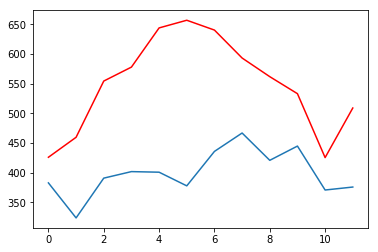

------Data extracted-----
------Data normalized-----
[05:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-23, Month-1, Year-2015: actual-684; preds-696.2028198242188
RMSE error: 12.20281982421875
------Data extracted-----
------Data normalized-----
[05:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-23, Month-2, Year-2015: actual-549; preds-663.2643432617188
RMSE error: 114.26434326171875
------Data extracted-----
------Data normalized-----
[05:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-23, Month-3, Year-2015: actual-739; preds-766.8017578125
RMSE error: 27.8017578125
------Data extracted-----
------Data normalized-----
[05:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:

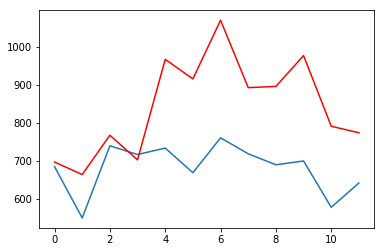

------Data extracted-----
------Data normalized-----
[05:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-24, Month-1, Year-2015: actual-517; preds-784.0010986328125
RMSE error: 267.0010986328125
------Data extracted-----
------Data normalized-----
[05:22:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-24, Month-2, Year-2015: actual-419; preds-554.58544921875
RMSE error: 135.58544921875
------Data extracted-----
------Data normalized-----
[05:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-24, Month-3, Year-2015: actual-483; preds-783.18310546875
RMSE error: 300.18310546875
------Data extracted-----
------Data normalized-----
[05:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:sq

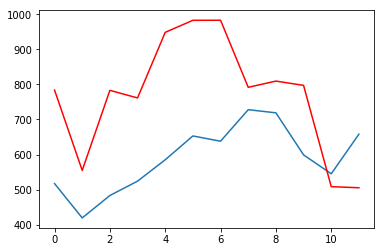

------Data extracted-----
------Data normalized-----
[05:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-25, Month-1, Year-2015: actual-1442; preds-1327.494873046875
RMSE error: 114.505126953125
------Data extracted-----
------Data normalized-----
[05:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-25, Month-2, Year-2015: actual-1123; preds-1181.53759765625
RMSE error: 58.53759765625
------Data extracted-----
------Data normalized-----
[05:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-25, Month-3, Year-2015: actual-1418; preds-1759.6614990234375
RMSE error: 341.6614990234375
------Data extracted-----
------Data normalized-----
[05:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

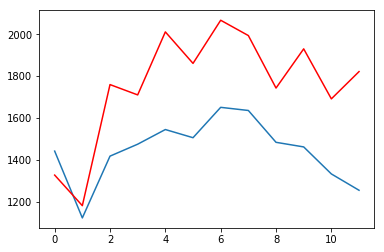

------Data extracted-----
------Data normalized-----
[05:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-26, Month-1, Year-2015: actual-549; preds-463.92388916015625
RMSE error: 85.07611083984375
------Data extracted-----
------Data normalized-----
[05:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-26, Month-2, Year-2015: actual-419; preds-410.9991455078125
RMSE error: 8.0008544921875
------Data extracted-----
------Data normalized-----
[05:26:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-26, Month-3, Year-2015: actual-563; preds-531.9652709960938
RMSE error: 31.03472900390625
------Data extracted-----
------Data normalized-----
[05:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

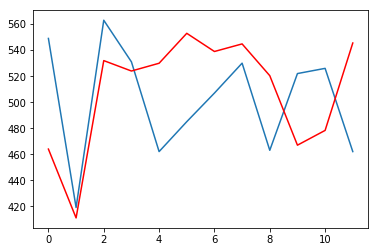

------Data extracted-----
------Data normalized-----
[05:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-27, Month-1, Year-2015: actual-410; preds-530.582763671875
RMSE error: 120.582763671875
------Data extracted-----
------Data normalized-----
[05:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-27, Month-2, Year-2015: actual-340; preds-406.0519104003906
RMSE error: 66.05191040039062
------Data extracted-----
------Data normalized-----
[05:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-27, Month-3, Year-2015: actual-480; preds-520.5874633789062
RMSE error: 40.58746337890625
------Data extracted-----
------Data normalized-----
[05:29:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

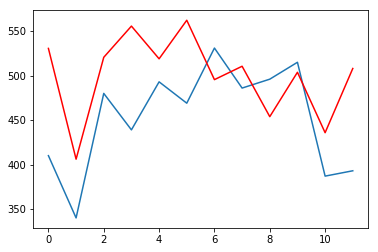

------Data extracted-----
------Data normalized-----
[05:30:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-28, Month-1, Year-2015: actual-576; preds-628.8251953125
RMSE error: 52.8251953125
------Data extracted-----
------Data normalized-----
[05:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-28, Month-2, Year-2015: actual-428; preds-533.68994140625
RMSE error: 105.68994140625
------Data extracted-----
------Data normalized-----
[05:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-28, Month-3, Year-2015: actual-610; preds-799.0194091796875
RMSE error: 189.0194091796875
------Data extracted-----
------Data normalized-----
[05:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

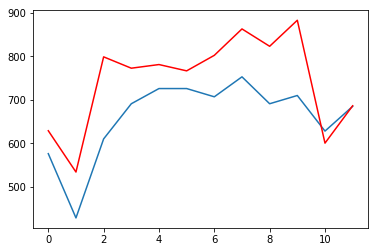

------Data extracted-----
------Data normalized-----
[05:32:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-29, Month-1, Year-2015: actual-614; preds-586.223388671875
RMSE error: 27.776611328125
------Data extracted-----
------Data normalized-----
[05:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-29, Month-2, Year-2015: actual-481; preds-574.9296264648438
RMSE error: 93.92962646484375
------Data extracted-----
------Data normalized-----
[05:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-29, Month-3, Year-2015: actual-718; preds-638.9252319335938
RMSE error: 79.07476806640625
------Data extracted-----
------Data normalized-----
[05:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of r

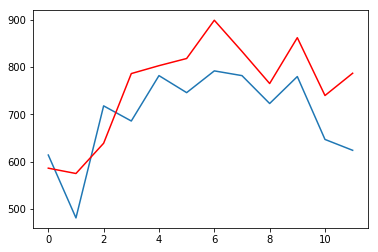

------Data extracted-----
------Data normalized-----
[05:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-30, Month-1, Year-2015: actual-308; preds-371.7226867675781
RMSE error: 63.722686767578125
------Data extracted-----
------Data normalized-----
[05:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-30, Month-2, Year-2015: actual-247; preds-308.8273620605469
RMSE error: 61.827362060546875
------Data extracted-----
------Data normalized-----
[05:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-30, Month-3, Year-2015: actual-389; preds-426.6954040527344
RMSE error: 37.695404052734375
------Data extracted-----
------Data normalized-----
[05:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

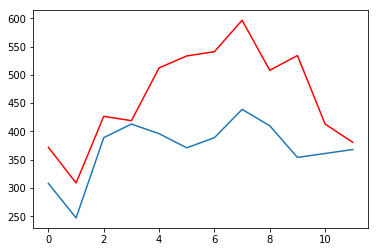

------Data extracted-----
------Data normalized-----
[05:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-31, Month-1, Year-2015: actual-171; preds-220.953369140625
RMSE error: 49.953369140625
------Data extracted-----
------Data normalized-----
[05:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-31, Month-2, Year-2015: actual-168; preds-183.9802703857422
RMSE error: 15.980270385742188
------Data extracted-----
------Data normalized-----
[05:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-31, Month-3, Year-2015: actual-202; preds-230.00076293945312
RMSE error: 28.000762939453125
------Data extracted-----
------Data normalized-----
[05:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

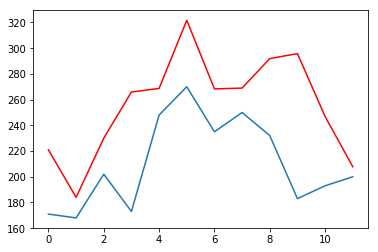

------Data extracted-----
------Data normalized-----
[05:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-32, Month-1, Year-2015: actual-531; preds-523.95458984375
RMSE error: 7.04541015625
------Data extracted-----
------Data normalized-----
[05:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-32, Month-2, Year-2015: actual-397; preds-471.60552978515625
RMSE error: 74.60552978515625
------Data extracted-----
------Data normalized-----
[05:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-32, Month-3, Year-2015: actual-573; preds-582.3846435546875
RMSE error: 9.3846435546875
------Data extracted-----
------Data normalized-----
[05:39:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:s

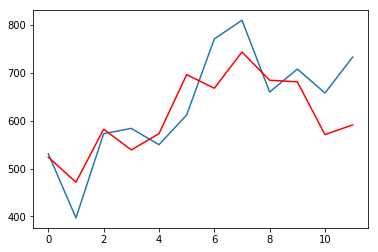

------Data extracted-----
------Data normalized-----
[05:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-33, Month-1, Year-2015: actual-157; preds-147.36134338378906
RMSE error: 9.638656616210938
------Data extracted-----
------Data normalized-----
[05:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-33, Month-2, Year-2015: actual-117; preds-118.9405746459961
RMSE error: 1.9405746459960938
------Data extracted-----
------Data normalized-----
[05:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-33, Month-3, Year-2015: actual-131; preds-128.98704528808594
RMSE error: 2.0129547119140625
------Data extracted-----
------Data normalized-----
[05:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

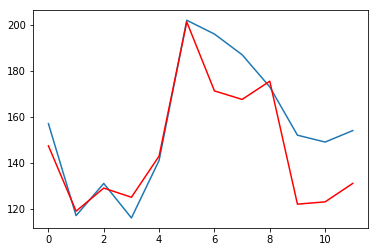

------Data extracted-----
------Data normalized-----
[05:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-34, Month-1, Year-2015: actual-90; preds-83.99170684814453
RMSE error: 6.008293151855469
------Data extracted-----
------Data normalized-----
[05:42:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-34, Month-2, Year-2015: actual-61; preds-70.01702880859375
RMSE error: 9.01702880859375
------Data extracted-----
------Data normalized-----
[05:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-34, Month-3, Year-2015: actual-81; preds-117.8746109008789
RMSE error: 36.874610900878906
------Data extracted-----
------Data normalized-----
[05:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of r

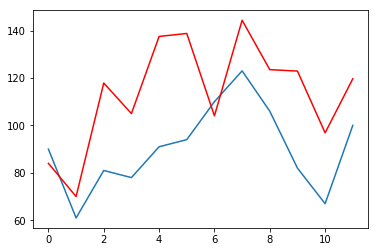

------Data extracted-----
------Data normalized-----
[05:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-35, Month-1, Year-2015: actual-202; preds-175.4666290283203
RMSE error: 26.533370971679688
------Data extracted-----
------Data normalized-----
[05:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-35, Month-2, Year-2015: actual-143; preds-162.55809020996094
RMSE error: 19.558090209960938
------Data extracted-----
------Data normalized-----
[05:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-35, Month-3, Year-2015: actual-212; preds-241.07675170898438
RMSE error: 29.076751708984375
------Data extracted-----
------Data normalized-----
[05:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fa

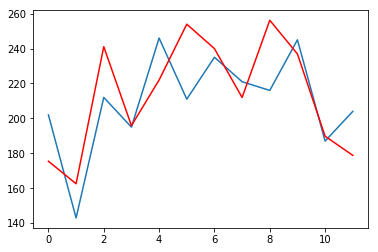

------Data extracted-----
------Data normalized-----
[05:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-36, Month-1, Year-2015: actual-49; preds-41.63064193725586
RMSE error: 7.369358062744141
------Data extracted-----
------Data normalized-----
[05:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-36, Month-2, Year-2015: actual-23; preds-34.072044372558594
RMSE error: 11.072044372558594
------Data extracted-----
------Data normalized-----
[05:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-36, Month-3, Year-2015: actual-48; preds-41.99198913574219
RMSE error: 6.0080108642578125
------Data extracted-----
------Data normalized-----
[05:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

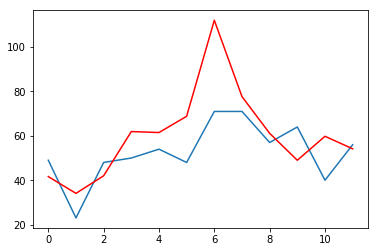

------Data extracted-----
------Data normalized-----
[05:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-37, Month-1, Year-2015: actual-62; preds-65.43850708007812
RMSE error: 3.438507080078125
------Data extracted-----
------Data normalized-----
[05:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-37, Month-2, Year-2015: actual-51; preds-67.23703002929688
RMSE error: 16.237030029296875
------Data extracted-----
------Data normalized-----
[05:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-37, Month-3, Year-2015: actual-67; preds-80.94654083251953
RMSE error: 13.946540832519531
------Data extracted-----
------Data normalized-----
[05:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

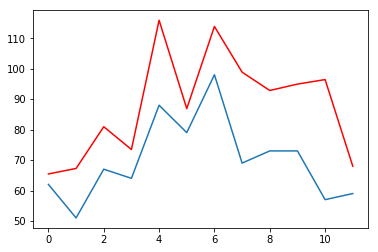

------Data extracted-----
------Data normalized-----
[05:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-38, Month-1, Year-2015: actual-224; preds-272.6107177734375
RMSE error: 48.6107177734375
------Data extracted-----
------Data normalized-----
[05:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-38, Month-2, Year-2015: actual-196; preds-258.9555358886719
RMSE error: 62.955535888671875
------Data extracted-----
------Data normalized-----
[05:50:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-38, Month-3, Year-2015: actual-234; preds-384.9962463378906
RMSE error: 150.99624633789062
------Data extracted-----
------Data normalized-----
[05:50:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

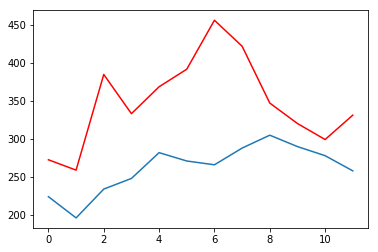

------Data extracted-----
------Data normalized-----
[05:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-39, Month-1, Year-2015: actual-115; preds-152.13465881347656
RMSE error: 37.13465881347656
------Data extracted-----
------Data normalized-----
[05:52:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-39, Month-2, Year-2015: actual-80; preds-120.49880981445312
RMSE error: 40.498809814453125
------Data extracted-----
------Data normalized-----
[05:52:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-39, Month-3, Year-2015: actual-119; preds-115.17868041992188
RMSE error: 3.821319580078125
------Data extracted-----
------Data normalized-----
[05:52:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

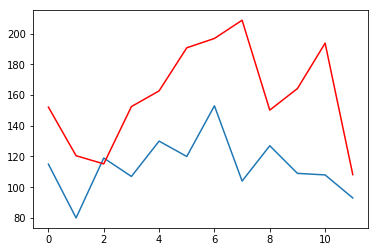

------Data extracted-----
------Data normalized-----
[05:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-40, Month-1, Year-2015: actual-206; preds-213.21957397460938
RMSE error: 7.219573974609375
------Data extracted-----
------Data normalized-----
[05:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-40, Month-2, Year-2015: actual-150; preds-235.9825897216797
RMSE error: 85.98258972167969
------Data extracted-----
------Data normalized-----
[05:54:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-40, Month-3, Year-2015: actual-219; preds-339.134521484375
RMSE error: 120.134521484375
------Data extracted-----
------Data normalized-----
[05:54:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

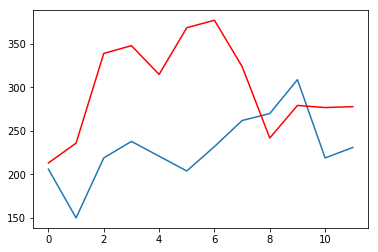

------Data extracted-----
------Data normalized-----
[05:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-41, Month-1, Year-2015: actual-115; preds-136.87440490722656
RMSE error: 21.874404907226562
------Data extracted-----
------Data normalized-----
[05:56:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-41, Month-2, Year-2015: actual-72; preds-102.8466796875
RMSE error: 30.8466796875
------Data extracted-----
------Data normalized-----
[05:56:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-41, Month-3, Year-2015: actual-117; preds-113.87997436523438
RMSE error: 3.120025634765625
------Data extracted-----
------Data normalized-----
[05:56:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg

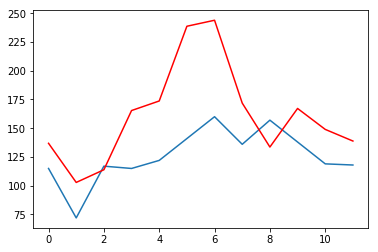

------Data extracted-----
------Data normalized-----
[05:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-42, Month-1, Year-2015: actual-295; preds-389.78387451171875
RMSE error: 94.78387451171875
------Data extracted-----
------Data normalized-----
[05:58:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-42, Month-2, Year-2015: actual-204; preds-352.8436584472656
RMSE error: 148.84365844726562
------Data extracted-----
------Data normalized-----
[05:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-42, Month-3, Year-2015: actual-314; preds-447.0150146484375
RMSE error: 133.0150146484375
------Data extracted-----
------Data normalized-----
[05:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

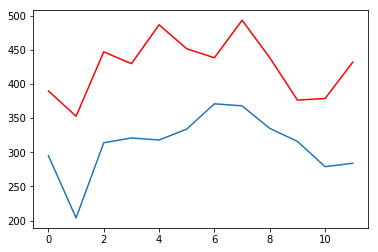

------Data extracted-----
------Data normalized-----
[06:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-43, Month-1, Year-2015: actual-816; preds-832.7029418945312
RMSE error: 16.70294189453125
------Data extracted-----
------Data normalized-----
[06:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-43, Month-2, Year-2015: actual-585; preds-583.3115844726562
RMSE error: 1.68841552734375
------Data extracted-----
------Data normalized-----
[06:00:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-43, Month-3, Year-2015: actual-799; preds-775.5180053710938
RMSE error: 23.48199462890625
------Data extracted-----
------Data normalized-----
[06:00:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

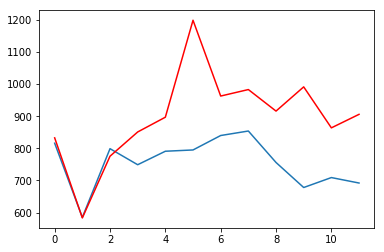

------Data extracted-----
------Data normalized-----
[06:02:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-44, Month-1, Year-2015: actual-446; preds-436.9552001953125
RMSE error: 9.0447998046875
------Data extracted-----
------Data normalized-----
[06:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-44, Month-2, Year-2015: actual-397; preds-375.92657470703125
RMSE error: 21.07342529296875
------Data extracted-----
------Data normalized-----
[06:02:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-44, Month-3, Year-2015: actual-532; preds-573.5614013671875
RMSE error: 41.5614013671875
------Data extracted-----
------Data normalized-----
[06:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

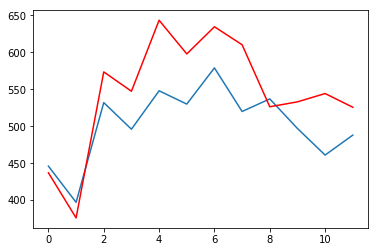

------Data extracted-----
------Data normalized-----
[06:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-45, Month-1, Year-2015: actual-101; preds-119.04548645019531
RMSE error: 18.045486450195312
------Data extracted-----
------Data normalized-----
[06:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-45, Month-2, Year-2015: actual-95; preds-100.8874740600586
RMSE error: 5.887474060058594
------Data extracted-----
------Data normalized-----
[06:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-45, Month-3, Year-2015: actual-151; preds-161.79368591308594
RMSE error: 10.793685913085938
------Data extracted-----
------Data normalized-----
[06:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

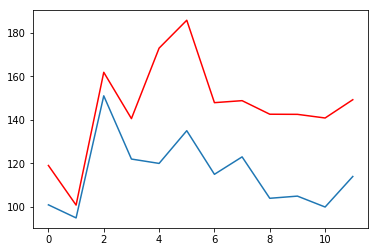

------Data extracted-----
------Data normalized-----
[06:06:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-46, Month-1, Year-2015: actual-400; preds-326.1139221191406
RMSE error: 73.88607788085938
------Data extracted-----
------Data normalized-----
[06:06:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-46, Month-2, Year-2015: actual-318; preds-280.9510803222656
RMSE error: 37.048919677734375
------Data extracted-----
------Data normalized-----
[06:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-46, Month-3, Year-2015: actual-406; preds-450.51068115234375
RMSE error: 44.51068115234375
------Data extracted-----
------Data normalized-----
[06:06:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

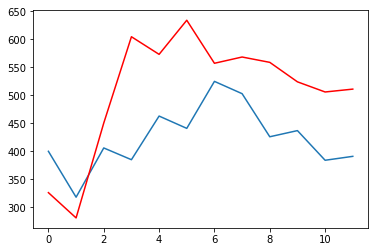

------Data extracted-----
------Data normalized-----
[06:08:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-47, Month-1, Year-2015: actual-20; preds-29.958709716796875
RMSE error: 9.958709716796875
------Data extracted-----
------Data normalized-----
[06:08:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-47, Month-2, Year-2015: actual-24; preds-17.00020408630371
RMSE error: 6.999795913696289
------Data extracted-----
------Data normalized-----
[06:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-47, Month-3, Year-2015: actual-30; preds-35.994014739990234
RMSE error: 5.994014739990234
------Data extracted-----
------Data normalized-----
[06:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

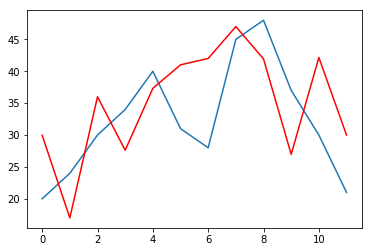

------Data extracted-----
------Data normalized-----
[06:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-48, Month-1, Year-2015: actual-106; preds-135.49935913085938
RMSE error: 29.499359130859375
------Data extracted-----
------Data normalized-----
[06:10:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-48, Month-2, Year-2015: actual-85; preds-103.97801208496094
RMSE error: 18.978012084960938
------Data extracted-----
------Data normalized-----
[06:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-48, Month-3, Year-2015: actual-100; preds-166.8271484375
RMSE error: 66.8271484375
------Data extracted-----
------Data normalized-----
[06:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

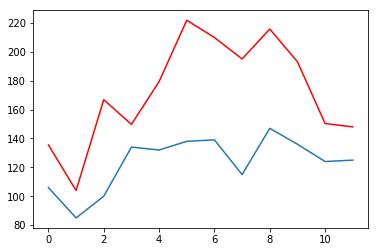

------Data extracted-----
------Data normalized-----
[06:12:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-49, Month-1, Year-2015: actual-595; preds-586.5078125
RMSE error: 8.4921875
------Data extracted-----
------Data normalized-----
[06:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-49, Month-2, Year-2015: actual-433; preds-569.5693359375
RMSE error: 136.5693359375
------Data extracted-----
------Data normalized-----
[06:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-49, Month-3, Year-2015: actual-569; preds-762.47509765625
RMSE error: 193.47509765625
------Data extracted-----
------Data normalized-----
[06:12:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Comm

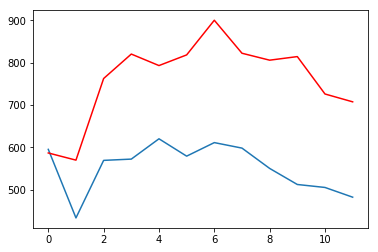

------Data extracted-----
------Data normalized-----
[06:14:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-50, Month-1, Year-2015: actual-104; preds-88.02143859863281
RMSE error: 15.978561401367188
------Data extracted-----
------Data normalized-----
[06:14:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-50, Month-2, Year-2015: actual-79; preds-65.00700378417969
RMSE error: 13.992996215820312
------Data extracted-----
------Data normalized-----
[06:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-50, Month-3, Year-2015: actual-84; preds-103.43309020996094
RMSE error: 19.433090209960938
------Data extracted-----
------Data normalized-----
[06:14:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

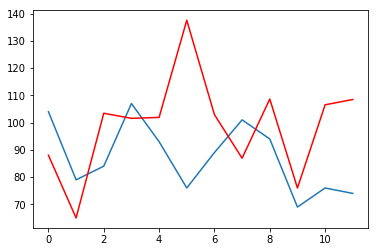

------Data extracted-----
------Data normalized-----
[06:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-51, Month-1, Year-2015: actual-175; preds-155.81707763671875
RMSE error: 19.18292236328125
------Data extracted-----
------Data normalized-----
[06:16:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-51, Month-2, Year-2015: actual-119; preds-133.03904724121094
RMSE error: 14.039047241210938
------Data extracted-----
------Data normalized-----
[06:16:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-51, Month-3, Year-2015: actual-159; preds-215.8953094482422
RMSE error: 56.89530944824219
------Data extracted-----
------Data normalized-----
[06:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

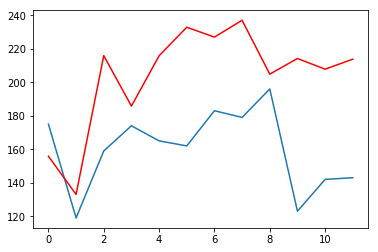

------Data extracted-----
------Data normalized-----
[06:17:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-52, Month-1, Year-2015: actual-132; preds-105.6447525024414
RMSE error: 26.355247497558594
------Data extracted-----
------Data normalized-----
[06:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-52, Month-2, Year-2015: actual-87; preds-108.8512954711914
RMSE error: 21.851295471191406
------Data extracted-----
------Data normalized-----
[06:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-52, Month-3, Year-2015: actual-95; preds-114.4568099975586
RMSE error: 19.456809997558594
------Data extracted-----
------Data normalized-----
[06:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

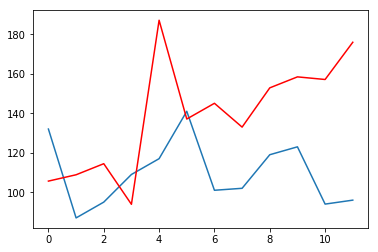

------Data extracted-----
------Data normalized-----
[06:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-53, Month-1, Year-2015: actual-333; preds-369.8550109863281
RMSE error: 36.855010986328125
------Data extracted-----
------Data normalized-----
[06:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-53, Month-2, Year-2015: actual-237; preds-357.64422607421875
RMSE error: 120.64422607421875
------Data extracted-----
------Data normalized-----
[06:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-53, Month-3, Year-2015: actual-327; preds-370.5128173828125
RMSE error: 43.5128173828125
------Data extracted-----
------Data normalized-----
[06:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

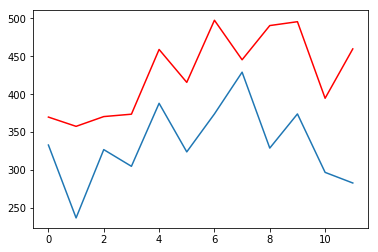

------Data extracted-----
------Data normalized-----
[06:21:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-54, Month-1, Year-2015: actual-100; preds-92.99891662597656
RMSE error: 7.0010833740234375
------Data extracted-----
------Data normalized-----
[06:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-54, Month-2, Year-2015: actual-76; preds-73.0174331665039
RMSE error: 2.9825668334960938
------Data extracted-----
------Data normalized-----
[06:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-54, Month-3, Year-2015: actual-104; preds-122.88240051269531
RMSE error: 18.882400512695312
------Data extracted-----
------Data normalized-----
[06:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

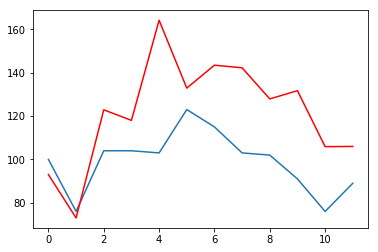

------Data extracted-----
------Data normalized-----
[06:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-55, Month-1, Year-2015: actual-42; preds-34.99921417236328
RMSE error: 7.000785827636719
------Data extracted-----
------Data normalized-----
[06:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-55, Month-2, Year-2015: actual-29; preds-46.975982666015625
RMSE error: 17.975982666015625
------Data extracted-----
------Data normalized-----
[06:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-55, Month-3, Year-2015: actual-39; preds-43.99231719970703
RMSE error: 4.992317199707031
------Data extracted-----
------Data normalized-----
[06:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

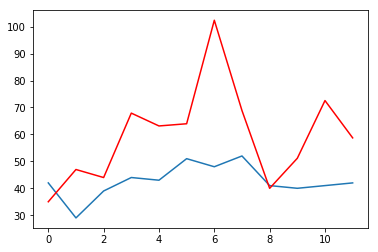

------Data extracted-----
------Data normalized-----
[06:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-56, Month-1, Year-2015: actual-183; preds-136.83563232421875
RMSE error: 46.16436767578125
------Data extracted-----
------Data normalized-----
[06:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-56, Month-2, Year-2015: actual-130; preds-128.03121948242188
RMSE error: 1.968780517578125
------Data extracted-----
------Data normalized-----
[06:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-56, Month-3, Year-2015: actual-174; preds-222.21095275878906
RMSE error: 48.21095275878906
------Data extracted-----
------Data normalized-----
[06:26:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

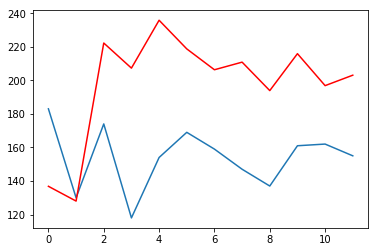

------Data extracted-----
------Data normalized-----
[06:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-57, Month-1, Year-2015: actual-85; preds-80.93958282470703
RMSE error: 4.060417175292969
------Data extracted-----
------Data normalized-----
[06:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-57, Month-2, Year-2015: actual-82; preds-83.90077209472656
RMSE error: 1.9007720947265625
------Data extracted-----
------Data normalized-----
[06:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-57, Month-3, Year-2015: actual-103; preds-98.67371368408203
RMSE error: 4.326286315917969
------Data extracted-----
------Data normalized-----
[06:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

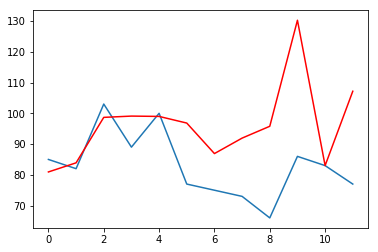

------Data extracted-----
------Data normalized-----
[06:29:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-58, Month-1, Year-2015: actual-236; preds-296.20513916015625
RMSE error: 60.20513916015625
------Data extracted-----
------Data normalized-----
[06:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-58, Month-2, Year-2015: actual-184; preds-225.55552673339844
RMSE error: 41.55552673339844
------Data extracted-----
------Data normalized-----
[06:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-58, Month-3, Year-2015: actual-245; preds-327.6427917480469
RMSE error: 82.64279174804688
------Data extracted-----
------Data normalized-----
[06:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

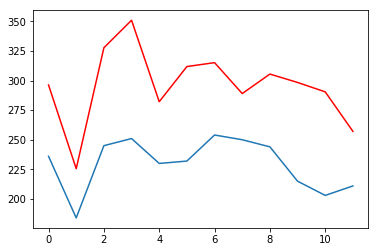

------Data extracted-----
------Data normalized-----
[06:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-59, Month-1, Year-2015: actual-88; preds-67.01567077636719
RMSE error: 20.984329223632812
------Data extracted-----
------Data normalized-----
[06:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-59, Month-2, Year-2015: actual-79; preds-84.99214172363281
RMSE error: 5.9921417236328125
------Data extracted-----
------Data normalized-----
[06:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-59, Month-3, Year-2015: actual-75; preds-93.9138412475586
RMSE error: 18.913841247558594
------Data extracted-----
------Data normalized-----
[06:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

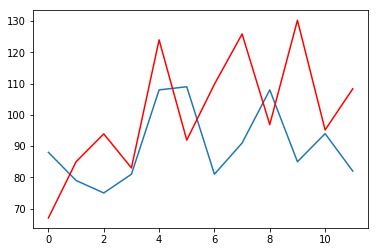

------Data extracted-----
------Data normalized-----
[06:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-60, Month-1, Year-2015: actual-133; preds-154.9732208251953
RMSE error: 21.973220825195312
------Data extracted-----
------Data normalized-----
[06:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-60, Month-2, Year-2015: actual-86; preds-154.83901977539062
RMSE error: 68.83901977539062
------Data extracted-----
------Data normalized-----
[06:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-60, Month-3, Year-2015: actual-151; preds-178.63404846191406
RMSE error: 27.634048461914062
------Data extracted-----
------Data normalized-----
[06:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

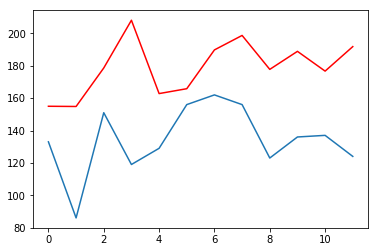

------Data extracted-----
------Data normalized-----
[06:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-61, Month-1, Year-2015: actual-377; preds-442.7878112792969
RMSE error: 65.78781127929688
------Data extracted-----
------Data normalized-----
[06:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-61, Month-2, Year-2015: actual-306; preds-414.65191650390625
RMSE error: 108.65191650390625
------Data extracted-----
------Data normalized-----
[06:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-61, Month-3, Year-2015: actual-394; preds-545.8342895507812
RMSE error: 151.83428955078125
------Data extracted-----
------Data normalized-----
[06:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

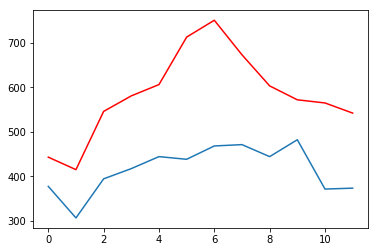

------Data extracted-----
------Data normalized-----
[06:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-62, Month-1, Year-2015: actual-70; preds-76.4327392578125
RMSE error: 6.4327392578125
------Data extracted-----
------Data normalized-----
[06:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-62, Month-2, Year-2015: actual-71; preds-73.56485748291016
RMSE error: 2.5648574829101562
------Data extracted-----
------Data normalized-----
[06:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-62, Month-3, Year-2015: actual-81; preds-100.90502166748047
RMSE error: 19.90502166748047
------Data extracted-----
------Data normalized-----
[06:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

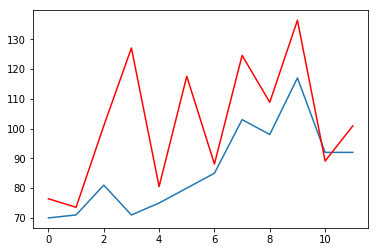

------Data extracted-----
------Data normalized-----
[06:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-63, Month-1, Year-2015: actual-193; preds-301.8514099121094
RMSE error: 108.85140991210938
------Data extracted-----
------Data normalized-----
[06:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-63, Month-2, Year-2015: actual-139; preds-161.8973388671875
RMSE error: 22.8973388671875
------Data extracted-----
------Data normalized-----
[06:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-63, Month-3, Year-2015: actual-187; preds-296.4974670410156
RMSE error: 109.49746704101562
------Data extracted-----
------Data normalized-----
[06:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

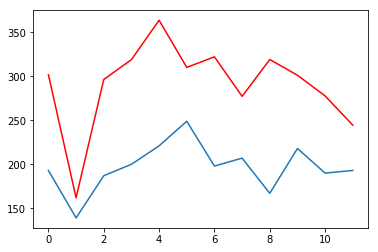

------Data extracted-----
------Data normalized-----
[06:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-64, Month-1, Year-2015: actual-78; preds-55.427772521972656
RMSE error: 22.572227478027344
------Data extracted-----
------Data normalized-----
[06:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-64, Month-2, Year-2015: actual-52; preds-58.271728515625
RMSE error: 6.271728515625
------Data extracted-----
------Data normalized-----
[06:41:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-64, Month-3, Year-2015: actual-71; preds-97.0369644165039
RMSE error: 26.036964416503906
------Data extracted-----
------Data normalized-----
[06:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:

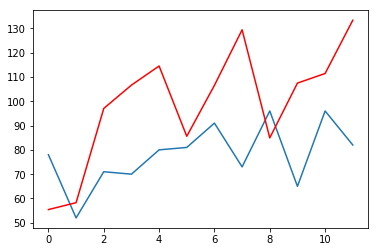

------Data extracted-----
------Data normalized-----
[06:43:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-65, Month-1, Year-2015: actual-145; preds-225.76019287109375
RMSE error: 80.76019287109375
------Data extracted-----
------Data normalized-----
[06:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-65, Month-2, Year-2015: actual-139; preds-167.56790161132812
RMSE error: 28.567901611328125
------Data extracted-----
------Data normalized-----
[06:43:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-65, Month-3, Year-2015: actual-186; preds-216.86395263671875
RMSE error: 30.86395263671875
------Data extracted-----
------Data normalized-----
[06:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

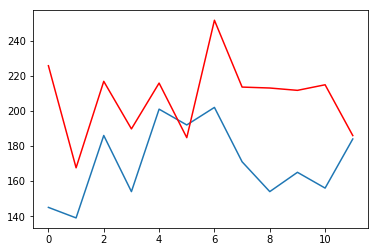

------Data extracted-----
------Data normalized-----
[06:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-66, Month-1, Year-2015: actual-494; preds-631.5684204101562
RMSE error: 137.56842041015625
------Data extracted-----
------Data normalized-----
[06:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-66, Month-2, Year-2015: actual-394; preds-483.4852294921875
RMSE error: 89.4852294921875
------Data extracted-----
------Data normalized-----
[06:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-66, Month-3, Year-2015: actual-496; preds-785.077392578125
RMSE error: 289.077392578125
------Data extracted-----
------Data normalized-----
[06:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

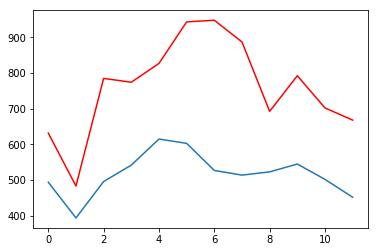

------Data extracted-----
------Data normalized-----
[06:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-67, Month-1, Year-2015: actual-527; preds-620.2875366210938
RMSE error: 93.28753662109375
------Data extracted-----
------Data normalized-----
[06:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-67, Month-2, Year-2015: actual-417; preds-460.30963134765625
RMSE error: 43.30963134765625
------Data extracted-----
------Data normalized-----
[06:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-67, Month-3, Year-2015: actual-622; preds-766.0281372070312
RMSE error: 144.02813720703125
------Data extracted-----
------Data normalized-----
[06:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

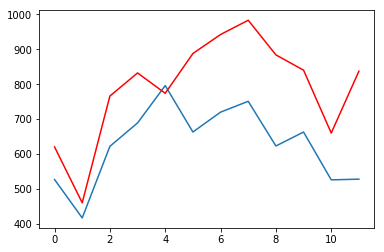

------Data extracted-----
------Data normalized-----
[06:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-68, Month-1, Year-2015: actual-545; preds-491.896728515625
RMSE error: 53.103271484375
------Data extracted-----
------Data normalized-----
[06:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-68, Month-2, Year-2015: actual-398; preds-493.4827575683594
RMSE error: 95.48275756835938
------Data extracted-----
------Data normalized-----
[06:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-68, Month-3, Year-2015: actual-565; preds-742.3946533203125
RMSE error: 177.3946533203125
------Data extracted-----
------Data normalized-----
[06:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of r

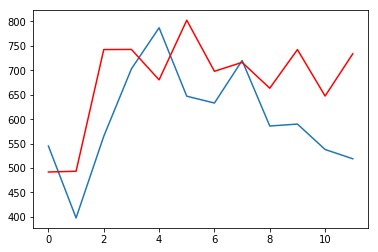

------Data extracted-----
------Data normalized-----
[06:51:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-69, Month-1, Year-2015: actual-478; preds-486.39556884765625
RMSE error: 8.39556884765625
------Data extracted-----
------Data normalized-----
[06:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-69, Month-2, Year-2015: actual-359; preds-506.375244140625
RMSE error: 147.375244140625
------Data extracted-----
------Data normalized-----
[06:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-69, Month-3, Year-2015: actual-592; preds-628.8909301757812
RMSE error: 36.89093017578125
------Data extracted-----
------Data normalized-----
[06:51:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

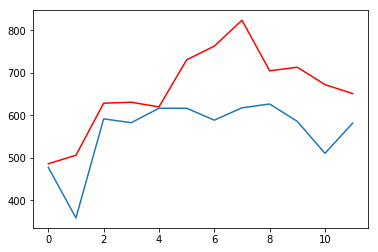

------Data extracted-----
------Data normalized-----
[06:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-70, Month-1, Year-2015: actual-207; preds-188.00502014160156
RMSE error: 18.994979858398438
------Data extracted-----
------Data normalized-----
[06:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-70, Month-2, Year-2015: actual-143; preds-199.78257751464844
RMSE error: 56.78257751464844
------Data extracted-----
------Data normalized-----
[06:53:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-70, Month-3, Year-2015: actual-170; preds-178.788818359375
RMSE error: 8.788818359375
------Data extracted-----
------Data normalized-----
[06:53:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

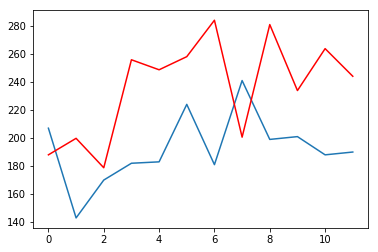

------Data extracted-----
------Data normalized-----
[06:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-71, Month-1, Year-2015: actual-621; preds-529.996337890625
RMSE error: 91.003662109375
------Data extracted-----
------Data normalized-----
[06:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-71, Month-2, Year-2015: actual-511; preds-548.3373413085938
RMSE error: 37.33734130859375
------Data extracted-----
------Data normalized-----
[06:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-71, Month-3, Year-2015: actual-633; preds-774.2947387695312
RMSE error: 141.29473876953125
------Data extracted-----
------Data normalized-----
[06:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

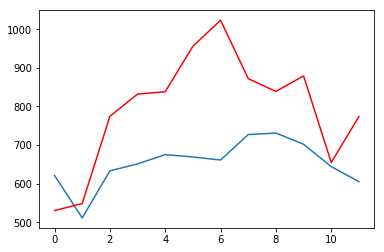

------Data extracted-----
------Data normalized-----
[06:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-72, Month-1, Year-2015: actual-61; preds-61.992645263671875
RMSE error: 0.992645263671875
------Data extracted-----
------Data normalized-----
[06:57:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-72, Month-2, Year-2015: actual-61; preds-61.918006896972656
RMSE error: 0.9180068969726562
------Data extracted-----
------Data normalized-----
[06:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-72, Month-3, Year-2015: actual-88; preds-93.87348937988281
RMSE error: 5.8734893798828125
------Data extracted-----
------Data normalized-----
[06:57:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

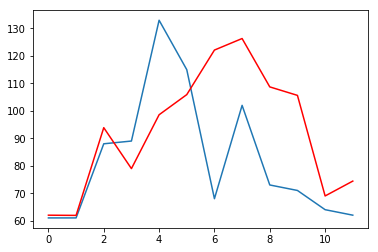

------Data extracted-----
------Data normalized-----
[06:59:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-73, Month-1, Year-2015: actual-217; preds-222.9985809326172
RMSE error: 5.9985809326171875
------Data extracted-----
------Data normalized-----
[06:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-73, Month-2, Year-2015: actual-210; preds-194.80474853515625
RMSE error: 15.19525146484375
------Data extracted-----
------Data normalized-----
[06:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-73, Month-3, Year-2015: actual-270; preds-297.94647216796875
RMSE error: 27.94647216796875
------Data extracted-----
------Data normalized-----
[06:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

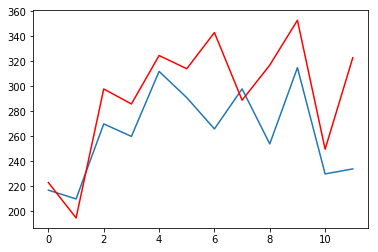

------Data extracted-----
------Data normalized-----
[07:01:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-74, Month-1, Year-2015: actual-33; preds-60.719608306884766
RMSE error: 27.719608306884766
------Data extracted-----
------Data normalized-----
[07:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-74, Month-2, Year-2015: actual-41; preds-47.771324157714844
RMSE error: 6.771324157714844
------Data extracted-----
------Data normalized-----
[07:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-74, Month-3, Year-2015: actual-59; preds-49.93624496459961
RMSE error: 9.06375503540039
------Data extracted-----
------Data normalized-----
[07:01:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

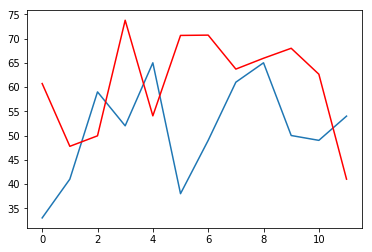

------Data extracted-----
------Data normalized-----
[07:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-75, Month-1, Year-2015: actual-165; preds-223.75595092773438
RMSE error: 58.755950927734375
------Data extracted-----
------Data normalized-----
[07:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-75, Month-2, Year-2015: actual-116; preds-139.9928741455078
RMSE error: 23.992874145507812
------Data extracted-----
------Data normalized-----
[07:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-75, Month-3, Year-2015: actual-162; preds-159.63848876953125
RMSE error: 2.36151123046875
------Data extracted-----
------Data normalized-----
[07:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

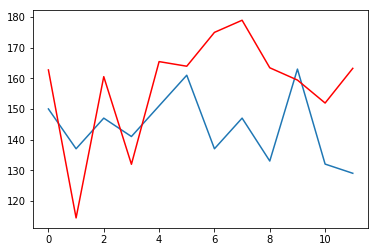

------Data extracted-----
------Data normalized-----
[07:07:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-77, Month-1, Year-2015: actual-153; preds-242.7783660888672
RMSE error: 89.77836608886719
------Data extracted-----
------Data normalized-----
[07:07:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-77, Month-2, Year-2015: actual-139; preds-215.86505126953125
RMSE error: 76.86505126953125
------Data extracted-----
------Data normalized-----
[07:07:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Community-77, Month-3, Year-2015: actual-191; preds-240.74505615234375
RMSE error: 49.74505615234375
------Data extracted-----
------Data normalized-----
[07:07:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

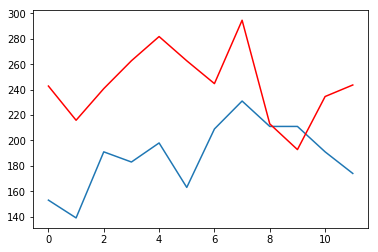

In [69]:
tot_tr_3 = []
tot_pred_3 = []

for c in tqdm_notebook(range(1,78), leave=False):
    
    c_tr = []
    c_pd = []
    for month in tqdm_notebook(range(1,13)):
        
        X_train = X_tot[month-1][c-1]
        y_train = y_tot[month-1][c-1]
        
        X_test = get_features(c, 2015, month, top, sim_method)
        y_test = get_ys(c, 2015, month)
        
        X_test = np.array(X_test)
        y_test = np.array(y_test, ndmin=1)
        
        print('------Data extracted-----')
        
        sc = MinMaxScaler(feature_range=(0, 1))
        X_train_norm = sc.fit_transform(X_train)
        X_test_norm = sc.transform(X_test.reshape(1, -1))
        
        print('------Data normalized-----')
        
        clf = xgb.XGBRegressor(max_depth=best_d, n_estimators=best_n)
        clf.fit(X_train_poly, y_train)
        
        preds = clf.predict(X_test_poly.reshape(1, -1))
        
        print('Community-{}, Month-{}, Year-{}: actual-{}; preds-{}'.format(c, month, 2015, y_test[0], preds[0]))
        print('RMSE error: {}'.format(mean_squared_error(y_test, preds) ** .5))
        
        c_tr.append(y_test[0])
        c_pd.append(preds[0])
        
    plt.plot(c_tr)
    plt.plot(c_pd, color='red')
    plt.show()
    
    tot_tr_3 = tot_tr_3 + c_tr
    tot_pred_3 = tot_pred_3 + c_pd

In [70]:
rmse_4 = mean_squared_error(tot_tr_3, tot_pred_3) ** .5
rmse_4

100.84391201530566

# Conclusions

In [73]:
x = PrettyTable()

x.field_names = ['Model', 'Test RMSE score']

x.add_row(['Linear Reg', '432.7312'])
x.add_row(['SVR', '80.7030'])
x.add_row(['Random Forest', '86.1999'])
x.add_row(['XG Boost', '100.8439'])

print(x)

+---------------+-----------------+
|     Model     | Test RMSE score |
+---------------+-----------------+
|   Linear Reg  |     432.7312    |
|      SVR      |     80.7030     |
| Random Forest |     86.1999     |
|    XG Boost   |     100.8439    |
+---------------+-----------------+


- We have shown that infusing socio-economic features have improved our predictions and resulted in lower RMSE scores.
- In the last IPYNB (Time-Series-Analysis-1), while making <b>Month</b> wise predictions we got best RMSE score of <b>around 103 using LSTM based time-series approaches</b>.
- Here we tried four different models and were able to reduce the RMSE score to <b>around 80 using SVR and forest based models.</b>
- A very important point to note is that <b>we achieved the results in this IPYNB using Jaccard Similarity, which is the simplest of all and fastest to compute.</b>
- Given the computational resources, we can try other novel similarity measures explored in this notebook like ASCOS, Simrank and PL and try to reduce the RMSE score even further down.

In [50]:
from joblib import dump, load

#saving best model (SVR)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for c in tqdm_notebook(range(1,78), leave=False):
    
    c_tr = []
    c_pd = []
    for month in tqdm_notebook(range(1,13), leave=False):
        
        X_train = X_tot[month-1][c-1]
        y_train = y_tot[month-1][c-1]
        
        X_test = get_features(c, 2015, month, top, sim_method)
        y_test = get_ys(c, 2015, month)

        X_test = np.array(X_test)
        y_test = np.array(y_test, ndmin=1)
        
        sc = MinMaxScaler(feature_range=(0, 1))
        X_train_norm = sc.fit_transform(X_train)
        X_test_norm = sc.transform(X_test.reshape(1, -1))
        
        X_test_norm = X_test_norm.reshape(1, -1)
        
        fileForTest = str(c) + '-' + months[month-1] + '-test'
        fileForTest_Y = str(c) + '-' + months[month-1] + '-test-Y'
        savetofile(X_test_norm, fileForTest)
        savetofile(y_test, fileForTest_Y)
        
        clf = SVR()
        clf.fit(X_train_norm, y_train)
        
        fileName = str(c) + '-' + months[month-1] + '.joblib'
        dump(clf, fileName)